# Flight Delay Analysis

In [49]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

sns.set_style("whitegrid")

In [15]:
df = pd.read_csv("/Users/peteroloya/Desktop/Projects/Flight Delays/flight_data_2024.csv")
df.tail(50)

,year,month,day_of_month,day_of_week,fl_date,origin,origin_city_name,origin_state_nm,dep_time,taxi_out,wheels_off,wheels_on,taxi_in,cancelled,air_time,distance,weather_delay,late_aircraft_delay
1048525,2024,2,29,4,2/29/2024,CLT,"Charlotte, NC",North Carolina,1451.0,15.0,1506.0,1618.0,4.0,0,72.0,509,0,0
1048526,2024,2,29,4,2/29/2024,EWR,"Newark, NJ",New Jersey,654.0,17.0,711.0,838.0,7.0,0,87.0,529,0,0
1048527,2024,2,29,4,2/29/2024,MIA,"Miami, FL",Florida,1905.0,21.0,1926.0,2100.0,15.0,0,94.0,650,0,0
1048528,2024,2,29,4,2/29/2024,BOS,"Boston, MA",Massachusetts,1748.0,29.0,1817.0,2108.0,28.0,0,351.0,2611,0,0
1048529,2024,2,29,4,2/29/2024,LAX,"Los Angeles, CA",California,724.0,16.0,740.0,1541.0,5.0,0,301.0,2611,0,0
1048530,2024,2,29,4,2/29/2024,CLT,"Charlotte, NC",North Carolina,2147.0,19.0,2206.0,22.0,10.0,0,316.0,2296,0,0
1048531,2024,2,29,4,2/29/2024,DFW,"Dallas/Fort Worth, TX",Texas,1658.0,24.0,1722.0,2005.0,8.0,0,103.0,812,0,0
1048532,2024,2,29,4,2/29/2024,CLT,"Charlotte, NC",North Carolina,1056.0,16.0,1112.0,1137.0,4.0,0,25.0,83,0,0
1048533,2024,2,29,4,2/29/2024,GSO,"Greensboro/High Point, NC",North Carolina,1239.0,10.0,1249.0,1316.0,11.0,0,27.0,83,0,0
1048534,2024,2,29,4,2/29/2024,CMH,"Columbus, OH",Ohio,701.0,14.0,715.0,842.0,15.0,0,147.0,926,0,0


# Creation of the Target Variable "Delayed"

In [26]:
df["delayed"] = (
    (df["weather_delay"] > 0) |
    (df["late_aircraft_delay"] > 0)
).astype(int)

df.tail(50)

,year,month,day_of_month,day_of_week,fl_date,origin,origin_city_name,origin_state_nm,dep_time,taxi_out,wheels_off,wheels_on,taxi_in,cancelled,air_time,distance,weather_delay,late_aircraft_delay,delayed,dep_hour
1048525,2024,2,29,4,2/29/2024,CLT,"Charlotte, NC",North Carolina,1451.0,15.0,1506.0,1618.0,4.0,0,72.0,509,0,0,0,14.0
1048526,2024,2,29,4,2/29/2024,EWR,"Newark, NJ",New Jersey,654.0,17.0,711.0,838.0,7.0,0,87.0,529,0,0,0,6.0
1048527,2024,2,29,4,2/29/2024,MIA,"Miami, FL",Florida,1905.0,21.0,1926.0,2100.0,15.0,0,94.0,650,0,0,0,19.0
1048528,2024,2,29,4,2/29/2024,BOS,"Boston, MA",Massachusetts,1748.0,29.0,1817.0,2108.0,28.0,0,351.0,2611,0,0,0,17.0
1048529,2024,2,29,4,2/29/2024,LAX,"Los Angeles, CA",California,724.0,16.0,740.0,1541.0,5.0,0,301.0,2611,0,0,0,7.0
1048530,2024,2,29,4,2/29/2024,CLT,"Charlotte, NC",North Carolina,2147.0,19.0,2206.0,22.0,10.0,0,316.0,2296,0,0,0,21.0
1048531,2024,2,29,4,2/29/2024,DFW,"Dallas/Fort Worth, TX",Texas,1658.0,24.0,1722.0,2005.0,8.0,0,103.0,812,0,0,0,16.0
1048532,2024,2,29,4,2/29/2024,CLT,"Charlotte, NC",North Carolina,1056.0,16.0,1112.0,1137.0,4.0,0,25.0,83,0,0,0,10.0
1048533,2024,2,29,4,2/29/2024,GSO,"Greensboro/High Point, NC",North Carolina,1239.0,10.0,1249.0,1316.0,11.0,0,27.0,83,0,0,0,12.0
1048534,2024,2,29,4,2/29/2024,CMH,"Columbus, OH",Ohio,701.0,14.0,715.0,842.0,15.0,0,147.0,926,0,0,0,7.0


In [29]:
df["dep_hour"] = df["dep_time"] // 100
df["is_weekend"] = df["day_of_week"].isin([6, 7]).astype(int)


# Statistical Exploratory Data Analysis (SEDA)

In [17]:
df.shape
df.info()
df.isna().mean().sort_values(ascending=False)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 19 columns):
 #   Column               Non-Null Count    Dtype  
---  ------               --------------    -----  
 0   year                 1048575 non-null  int64  
 1   month                1048575 non-null  int64  
 2   day_of_month         1048575 non-null  int64  
 3   day_of_week          1048575 non-null  int64  
 4   fl_date              1048575 non-null  object 
 5   origin               1048575 non-null  object 
 6   origin_city_name     1048575 non-null  object 
 7   origin_state_nm      1048575 non-null  object 
 8   dep_time             1026022 non-null  float64
 9   taxi_out             1025450 non-null  float64
 10  wheels_off           1025450 non-null  float64
 11  wheels_on            1024898 non-null  float64
 12  taxi_in              1024898 non-null  float64
 13  cancelled            1048575 non-null  int64  
 14  air_time             1022824 non-null  float64
 15

air_time               0.024558
taxi_in                0.022580
wheels_on              0.022580
taxi_out               0.022054
wheels_off             0.022054
dep_time               0.021508
late_aircraft_delay    0.000000
weather_delay          0.000000
distance               0.000000
cancelled              0.000000
year                   0.000000
month                  0.000000
origin_state_nm        0.000000
origin_city_name       0.000000
origin                 0.000000
fl_date                0.000000
day_of_week            0.000000
day_of_month           0.000000
delayed                0.000000
dtype: float64

## Delay Proportions

In [18]:
df["delayed"].value_counts()
df["delayed"].value_counts(normalize=True)


delayed
0    0.895883
1    0.104117
Name: proportion, dtype: float64

## Time-based Patterns


### Delay Rate by Depature Hour

<Axes: title={'center': 'Delay Rate by Departure Hour'}, xlabel='dep_hour'>

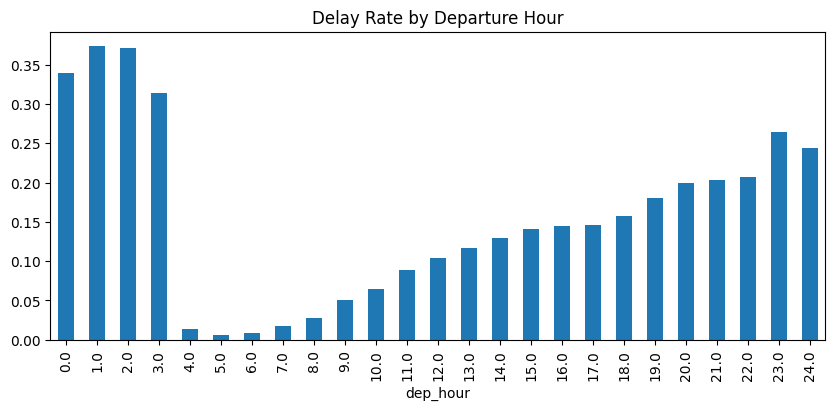

In [19]:
df["dep_hour"] = df["dep_time"] // 100

hourly_delay = df.groupby("dep_hour")["delayed"].mean()

hourly_delay.plot(kind="bar", figsize=(10,4), title="Delay Rate by Departure Hour")


### Delay Rate by Day of Week

<Axes: title={'center': 'Delay Rate by Day of Week'}, xlabel='day_of_week'>

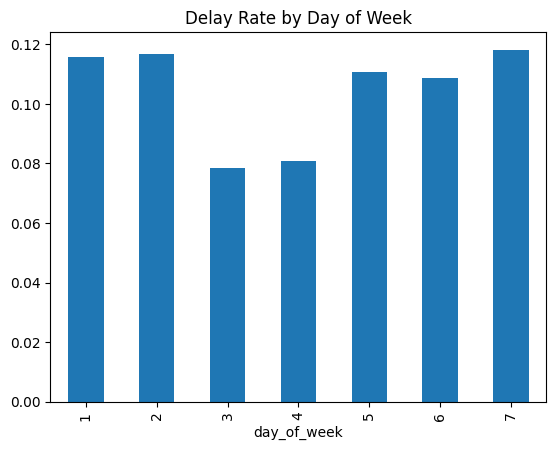

In [20]:
dow_delay = df.groupby("day_of_week")["delayed"].mean()

dow_delay.plot(kind="bar", title="Delay Rate by Day of Week")


## Airport Level Delay Analysis

In [21]:
airport_delay = (
    df.groupby("origin")["delayed"]
      .mean()
      .sort_values(ascending=False)
)

airport_delay.head(15)


origin
HTS    0.305556
PPG    0.277778
BET    0.258621
HGR    0.242424
BRW    0.241379
SPI    0.238095
SMX    0.235294
PBG    0.229885
SCK    0.223684
BLV    0.205357
HDN    0.186747
EYW    0.184936
STX    0.179211
ASE    0.167028
TOL    0.166667
Name: delayed, dtype: float64

## Distance vs Delay

In [22]:
df.groupby(pd.qcut(df["distance"], 5))["delayed"].mean()


/var/folders/lk/z67r4h3x1jx9lmvfsjmyb24h0000gn/T/ipykernel_9926/2723249410.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(pd.qcut(df["distance"], 5))["delayed"].mean()


distance
(30.999, 344.0]     0.102776
(344.0, 583.0]      0.103353
(583.0, 859.0]      0.105897
(859.0, 1184.0]     0.115750
(1184.0, 5095.0]    0.092753
Name: delayed, dtype: float64

## Taxi Out Time

In [23]:
df.groupby(pd.qcut(df["taxi_out"], 5))["delayed"].mean()


/var/folders/lk/z67r4h3x1jx9lmvfsjmyb24h0000gn/T/ipykernel_9926/4170853246.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(pd.qcut(df["taxi_out"], 5))["delayed"].mean()


taxi_out
(0.999, 11.0]    0.092893
(11.0, 14.0]     0.093960
(14.0, 17.0]     0.098655
(17.0, 23.0]     0.100917
(23.0, 213.0]    0.151092
Name: delayed, dtype: float64

## Cancellations

In [24]:
df["cancelled"].value_counts(normalize=True)
df.groupby("cancelled")["delayed"].mean()


cancelled
0    0.106483
1    0.000000
Name: delayed, dtype: float64

## Correlation Analysis

In [27]:
num_cols = [
    "distance", "taxi_out", "taxi_in", "air_time", "origin"
]

df[num_cols + ["delayed"]].corr()["delayed"].sort_values(ascending=False)


ValueError: could not convert string to float: 'JFK'

# Visual Exploratory Data Analysis (VEDA)

## Heatmap: Departure Hour × Origin Airport

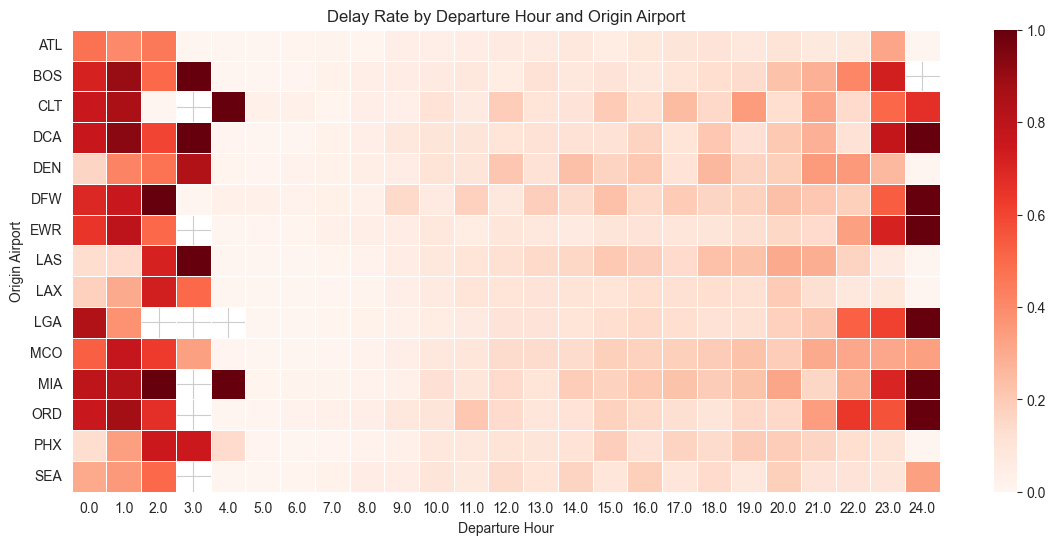

In [30]:
top_airports = (
    df["origin"]
    .value_counts()
    .head(15)
    .index
)

heatmap_df = (
    df[df["origin"].isin(top_airports)]
    .groupby(["origin", "dep_hour"])["delayed"]
    .mean()
    .reset_index()
    .pivot(index="origin", columns="dep_hour", values="delayed")
)

plt.figure(figsize=(14,6))
sns.heatmap(
    heatmap_df,
    cmap="Reds",
    linewidths=0.5
)
plt.title("Delay Rate by Departure Hour and Origin Airport")
plt.xlabel("Departure Hour")
plt.ylabel("Origin Airport")
plt.show()


## Rolling Delay Trends Over Time

In [45]:
df["fl_date"] = pd.to_datetime(df["fl_date"])


In [46]:
daily_delay = (
    df.groupby("fl_date")["delayed"]
      .mean()
      .sort_index()
)


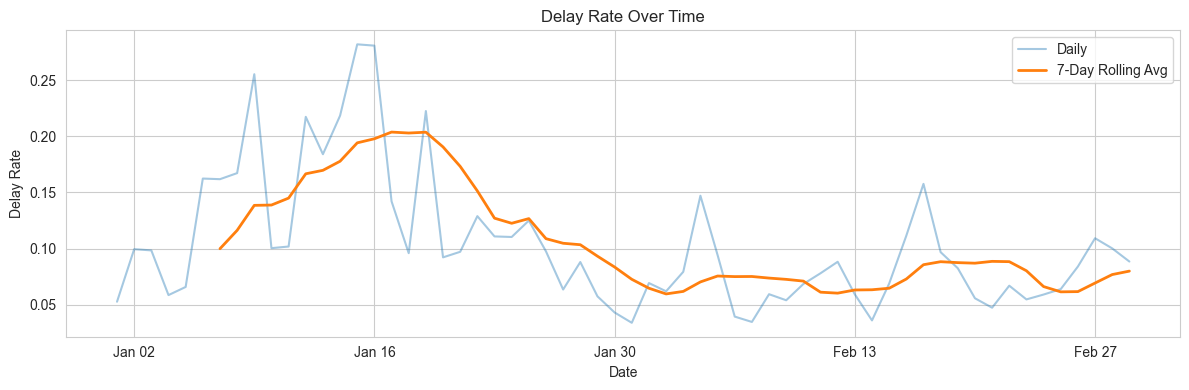

In [47]:
import matplotlib.dates as mdates

plt.figure(figsize=(12,4))

plt.plot(daily_delay, alpha=0.4, label="Daily")
plt.plot(rolling_7d, linewidth=2, label="7-Day Rolling Avg")

plt.title("Delay Rate Over Time")
plt.xlabel("Date")
plt.ylabel("Delay Rate")

# FIX X-AXIS
ax = plt.gca()
ax.xaxis.set_major_locator(mdates.WeekdayLocator(interval=2))
ax.xaxis.set_major_formatter(mdates.DateFormatter("%b %d"))

plt.legend()
plt.tight_layout()
plt.show()


In [43]:
df[df["fl_date"].dt.year == 2024]["fl_date"].dt.month.value_counts().sort_index()


fl_date
1    547271
2    501304
Name: count, dtype: int64

## Weekday vs Weekend Comparison

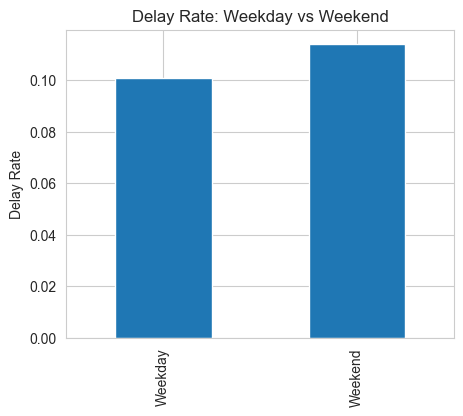

In [32]:
weekday_weekend = (
    df.groupby("is_weekend")["delayed"]
    .mean()
    .rename({0: "Weekday", 1: "Weekend"})
)

weekday_weekend.plot(
    kind="bar",
    figsize=(5,4),
    title="Delay Rate: Weekday vs Weekend",
    ylabel="Delay Rate",
    xlabel=""
)
plt.show()


## Taxi-Out Distribution by Delay Status

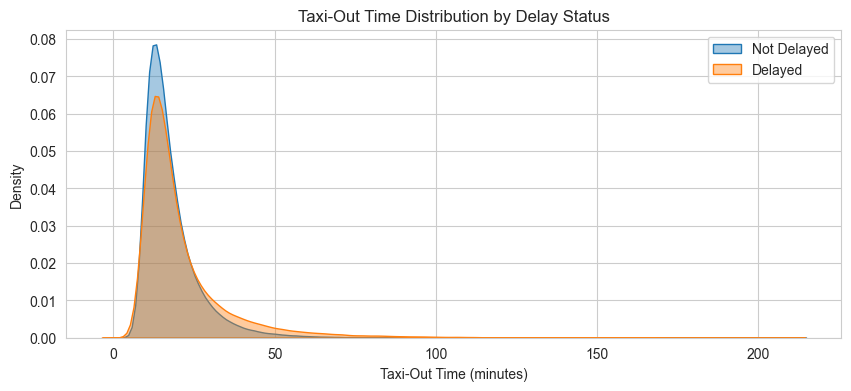

In [33]:
plt.figure(figsize=(10,4))
sns.kdeplot(
    df[df["delayed"] == 0]["taxi_out"],
    label="Not Delayed",
    fill=True,
    alpha=0.4
)
sns.kdeplot(
    df[df["delayed"] == 1]["taxi_out"],
    label="Delayed",
    fill=True,
    alpha=0.4
)
plt.title("Taxi-Out Time Distribution by Delay Status")
plt.xlabel("Taxi-Out Time (minutes)")
plt.legend()
plt.show()


# Feature Engineering

In [48]:
df = df.sort_values("fl_date")

df["origin_delay_rate_7d"] = (
    df.groupby("origin")["delayed"]
      .rolling(7, min_periods=1)
      .mean()
      .reset_index(level=0, drop=True)
)


# Data Cleaning

In [ ]:
X.isna().sum().sort_values(ascending=False).head(20)


In [54]:
pd.crosstab(
    df["taxi_out"].isna(),
    df["cancelled"],
    normalize="index"
)


cancelled,0,1
taxi_out,,
False,0.999823,0.000177
True,0.000000,1.000000


In [55]:

pd.crosstab(
    df["dep_hour"].isna(),
    df["cancelled"],
    normalize="index"
)


cancelled,0,1
dep_hour,,
False,0.999266,0.000734
True,0.000000,1.000000


In [56]:
missing_taxi = df[df["taxi_out"].isna()]
missing_dep_hour = df[df["dep_hour"].isna()]

print("Taxi-out missing → cancelled rate:",
      missing_taxi["cancelled"].mean())

print("Dep-hour missing → cancelled rate:",
      missing_dep_hour["cancelled"].mean())


Taxi-out missing → cancelled rate: 1.0
Dep-hour missing → cancelled rate: 1.0


In [57]:
# drop cancelled flights
df = df[df["cancelled"] == 0].copy()

# drop cancelled column
df = df.drop(columns=["cancelled"])

# recompute features (important!)
df["dep_hour"] = df["dep_time"] // 100


# Model Building - Logistic Regression

In [59]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, classification_report

# feature lists
cat_features = ["origin"]
num_features = [
    "dep_hour", "day_of_week", "distance",
    "taxi_out", "is_weekend", "origin_delay_rate_7d"
]

X = df[cat_features + num_features]
y = df["delayed"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    stratify=y,
    random_state=42
)

# preprocessing
numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median"))
])

categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(handle_unknown="ignore"))
])

preprocess = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, num_features),
        ("cat", categorical_transformer, cat_features),
    ]
)

# model
logit_model = Pipeline(steps=[
    ("prep", preprocess),
    ("clf", LogisticRegression(
        max_iter=1000,
        class_weight="balanced"  # important for imbalance
    ))
])

# train
logit_model.fit(X_train, y_train)


/Users/peteroloya/Desktop/Projects/.venv/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,steps,"[('prep', ...), ('clf', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


## Baseline Model Evaluation (Logistic Regression)

In [60]:
y_pred_prob = logit_model.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_pred_prob)
roc_auc


0.9046965158198108

In [61]:
y_pred = (y_pred_prob >= 0.5).astype(int)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.97      0.82      0.89    183219
           1       0.35      0.80      0.49     21835

    accuracy                           0.82    205054
   macro avg       0.66      0.81      0.69    205054
weighted avg       0.91      0.82      0.85    205054



In [62]:
feature_names = (
    logit_model.named_steps["prep"]
    .get_feature_names_out()
)

coefs = logit_model.named_steps["clf"].coef_[0]

coef_df = (
    pd.DataFrame({
        "feature": feature_names,
        "coef": coefs
    })
    .sort_values("coef", ascending=False)
)

coef_df.head(15)


,feature,coef
5,num__origin_delay_rate_7d,11.896124
21,cat__origin_ANC,0.186206
126,cat__origin_GEG,0.164860
0,num__dep_hour,0.150061
232,cat__origin_ONT,0.147288
114,cat__origin_FAT,0.138347
192,cat__origin_LIT,0.129055
301,cat__origin_SMF,0.127479
108,cat__origin_EUG,0.127117
205,cat__origin_MEM,0.123902


## Threshold Testing - Logistic Regression

In [63]:
import numpy as np
import pandas as pd
from sklearn.metrics import precision_score, recall_score, f1_score

thresholds = np.arange(0.1, 0.9, 0.05)

results = []

for t in thresholds:
    y_pred_t = (y_pred_prob >= t).astype(int)
    
    results.append({
        "threshold": t,
        "precision_delay": precision_score(y_test, y_pred_t),
        "recall_delay": recall_score(y_test, y_pred_t),
        "f1_delay": f1_score(y_test, y_pred_t)
    })

threshold_df = pd.DataFrame(results)
threshold_df


,threshold,precision_delay,recall_delay,f1_delay
0,0.10,0.154442,0.994733,0.267372
1,0.15,0.183172,0.993542,0.309318
2,0.20,0.223836,0.989100,0.365058
3,0.25,0.266682,0.975773,0.418882
4,0.30,0.292061,0.951729,0.446961
5,0.35,0.309204,0.918480,0.462656
6,0.40,0.322634,0.883352,0.472641
7,0.45,0.334376,0.842134,0.478686
8,0.50,0.348700,0.799863,0.485672
9,0.55,0.369843,0.753744,0.496209


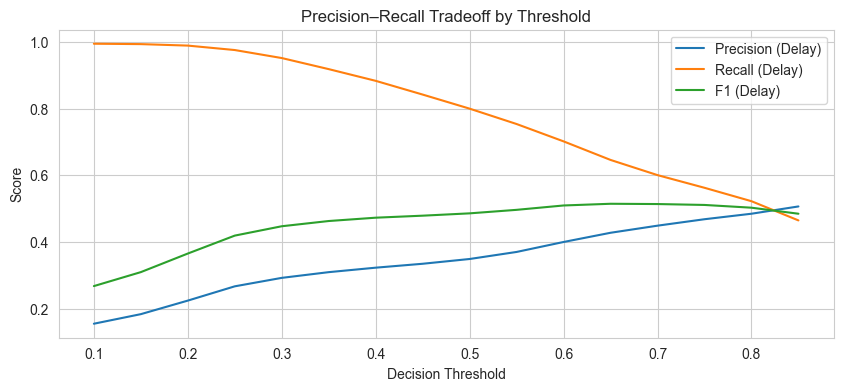

In [64]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,4))

plt.plot(threshold_df["threshold"], threshold_df["precision_delay"], label="Precision (Delay)")
plt.plot(threshold_df["threshold"], threshold_df["recall_delay"], label="Recall (Delay)")
plt.plot(threshold_df["threshold"], threshold_df["f1_delay"], label="F1 (Delay)")

plt.xlabel("Decision Threshold")
plt.ylabel("Score")
plt.title("Precision–Recall Tradeoff by Threshold")
plt.legend()
plt.grid(True)
plt.show()


### Concluding Logistic Regression Model

In [65]:
# Choose an operational threshold
chosen_threshold = 0.65

# Predicted probabilities from your trained logistic model
y_pred_prob = logit_model.predict_proba(X_test)[:, 1]

# Convert probabilities to class predictions using the chosen threshold
y_pred_ops = (y_pred_prob >= chosen_threshold).astype(int)

# Evaluate at this threshold
from sklearn.metrics import classification_report, confusion_matrix, precision_score, recall_score, f1_score

print(f"Chosen threshold: {chosen_threshold}")
print("Precision (delay):", precision_score(y_test, y_pred_ops))
print("Recall (delay):", recall_score(y_test, y_pred_ops))
print("F1 (delay):", f1_score(y_test, y_pred_ops))
print("\nClassification Report:\n", classification_report(y_test, y_pred_ops))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_ops))


Chosen threshold: 0.65
Precision (delay): 0.4273853892070418
Recall (delay): 0.6459812228074193
F1 (delay): 0.5144243043145265

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.90      0.93    183219
           1       0.43      0.65      0.51     21835

    accuracy                           0.87    205054
   macro avg       0.69      0.77      0.72    205054
weighted avg       0.90      0.87      0.88    205054

Confusion Matrix:
 [[164321  18898]
 [  7730  14105]]


# Model #2: XGBoost Classifier

### Data Prep

In [66]:
from sklearn.preprocessing import LabelEncoder

df_xgb = df.copy()

le = LabelEncoder()
df_xgb["origin_le"] = le.fit_transform(df_xgb["origin"])


### Selection of Features

In [67]:
features_xgb = [
    "dep_hour",
    "day_of_week",
    "distance",
    "taxi_out",
    "is_weekend",
    "origin_delay_rate_7d",
    "origin_le"
]

X = df_xgb[features_xgb]
y = df_xgb["delayed"]


### Train/Test Split

In [68]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    stratify=y,
    random_state=42
)


### Handling Class Imbalance

In [69]:
scale_pos_weight = (y_train == 0).sum() / (y_train == 1).sum()
scale_pos_weight


np.float64(8.391165458729777)

### Training the Model

In [70]:
from xgboost import XGBClassifier

xgb_model = XGBClassifier(
    n_estimators=300,
    max_depth=5,
    learning_rate=0.05,
    subsample=0.8,
    colsample_bytree=0.8,
    scale_pos_weight=scale_pos_weight,
    eval_metric="auc",
    random_state=42,
    n_jobs=-1
)

xgb_model.fit(X_train, y_train)


,objective,'binary:logistic'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,0.8
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,'auc'


### Evaluating Ranking Power

In [71]:
from sklearn.metrics import roc_auc_score

y_pred_prob_xgb = xgb_model.predict_proba(X_test)[:, 1]
roc_auc_xgb = roc_auc_score(y_test, y_pred_prob_xgb)

roc_auc_xgb


0.923711936823549

In [74]:
import numpy as np
import pandas as pd
from sklearn.metrics import precision_score, recall_score, f1_score

thresholds = np.arange(0.1, 0.9, 0.05)

results_xgb = []

for t in thresholds:
    y_pred_t = (y_pred_prob_xgb >= t).astype(int)

    results_xgb.append({
        "threshold": t,
        "precision_delay": precision_score(y_test, y_pred_t),
        "recall_delay": recall_score(y_test, y_pred_t),
        "f1_delay": f1_score(y_test, y_pred_t)
    })

threshold_xgb_df = pd.DataFrame(results_xgb)
threshold_xgb_df


,threshold,precision_delay,recall_delay,f1_delay
0,0.10,0.260724,0.998443,0.413477
1,0.15,0.270371,0.996703,0.425358
2,0.20,0.278114,0.994229,0.434645
3,0.25,0.284583,0.990978,0.442183
4,0.30,0.289172,0.987726,0.447369
5,0.35,0.295893,0.981727,0.454731
6,0.40,0.303758,0.974948,0.463200
7,0.45,0.311361,0.964827,0.470792
8,0.50,0.320400,0.952645,0.479523
9,0.55,0.332126,0.932036,0.489736


### Comparing Metrics Head-to-Head

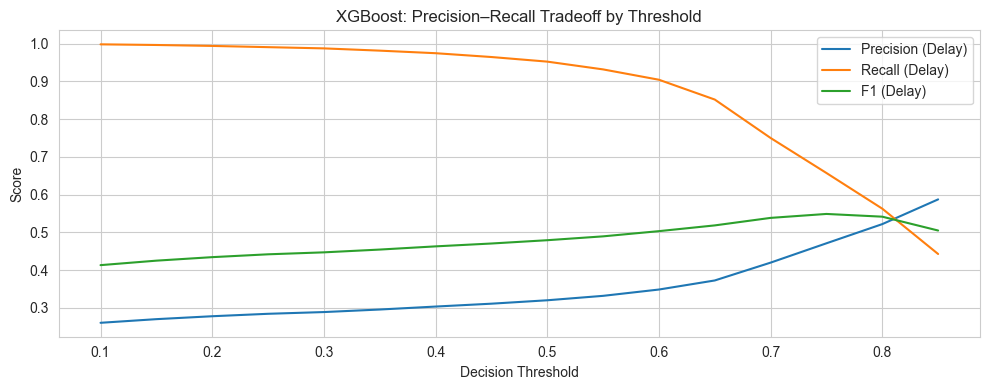

In [75]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,4))

plt.plot(threshold_xgb_df["threshold"], threshold_xgb_df["precision_delay"], label="Precision (Delay)")
plt.plot(threshold_xgb_df["threshold"], threshold_xgb_df["recall_delay"], label="Recall (Delay)")
plt.plot(threshold_xgb_df["threshold"], threshold_xgb_df["f1_delay"], label="F1 (Delay)")

plt.xlabel("Decision Threshold")
plt.ylabel("Score")
plt.title("XGBoost: Precision–Recall Tradeoff by Threshold")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [77]:
threshold_df["model"] = "Logistic"
threshold_xgb_df["model"] = "XGBoost"

combined = pd.concat([threshold_df, threshold_xgb_df])
combined


,threshold,precision_delay,recall_delay,f1_delay,model,recall_gap
0,0.10,0.154442,0.994733,0.267372,Logistic,NaN
1,0.15,0.183172,0.993542,0.309318,Logistic,NaN
2,0.20,0.223836,0.989100,0.365058,Logistic,NaN
3,0.25,0.266682,0.975773,0.418882,Logistic,NaN
4,0.30,0.292061,0.951729,0.446961,Logistic,NaN
5,0.35,0.309204,0.918480,0.462656,Logistic,NaN
6,0.40,0.322634,0.883352,0.472641,Logistic,NaN
7,0.45,0.334376,0.842134,0.478686,Logistic,NaN
8,0.50,0.348700,0.799863,0.485672,Logistic,NaN
9,0.55,0.369843,0.753744,0.496209,Logistic,NaN


# Hyperparameter Optimization

In [81]:
# If needed:
# pip install optuna xgboost

import numpy as np
import optuna
from optuna.samplers import TPESampler
from optuna.pruners import MedianPruner

from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, precision_score, recall_score


/Users/peteroloya/Desktop/Projects/.venv/lib/python3.13/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


### Data Setup

In [82]:
features_xgb = [
    "dep_hour",
    "day_of_week",
    "distance",
    "taxi_out",
    "is_weekend",
    "origin_delay_rate_7d",
    "origin_le",
]

X = df_xgb[features_xgb]
y = df_xgb["delayed"]

X_train, X_valid, y_train, y_valid = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

base_spw = (y_train == 0).sum() / (y_train == 1).sum()
base_spw


np.float64(8.391165458729777)

In [83]:
def suggest_xgb_params(trial: optuna.Trial, base_spw: float) -> dict:
    return {
        "n_estimators": trial.suggest_int("n_estimators", 200, 900),
        "learning_rate": trial.suggest_float("learning_rate", 0.01, 0.2, log=True),

        "max_depth": trial.suggest_int("max_depth", 3, 8),
        "min_child_weight": trial.suggest_int("min_child_weight", 1, 20),
        "gamma": trial.suggest_float("gamma", 0.0, 5.0),

        "subsample": trial.suggest_float("subsample", 0.6, 1.0),
        "colsample_bytree": trial.suggest_float("colsample_bytree", 0.6, 1.0),

        "reg_alpha": trial.suggest_float("reg_alpha", 0.0, 5.0),
        "reg_lambda": trial.suggest_float("reg_lambda", 0.5, 5.0),

        # tune around your computed imbalance ratio
        "scale_pos_weight": trial.suggest_float("scale_pos_weight", 0.5 * base_spw, 1.5 * base_spw),

        # fixed “good practice” settings
        "objective": "binary:logistic",
        "eval_metric": "auc",
        "random_state": 42,
        "n_jobs": -1,
        "tree_method": "hist",  # fast on large tabular data
    }


## PHASE 1: Optuna study to maximize ROC-AUC

In [92]:
def objective_auc(trial: optuna.Trial) -> float:
    params = suggest_xgb_params(trial, base_spw)

    model = XGBClassifier(**params)
    model.fit(X_train, y_train)

    y_prob = model.predict_proba(X_valid)[:, 1]
    auc = roc_auc_score(y_valid, y_prob)

    # report so pruner can prune if you later add intermediate reporting
    trial.report(auc, step=0)

    return auc


In [93]:
study_auc = optuna.create_study(
    direction="maximize",
    sampler=TPESampler(seed=42),
    pruner=MedianPruner(n_startup_trials=10, n_warmup_steps=0),
)

study_auc.optimize(objective_auc, n_trials=200, show_progress_bar=True)

print("Best AUC:", study_auc.best_value)
study_auc.best_params


Best trial: 135. Best value: 0.928771:  72%|███████▎  | 145/200 [24:28<13:40, 14.93s/it]

[I 2025-12-20 18:20:51,947] Trial 144 finished with value: 0.928377699655323 and parameters: {'n_estimators': 882, 'learning_rate': 0.0343290574483588, 'max_depth': 8, 'min_child_weight': 2, 'gamma': 0.6682922854094481, 'subsample': 0.9409289921597209, 'colsample_bytree': 0.8930421275000409, 'reg_alpha': 3.880627122402591, 'reg_lambda': 1.1952432965256867, 'scale_pos_weight': 5.474231550332098}. Best is trial 135 with value: 0.9287709168389723.


Best trial: 135. Best value: 0.928771:  73%|███████▎  | 146/200 [24:44<13:29, 14.98s/it]

[I 2025-12-20 18:21:07,062] Trial 145 finished with value: 0.9287255407463826 and parameters: {'n_estimators': 896, 'learning_rate': 0.038052683726538944, 'max_depth': 8, 'min_child_weight': 1, 'gamma': 0.37723685914197524, 'subsample': 0.9347831523341602, 'colsample_bytree': 0.9071930548078591, 'reg_alpha': 3.7855064749928387, 'reg_lambda': 1.0168009223035523, 'scale_pos_weight': 4.904798202027049}. Best is trial 135 with value: 0.9287709168389723.


Best trial: 135. Best value: 0.928771:  74%|███████▎  | 147/200 [25:04<14:48, 16.76s/it]

[I 2025-12-20 18:21:27,979] Trial 146 finished with value: 0.9286015834329346 and parameters: {'n_estimators': 899, 'learning_rate': 0.03816675727906401, 'max_depth': 8, 'min_child_weight': 1, 'gamma': 0.3457898413717033, 'subsample': 0.965591600065609, 'colsample_bytree': 0.9098086314167158, 'reg_alpha': 4.0250085053284606, 'reg_lambda': 1.044984084817116, 'scale_pos_weight': 4.5198507186357215}. Best is trial 135 with value: 0.9287709168389723.


Best trial: 135. Best value: 0.928771:  74%|███████▍  | 148/200 [25:27<15:59, 18.44s/it]

[I 2025-12-20 18:21:50,341] Trial 147 finished with value: 0.9286459246773535 and parameters: {'n_estimators': 896, 'learning_rate': 0.03766370608000417, 'max_depth': 8, 'min_child_weight': 2, 'gamma': 0.32952188371714886, 'subsample': 0.9623828286618569, 'colsample_bytree': 0.9107565273021682, 'reg_alpha': 4.027715376789259, 'reg_lambda': 1.061785535267154, 'scale_pos_weight': 4.504804090914795}. Best is trial 135 with value: 0.9287709168389723.


Best trial: 135. Best value: 0.928771:  74%|███████▍  | 149/200 [25:44<15:22, 18.08s/it]

[I 2025-12-20 18:22:07,581] Trial 148 finished with value: 0.9281649337465392 and parameters: {'n_estimators': 898, 'learning_rate': 0.030468816502161118, 'max_depth': 8, 'min_child_weight': 1, 'gamma': 0.22296688288902258, 'subsample': 0.9726103237220378, 'colsample_bytree': 0.924476036080758, 'reg_alpha': 3.7545865538780543, 'reg_lambda': 0.9671883206054263, 'scale_pos_weight': 4.301792269931255}. Best is trial 135 with value: 0.9287709168389723.


Best trial: 135. Best value: 0.928771:  75%|███████▌  | 150/200 [25:59<14:20, 17.21s/it]

[I 2025-12-20 18:22:22,772] Trial 149 finished with value: 0.9285457781204809 and parameters: {'n_estimators': 864, 'learning_rate': 0.03808149191729869, 'max_depth': 8, 'min_child_weight': 2, 'gamma': 0.3677246748484713, 'subsample': 0.9551056406084014, 'colsample_bytree': 0.9373947588421263, 'reg_alpha': 3.999803383397918, 'reg_lambda': 1.2313972984158836, 'scale_pos_weight': 4.724047982198153}. Best is trial 135 with value: 0.9287709168389723.


Best trial: 135. Best value: 0.928771:  76%|███████▌  | 151/200 [26:13<13:15, 16.24s/it]

[I 2025-12-20 18:22:36,733] Trial 150 finished with value: 0.9282062768058406 and parameters: {'n_estimators': 845, 'learning_rate': 0.03147496467281214, 'max_depth': 8, 'min_child_weight': 1, 'gamma': 0.8018913850701122, 'subsample': 0.932951090111419, 'colsample_bytree': 0.9067977759539629, 'reg_alpha': 4.035105835304512, 'reg_lambda': 0.9840073296162875, 'scale_pos_weight': 4.513558834179671}. Best is trial 135 with value: 0.9287709168389723.


Best trial: 135. Best value: 0.928771:  76%|███████▌  | 152/200 [26:28<12:45, 15.95s/it]

[I 2025-12-20 18:22:51,997] Trial 151 finished with value: 0.9284019208516798 and parameters: {'n_estimators': 865, 'learning_rate': 0.03837177183689998, 'max_depth': 8, 'min_child_weight': 2, 'gamma': 0.0022166469015263424, 'subsample': 0.9559128776676958, 'colsample_bytree': 0.9350710538288401, 'reg_alpha': 3.8133355899967722, 'reg_lambda': 1.2505321115320387, 'scale_pos_weight': 4.916536961519942}. Best is trial 135 with value: 0.9287709168389723.


Best trial: 135. Best value: 0.928771:  76%|███████▋  | 153/200 [26:43<12:14, 15.63s/it]

[I 2025-12-20 18:23:06,901] Trial 152 finished with value: 0.928399266741081 and parameters: {'n_estimators': 887, 'learning_rate': 0.03562936365381042, 'max_depth': 8, 'min_child_weight': 2, 'gamma': 0.3543132415905954, 'subsample': 0.9674126268959969, 'colsample_bytree': 0.9132953874965878, 'reg_alpha': 4.015525799557376, 'reg_lambda': 1.150619849634037, 'scale_pos_weight': 4.6503545252565175}. Best is trial 135 with value: 0.9287709168389723.


Best trial: 135. Best value: 0.928771:  77%|███████▋  | 154/200 [26:59<11:54, 15.53s/it]

[I 2025-12-20 18:23:22,183] Trial 153 finished with value: 0.9287638067571369 and parameters: {'n_estimators': 866, 'learning_rate': 0.04086079715836372, 'max_depth': 8, 'min_child_weight': 1, 'gamma': 0.5011896808503138, 'subsample': 0.914701762604074, 'colsample_bytree': 0.9434023788795601, 'reg_alpha': 3.8652325328772767, 'reg_lambda': 1.4188654742583504, 'scale_pos_weight': 4.495415510874983}. Best is trial 135 with value: 0.9287709168389723.


Best trial: 154. Best value: 0.928852:  78%|███████▊  | 155/200 [27:19<12:45, 17.01s/it]

[I 2025-12-20 18:23:42,662] Trial 154 finished with value: 0.9288516304969671 and parameters: {'n_estimators': 898, 'learning_rate': 0.04041615104401022, 'max_depth': 8, 'min_child_weight': 1, 'gamma': 0.5019007275255769, 'subsample': 0.9343959274937623, 'colsample_bytree': 0.9206769323595695, 'reg_alpha': 3.8790039647245234, 'reg_lambda': 1.42451702780388, 'scale_pos_weight': 4.463356777343814}. Best is trial 154 with value: 0.9288516304969671.


Best trial: 154. Best value: 0.928852:  78%|███████▊  | 156/200 [27:34<11:56, 16.28s/it]

[I 2025-12-20 18:23:57,239] Trial 155 finished with value: 0.9268776929806772 and parameters: {'n_estimators': 895, 'learning_rate': 0.04017161530198453, 'max_depth': 6, 'min_child_weight': 1, 'gamma': 0.48461064776117513, 'subsample': 0.918649511124488, 'colsample_bytree': 0.9214762720098352, 'reg_alpha': 3.8521971047057297, 'reg_lambda': 1.4768235393129774, 'scale_pos_weight': 4.525361243840112}. Best is trial 154 with value: 0.9288516304969671.


Best trial: 154. Best value: 0.928852:  78%|███████▊  | 157/200 [27:48<11:20, 15.83s/it]

[I 2025-12-20 18:24:12,009] Trial 156 finished with value: 0.9278337562106653 and parameters: {'n_estimators': 876, 'learning_rate': 0.031983779316199876, 'max_depth': 8, 'min_child_weight': 1, 'gamma': 0.6643329480455749, 'subsample': 0.9812795817136664, 'colsample_bytree': 0.9420107666644342, 'reg_alpha': 3.717763397147219, 'reg_lambda': 1.3967844563310197, 'scale_pos_weight': 5.177803110827441}. Best is trial 154 with value: 0.9288516304969671.


Best trial: 154. Best value: 0.928852:  79%|███████▉  | 158/200 [28:04<10:59, 15.69s/it]

[I 2025-12-20 18:24:27,384] Trial 157 finished with value: 0.928728289968027 and parameters: {'n_estimators': 854, 'learning_rate': 0.04166107216338825, 'max_depth': 8, 'min_child_weight': 1, 'gamma': 0.23445868222358832, 'subsample': 0.9110937016392632, 'colsample_bytree': 0.91124807349869, 'reg_alpha': 3.9145371978152927, 'reg_lambda': 1.020700603413247, 'scale_pos_weight': 4.3643706155219855}. Best is trial 154 with value: 0.9288516304969671.


Best trial: 154. Best value: 0.928852:  80%|███████▉  | 159/200 [28:13<09:17, 13.60s/it]

[I 2025-12-20 18:24:36,098] Trial 158 finished with value: 0.9232472346279126 and parameters: {'n_estimators': 900, 'learning_rate': 0.04021494858644721, 'max_depth': 3, 'min_child_weight': 2, 'gamma': 0.217303635182821, 'subsample': 0.9110270410216903, 'colsample_bytree': 0.9090639148982196, 'reg_alpha': 3.883656920856764, 'reg_lambda': 1.1047718697859308, 'scale_pos_weight': 4.301591746633677}. Best is trial 154 with value: 0.9288516304969671.


Best trial: 154. Best value: 0.928852:  80%|████████  | 160/200 [28:28<09:30, 14.25s/it]

[I 2025-12-20 18:24:51,880] Trial 159 finished with value: 0.9279115330495392 and parameters: {'n_estimators': 847, 'learning_rate': 0.027699319384384125, 'max_depth': 8, 'min_child_weight': 2, 'gamma': 0.4011661667834492, 'subsample': 0.9344337702696119, 'colsample_bytree': 0.9260757540156043, 'reg_alpha': 3.9720572404921883, 'reg_lambda': 1.0033123943978985, 'scale_pos_weight': 4.442394662890503}. Best is trial 154 with value: 0.9288516304969671.


Best trial: 160. Best value: 0.928908:  80%|████████  | 161/200 [28:43<09:24, 14.48s/it]

[I 2025-12-20 18:25:06,876] Trial 160 finished with value: 0.9289084031674937 and parameters: {'n_estimators': 861, 'learning_rate': 0.04247665092758294, 'max_depth': 8, 'min_child_weight': 1, 'gamma': 0.5879675366505438, 'subsample': 0.9243617712891438, 'colsample_bytree': 0.9492558437280707, 'reg_alpha': 3.8201582670306364, 'reg_lambda': 0.9326467453854702, 'scale_pos_weight': 4.857985283737443}. Best is trial 160 with value: 0.9289084031674937.


Best trial: 160. Best value: 0.928908:  81%|████████  | 162/200 [28:59<09:19, 14.72s/it]

[I 2025-12-20 18:25:22,178] Trial 161 finished with value: 0.9288467717098301 and parameters: {'n_estimators': 862, 'learning_rate': 0.04213732187302106, 'max_depth': 8, 'min_child_weight': 1, 'gamma': 0.5888695163219168, 'subsample': 0.9244464171480755, 'colsample_bytree': 0.9479258475411608, 'reg_alpha': 3.7707490676432895, 'reg_lambda': 0.9256430969147441, 'scale_pos_weight': 4.751430996116}. Best is trial 160 with value: 0.9289084031674937.


Best trial: 160. Best value: 0.928908:  82%|████████▏ | 163/200 [29:12<08:52, 14.40s/it]

[I 2025-12-20 18:25:35,813] Trial 162 finished with value: 0.9287653126611963 and parameters: {'n_estimators': 859, 'learning_rate': 0.04196564935964835, 'max_depth': 8, 'min_child_weight': 1, 'gamma': 0.5699304114052655, 'subsample': 0.9227924867292572, 'colsample_bytree': 0.9466327078736632, 'reg_alpha': 3.68742579395611, 'reg_lambda': 0.9065899021378445, 'scale_pos_weight': 4.8304756932068385}. Best is trial 160 with value: 0.9289084031674937.


Best trial: 160. Best value: 0.928908:  82%|████████▏ | 164/200 [29:27<08:37, 14.37s/it]

[I 2025-12-20 18:25:50,136] Trial 163 finished with value: 0.9284065472979051 and parameters: {'n_estimators': 857, 'learning_rate': 0.035064764914568156, 'max_depth': 8, 'min_child_weight': 1, 'gamma': 0.5942126013342507, 'subsample': 0.9240131849412109, 'colsample_bytree': 0.9513886312013261, 'reg_alpha': 3.79387266852934, 'reg_lambda': 0.9064909553217065, 'scale_pos_weight': 4.839670982353713}. Best is trial 160 with value: 0.9289084031674937.


Best trial: 160. Best value: 0.928908:  82%|████████▎ | 165/200 [29:40<08:17, 14.21s/it]

[I 2025-12-20 18:26:03,964] Trial 164 finished with value: 0.9286510577992412 and parameters: {'n_estimators': 870, 'learning_rate': 0.041885622850291605, 'max_depth': 8, 'min_child_weight': 1, 'gamma': 0.7142277620561338, 'subsample': 0.915361630724464, 'colsample_bytree': 0.9485091183749412, 'reg_alpha': 3.682606325134806, 'reg_lambda': 1.1637731247738528, 'scale_pos_weight': 5.077309443420105}. Best is trial 160 with value: 0.9289084031674937.


Best trial: 160. Best value: 0.928908:  83%|████████▎ | 166/200 [29:55<08:02, 14.19s/it]

[I 2025-12-20 18:26:18,112] Trial 165 finished with value: 0.9286425306753088 and parameters: {'n_estimators': 884, 'learning_rate': 0.041608837824778824, 'max_depth': 8, 'min_child_weight': 1, 'gamma': 0.6951429722014794, 'subsample': 0.9025351661777928, 'colsample_bytree': 0.9512707215882703, 'reg_alpha': 3.5172591409349363, 'reg_lambda': 1.335621240541634, 'scale_pos_weight': 4.780918656229484}. Best is trial 160 with value: 0.9289084031674937.


Best trial: 160. Best value: 0.928908:  84%|████████▎ | 167/200 [30:09<07:48, 14.21s/it]

[I 2025-12-20 18:26:32,353] Trial 166 finished with value: 0.9288576287419271 and parameters: {'n_estimators': 883, 'learning_rate': 0.04196869257461741, 'max_depth': 8, 'min_child_weight': 1, 'gamma': 0.7021218140760515, 'subsample': 0.9059659255983522, 'colsample_bytree': 0.9482362496048572, 'reg_alpha': 3.5342552976292563, 'reg_lambda': 1.3438828419540207, 'scale_pos_weight': 4.752819704040402}. Best is trial 160 with value: 0.9289084031674937.


Best trial: 160. Best value: 0.928908:  84%|████████▍ | 168/200 [30:23<07:38, 14.34s/it]

[I 2025-12-20 18:26:46,995] Trial 167 finished with value: 0.9287556815742333 and parameters: {'n_estimators': 875, 'learning_rate': 0.04113990559028021, 'max_depth': 8, 'min_child_weight': 1, 'gamma': 0.6967259951762375, 'subsample': 0.9104408047942993, 'colsample_bytree': 0.9450884735571471, 'reg_alpha': 3.5252594337886283, 'reg_lambda': 1.4411274229984712, 'scale_pos_weight': 4.77252071479419}. Best is trial 160 with value: 0.9289084031674937.


Best trial: 160. Best value: 0.928908:  84%|████████▍ | 169/200 [30:37<07:17, 14.11s/it]

[I 2025-12-20 18:27:00,590] Trial 168 finished with value: 0.9283333815325118 and parameters: {'n_estimators': 874, 'learning_rate': 0.03284002846240058, 'max_depth': 8, 'min_child_weight': 1, 'gamma': 0.48628025853452544, 'subsample': 0.9132063873994131, 'colsample_bytree': 0.9431438398496551, 'reg_alpha': 3.6550866006009217, 'reg_lambda': 1.4349057370926779, 'scale_pos_weight': 4.942408450068437}. Best is trial 160 with value: 0.9289084031674937.


Best trial: 160. Best value: 0.928908:  85%|████████▌ | 170/200 [30:50<06:56, 13.87s/it]

[I 2025-12-20 18:27:13,898] Trial 169 finished with value: 0.9286819408931895 and parameters: {'n_estimators': 853, 'learning_rate': 0.041256933708561955, 'max_depth': 8, 'min_child_weight': 2, 'gamma': 0.1326303714296363, 'subsample': 0.9243970932406514, 'colsample_bytree': 0.9450168956217956, 'reg_alpha': 3.7444924701440967, 'reg_lambda': 1.1811618398120125, 'scale_pos_weight': 4.248947562710612}. Best is trial 160 with value: 0.9289084031674937.


Best trial: 160. Best value: 0.928908:  86%|████████▌ | 171/200 [31:04<06:39, 13.77s/it]

[I 2025-12-20 18:27:27,419] Trial 170 finished with value: 0.9287590185846396 and parameters: {'n_estimators': 857, 'learning_rate': 0.042290311374271604, 'max_depth': 8, 'min_child_weight': 1, 'gamma': 0.5790093744932909, 'subsample': 0.9258088103386449, 'colsample_bytree': 0.9459412517111854, 'reg_alpha': 3.668999456936492, 'reg_lambda': 1.2987728919574746, 'scale_pos_weight': 4.249568714193067}. Best is trial 160 with value: 0.9289084031674937.


Best trial: 160. Best value: 0.928908:  86%|████████▌ | 172/200 [31:18<06:25, 13.75s/it]

[I 2025-12-20 18:27:41,128] Trial 171 finished with value: 0.9286708515201807 and parameters: {'n_estimators': 851, 'learning_rate': 0.041546012567297445, 'max_depth': 8, 'min_child_weight': 1, 'gamma': 0.11404068005617805, 'subsample': 0.9256509411272387, 'colsample_bytree': 0.9470013268695581, 'reg_alpha': 3.6840473209217968, 'reg_lambda': 1.2654436261516555, 'scale_pos_weight': 4.3430155203021075}. Best is trial 160 with value: 0.9289084031674937.


Best trial: 160. Best value: 0.928908:  86%|████████▋ | 173/200 [31:32<06:19, 14.07s/it]

[I 2025-12-20 18:27:55,934] Trial 172 finished with value: 0.928723166219764 and parameters: {'n_estimators': 855, 'learning_rate': 0.04174927061078495, 'max_depth': 8, 'min_child_weight': 1, 'gamma': 0.145122368784339, 'subsample': 0.9258743607190986, 'colsample_bytree': 0.9667635053226038, 'reg_alpha': 3.803173711018855, 'reg_lambda': 1.326053312508748, 'scale_pos_weight': 4.204997125513391}. Best is trial 160 with value: 0.9289084031674937.


Best trial: 160. Best value: 0.928908:  87%|████████▋ | 174/200 [31:36<04:47, 11.07s/it]

[I 2025-12-20 18:28:00,006] Trial 173 finished with value: 0.9253712313780742 and parameters: {'n_estimators': 250, 'learning_rate': 0.04216075219273496, 'max_depth': 8, 'min_child_weight': 1, 'gamma': 0.0960068968594947, 'subsample': 0.9242363434143959, 'colsample_bytree': 0.9670025361798097, 'reg_alpha': 3.544366249307183, 'reg_lambda': 1.3037145222940427, 'scale_pos_weight': 4.265413387769223}. Best is trial 160 with value: 0.9289084031674937.


Best trial: 160. Best value: 0.928908:  88%|████████▊ | 175/200 [31:51<05:02, 12.08s/it]

[I 2025-12-20 18:28:14,458] Trial 174 finished with value: 0.9288610058714473 and parameters: {'n_estimators': 846, 'learning_rate': 0.04768600378697774, 'max_depth': 8, 'min_child_weight': 1, 'gamma': 0.24889221256241809, 'subsample': 0.9078349990372471, 'colsample_bytree': 0.9589814789203246, 'reg_alpha': 3.762086154531456, 'reg_lambda': 1.2564157522811257, 'scale_pos_weight': 4.3666625264558165}. Best is trial 160 with value: 0.9289084031674937.


Best trial: 160. Best value: 0.928908:  88%|████████▊ | 176/200 [32:05<05:04, 12.69s/it]

[I 2025-12-20 18:28:28,575] Trial 175 finished with value: 0.9288202870955535 and parameters: {'n_estimators': 843, 'learning_rate': 0.047778095060640964, 'max_depth': 8, 'min_child_weight': 1, 'gamma': 0.24016961438589393, 'subsample': 0.9047854932643464, 'colsample_bytree': 0.9355707356116852, 'reg_alpha': 3.355535164244336, 'reg_lambda': 1.184813063021877, 'scale_pos_weight': 4.200986552128341}. Best is trial 160 with value: 0.9289084031674937.


Best trial: 160. Best value: 0.928908:  88%|████████▊ | 177/200 [32:19<05:00, 13.08s/it]

[I 2025-12-20 18:28:42,546] Trial 176 finished with value: 0.9287926285285146 and parameters: {'n_estimators': 841, 'learning_rate': 0.0476396484874987, 'max_depth': 8, 'min_child_weight': 2, 'gamma': 0.25695550626585645, 'subsample': 0.8985683130697969, 'colsample_bytree': 0.9594091338567946, 'reg_alpha': 3.375889327451432, 'reg_lambda': 1.5094341152876822, 'scale_pos_weight': 4.655882122243049}. Best is trial 160 with value: 0.9289084031674937.


Best trial: 160. Best value: 0.928908:  89%|████████▉ | 178/200 [32:34<05:02, 13.76s/it]

[I 2025-12-20 18:28:57,892] Trial 177 finished with value: 0.9288222573064915 and parameters: {'n_estimators': 843, 'learning_rate': 0.048425746897796676, 'max_depth': 8, 'min_child_weight': 1, 'gamma': 0.2649592423506578, 'subsample': 0.8956468026809717, 'colsample_bytree': 0.957994897898933, 'reg_alpha': 3.3407720242414327, 'reg_lambda': 1.477467273435103, 'scale_pos_weight': 4.608156972368319}. Best is trial 160 with value: 0.9289084031674937.


Best trial: 160. Best value: 0.928908:  90%|████████▉ | 179/200 [32:49<04:51, 13.88s/it]

[I 2025-12-20 18:29:12,053] Trial 178 finished with value: 0.9288564077960597 and parameters: {'n_estimators': 843, 'learning_rate': 0.04758028084071605, 'max_depth': 8, 'min_child_weight': 1, 'gamma': 0.2364326023782431, 'subsample': 0.8971568343803651, 'colsample_bytree': 0.9593021176038385, 'reg_alpha': 3.299126957022162, 'reg_lambda': 1.4729432463292902, 'scale_pos_weight': 4.636089754723813}. Best is trial 160 with value: 0.9289084031674937.


Best trial: 160. Best value: 0.928908:  90%|█████████ | 180/200 [33:03<04:39, 13.99s/it]

[I 2025-12-20 18:29:26,293] Trial 179 finished with value: 0.9288460983086291 and parameters: {'n_estimators': 846, 'learning_rate': 0.04809060477581006, 'max_depth': 8, 'min_child_weight': 1, 'gamma': 0.23741627357238593, 'subsample': 0.9013137539556786, 'colsample_bytree': 0.9573861188966571, 'reg_alpha': 3.3350978560288076, 'reg_lambda': 1.4967861250203351, 'scale_pos_weight': 4.639949091381628}. Best is trial 160 with value: 0.9289084031674937.


Best trial: 180. Best value: 0.92895:  90%|█████████ | 181/200 [33:17<04:27, 14.10s/it] 

[I 2025-12-20 18:29:40,644] Trial 180 finished with value: 0.9289502337802632 and parameters: {'n_estimators': 836, 'learning_rate': 0.04907665261188816, 'max_depth': 8, 'min_child_weight': 1, 'gamma': 0.24930485339801928, 'subsample': 0.8925620761260841, 'colsample_bytree': 0.9586483176501658, 'reg_alpha': 3.3249199564202, 'reg_lambda': 1.4776065943013603, 'scale_pos_weight': 4.742243666413653}. Best is trial 180 with value: 0.9289502337802632.


Best trial: 180. Best value: 0.92895:  91%|█████████ | 182/200 [33:34<04:28, 14.92s/it]

[I 2025-12-20 18:29:57,501] Trial 181 finished with value: 0.9289440196919707 and parameters: {'n_estimators': 849, 'learning_rate': 0.0489388576724978, 'max_depth': 8, 'min_child_weight': 1, 'gamma': 0.2662117437940826, 'subsample': 0.8958363350840071, 'colsample_bytree': 0.959355820554274, 'reg_alpha': 3.320313607636437, 'reg_lambda': 1.433240591125582, 'scale_pos_weight': 4.6616557856325285}. Best is trial 180 with value: 0.9289502337802632.


Best trial: 180. Best value: 0.92895:  92%|█████████▏| 183/200 [33:49<04:12, 14.83s/it]

[I 2025-12-20 18:30:12,108] Trial 182 finished with value: 0.9288395845143085 and parameters: {'n_estimators': 844, 'learning_rate': 0.0495588009333947, 'max_depth': 8, 'min_child_weight': 1, 'gamma': 0.4943074360484736, 'subsample': 0.8951015490830525, 'colsample_bytree': 0.9568518546613594, 'reg_alpha': 3.329602264265715, 'reg_lambda': 1.4747799078993682, 'scale_pos_weight': 4.623225442869643}. Best is trial 180 with value: 0.9289502337802632.


Best trial: 180. Best value: 0.92895:  92%|█████████▏| 184/200 [33:59<03:36, 13.53s/it]

[I 2025-12-20 18:30:22,605] Trial 183 finished with value: 0.9269963331992292 and parameters: {'n_estimators': 810, 'learning_rate': 0.04765201301148422, 'max_depth': 6, 'min_child_weight': 2, 'gamma': 0.5288184937671909, 'subsample': 0.8984493291842975, 'colsample_bytree': 0.9583954463549942, 'reg_alpha': 3.32057884308368, 'reg_lambda': 1.4985289567878253, 'scale_pos_weight': 4.7148429628314465}. Best is trial 180 with value: 0.9289502337802632.


Best trial: 180. Best value: 0.92895:  92%|█████████▎| 185/200 [34:14<03:27, 13.84s/it]

[I 2025-12-20 18:30:37,150] Trial 184 finished with value: 0.9288222636805563 and parameters: {'n_estimators': 835, 'learning_rate': 0.04900026193602593, 'max_depth': 8, 'min_child_weight': 1, 'gamma': 0.2599799963217293, 'subsample': 0.8940081760471893, 'colsample_bytree': 0.9750488635563601, 'reg_alpha': 3.3843412919204283, 'reg_lambda': 1.4923745694316193, 'scale_pos_weight': 4.635616802112992}. Best is trial 180 with value: 0.9289502337802632.


Best trial: 180. Best value: 0.92895:  93%|█████████▎| 186/200 [34:29<03:19, 14.27s/it]

[I 2025-12-20 18:30:52,427] Trial 185 finished with value: 0.928836526962901 and parameters: {'n_estimators': 841, 'learning_rate': 0.04855820506402373, 'max_depth': 8, 'min_child_weight': 1, 'gamma': 0.26466079056220415, 'subsample': 0.8942245478359347, 'colsample_bytree': 0.9714579250975058, 'reg_alpha': 3.1845123815480783, 'reg_lambda': 1.653854208592426, 'scale_pos_weight': 4.599305601723309}. Best is trial 180 with value: 0.9289502337802632.


Best trial: 180. Best value: 0.92895:  94%|█████████▎| 187/200 [34:44<03:08, 14.51s/it]

[I 2025-12-20 18:31:07,503] Trial 186 finished with value: 0.9288935329741927 and parameters: {'n_estimators': 841, 'learning_rate': 0.04870365501800759, 'max_depth': 8, 'min_child_weight': 1, 'gamma': 0.2696686315072854, 'subsample': 0.8957717590587804, 'colsample_bytree': 0.9732422611877859, 'reg_alpha': 3.386059142078571, 'reg_lambda': 1.638124130704689, 'scale_pos_weight': 4.573803865144505}. Best is trial 180 with value: 0.9289502337802632.


Best trial: 180. Best value: 0.92895:  94%|█████████▍| 188/200 [34:58<02:52, 14.41s/it]

[I 2025-12-20 18:31:21,683] Trial 187 finished with value: 0.9288601317496952 and parameters: {'n_estimators': 836, 'learning_rate': 0.04768753932607978, 'max_depth': 8, 'min_child_weight': 2, 'gamma': 0.26658718274004345, 'subsample': 0.8970929147214478, 'colsample_bytree': 0.9720753022080031, 'reg_alpha': 3.3455443143187513, 'reg_lambda': 1.706207511687452, 'scale_pos_weight': 4.634865880143574}. Best is trial 180 with value: 0.9289502337802632.


Best trial: 180. Best value: 0.92895:  94%|█████████▍| 189/200 [35:13<02:40, 14.62s/it]

[I 2025-12-20 18:31:36,809] Trial 188 finished with value: 0.928850264322407 and parameters: {'n_estimators': 840, 'learning_rate': 0.04856603926939934, 'max_depth': 8, 'min_child_weight': 2, 'gamma': 0.008637138562316793, 'subsample': 0.892999636626367, 'colsample_bytree': 0.9771445713740903, 'reg_alpha': 3.348489260231429, 'reg_lambda': 1.6627510920273985, 'scale_pos_weight': 4.612638834855061}. Best is trial 180 with value: 0.9289502337802632.


Best trial: 180. Best value: 0.92895:  95%|█████████▌| 190/200 [35:29<02:30, 15.04s/it]

[I 2025-12-20 18:31:52,798] Trial 189 finished with value: 0.9288137128101079 and parameters: {'n_estimators': 836, 'learning_rate': 0.04880383914572498, 'max_depth': 8, 'min_child_weight': 2, 'gamma': 0.0124152527408475, 'subsample': 0.8935688655603106, 'colsample_bytree': 0.9740826439382259, 'reg_alpha': 3.3426341847418306, 'reg_lambda': 1.6776166270361843, 'scale_pos_weight': 4.5650824163373285}. Best is trial 180 with value: 0.9289502337802632.


Best trial: 180. Best value: 0.92895:  96%|█████████▌| 191/200 [35:45<02:17, 15.25s/it]

[I 2025-12-20 18:32:08,547] Trial 190 finished with value: 0.9287887724692612 and parameters: {'n_estimators': 814, 'learning_rate': 0.04898485523926093, 'max_depth': 8, 'min_child_weight': 2, 'gamma': 0.2598514713796136, 'subsample': 0.8934346561140714, 'colsample_bytree': 0.9750742553808387, 'reg_alpha': 3.283619816924564, 'reg_lambda': 1.6381593750842955, 'scale_pos_weight': 4.606893705230343}. Best is trial 180 with value: 0.9289502337802632.


Best trial: 180. Best value: 0.92895:  96%|█████████▌| 192/200 [36:01<02:03, 15.39s/it]

[I 2025-12-20 18:32:24,266] Trial 191 finished with value: 0.9287439892896814 and parameters: {'n_estimators': 811, 'learning_rate': 0.04971605531600063, 'max_depth': 8, 'min_child_weight': 2, 'gamma': 0.27942001692355006, 'subsample': 0.8947152259437888, 'colsample_bytree': 0.9731364575357361, 'reg_alpha': 3.2554500825914006, 'reg_lambda': 1.6720004446549404, 'scale_pos_weight': 4.635417353486138}. Best is trial 180 with value: 0.9289502337802632.


Best trial: 180. Best value: 0.92895:  96%|█████████▋| 193/200 [36:18<01:50, 15.81s/it]

[I 2025-12-20 18:32:41,072] Trial 192 finished with value: 0.9287289559953099 and parameters: {'n_estimators': 838, 'learning_rate': 0.048428349917499065, 'max_depth': 8, 'min_child_weight': 2, 'gamma': 0.024574868163194458, 'subsample': 0.8908946506478657, 'colsample_bytree': 0.97565555856999, 'reg_alpha': 3.379926991710026, 'reg_lambda': 1.5234970194665949, 'scale_pos_weight': 4.611118188112291}. Best is trial 180 with value: 0.9289502337802632.


Best trial: 180. Best value: 0.92895:  97%|█████████▋| 194/200 [36:33<01:34, 15.80s/it]

[I 2025-12-20 18:32:56,838] Trial 193 finished with value: 0.9289146627491115 and parameters: {'n_estimators': 817, 'learning_rate': 0.04868613085164301, 'max_depth': 8, 'min_child_weight': 2, 'gamma': 0.20808323369112053, 'subsample': 0.9026459063249145, 'colsample_bytree': 0.9597815358482321, 'reg_alpha': 3.3161852249581667, 'reg_lambda': 1.6557991160300594, 'scale_pos_weight': 4.55763865659606}. Best is trial 180 with value: 0.9289502337802632.


Best trial: 180. Best value: 0.92895:  98%|█████████▊| 195/200 [36:48<01:17, 15.51s/it]

[I 2025-12-20 18:33:11,679] Trial 194 finished with value: 0.928920819220857 and parameters: {'n_estimators': 828, 'learning_rate': 0.051897947674225016, 'max_depth': 8, 'min_child_weight': 2, 'gamma': 0.17375941894421387, 'subsample': 0.9026011128821247, 'colsample_bytree': 0.9593777520762093, 'reg_alpha': 3.371735173695459, 'reg_lambda': 1.832894644847968, 'scale_pos_weight': 4.419852632706268}. Best is trial 180 with value: 0.9289502337802632.


Best trial: 180. Best value: 0.92895:  98%|█████████▊| 196/200 [37:04<01:02, 15.71s/it]

[I 2025-12-20 18:33:27,841] Trial 195 finished with value: 0.9288905770328774 and parameters: {'n_estimators': 830, 'learning_rate': 0.05067773198509325, 'max_depth': 8, 'min_child_weight': 2, 'gamma': 0.18103613059779505, 'subsample': 0.9066069822262453, 'colsample_bytree': 0.9643509806104092, 'reg_alpha': 3.2136111626445056, 'reg_lambda': 1.8532990506023157, 'scale_pos_weight': 4.432383858978434}. Best is trial 180 with value: 0.9289502337802632.


Best trial: 180. Best value: 0.92895:  98%|█████████▊| 197/200 [37:19<00:46, 15.38s/it]

[I 2025-12-20 18:33:42,449] Trial 196 finished with value: 0.9289379573314176 and parameters: {'n_estimators': 823, 'learning_rate': 0.05175914478811705, 'max_depth': 8, 'min_child_weight': 2, 'gamma': 0.15751249082246965, 'subsample': 0.9046816142656017, 'colsample_bytree': 0.9646026859369988, 'reg_alpha': 3.2283368344884207, 'reg_lambda': 1.875932183264709, 'scale_pos_weight': 4.4040984260433556}. Best is trial 180 with value: 0.9289502337802632.


Best trial: 180. Best value: 0.92895:  99%|█████████▉| 198/200 [37:35<00:30, 15.47s/it]

[I 2025-12-20 18:33:58,127] Trial 197 finished with value: 0.9288197001816633 and parameters: {'n_estimators': 822, 'learning_rate': 0.05058505996297185, 'max_depth': 8, 'min_child_weight': 2, 'gamma': 0.15271433875793047, 'subsample': 0.9045538737426678, 'colsample_bytree': 0.9647069048741816, 'reg_alpha': 3.2112520733187035, 'reg_lambda': 1.8200422033745511, 'scale_pos_weight': 4.472348408429385}. Best is trial 180 with value: 0.9289502337802632.


Best trial: 198. Best value: 0.928976: 100%|█████████▉| 199/200 [37:49<00:15, 15.02s/it]

[I 2025-12-20 18:34:12,098] Trial 198 finished with value: 0.9289757127920781 and parameters: {'n_estimators': 799, 'learning_rate': 0.05250081749595706, 'max_depth': 8, 'min_child_weight': 2, 'gamma': 0.45176710782872614, 'subsample': 0.9029062449502065, 'colsample_bytree': 0.9591878899997001, 'reg_alpha': 3.451248676584222, 'reg_lambda': 1.877594212269441, 'scale_pos_weight': 4.423579470387891}. Best is trial 198 with value: 0.9289757127920781.


Best trial: 198. Best value: 0.928976: 100%|██████████| 200/200 [38:03<00:00, 11.42s/it]

[I 2025-12-20 18:34:26,321] Trial 199 finished with value: 0.9287367476021546 and parameters: {'n_estimators': 801, 'learning_rate': 0.05070213184740999, 'max_depth': 8, 'min_child_weight': 2, 'gamma': 0.4307405781908977, 'subsample': 0.9048227149313026, 'colsample_bytree': 0.9690043475630657, 'reg_alpha': 3.4739480175476185, 'reg_lambda': 1.9397343288194095, 'scale_pos_weight': 5.001234220277338}. Best is trial 198 with value: 0.9289757127920781.
Best AUC: 0.9289757127920781


{'n_estimators': 799,
 'learning_rate': 0.05250081749595706,
 'max_depth': 8,
 'min_child_weight': 2,
 'gamma': 0.45176710782872614,
 'subsample': 0.9029062449502065,
 'colsample_bytree': 0.9591878899997001,
 'reg_alpha': 3.451248676584222,
 'reg_lambda': 1.877594212269441,
 'scale_pos_weight': 4.423579470387891}

In [94]:
best_auc_params = study_auc.best_params.copy()
best_auc_params.update({
    "objective": "binary:logistic",
    "eval_metric": "auc",
    "random_state": 42,
    "n_jobs": -1,
    "tree_method": "hist",
})

best_auc_model = XGBClassifier(**best_auc_params)
best_auc_model.fit(X_train, y_train)

y_prob_auc = best_auc_model.predict_proba(X_valid)[:, 1]
print("Validation AUC (best):", roc_auc_score(y_valid, y_prob_auc))


Validation AUC (best): 0.9289757127920781


## PHASE 2: Optuna study to maximize Precision subject to Recall ≥ 0.65

In [95]:
RECALL_MIN = 0.65

def objective_ops(trial: optuna.Trial) -> float:
    params = suggest_xgb_params(trial, base_spw)

    # also tune threshold (ops decision policy)
    threshold = trial.suggest_float("threshold", 0.50, 0.90)

    model = XGBClassifier(**params)
    model.fit(X_train, y_train)

    y_prob = model.predict_proba(X_valid)[:, 1]
    y_pred = (y_prob >= threshold).astype(int)

    rec = recall_score(y_valid, y_pred)
    if rec < RECALL_MIN:
        return 0.0

    prec = precision_score(y_valid, y_pred)
    return prec


In [96]:
study_ops = optuna.create_study(
    direction="maximize",
    sampler=TPESampler(seed=42),
    pruner=MedianPruner(n_startup_trials=10, n_warmup_steps=0),
)

study_ops.optimize(objective_ops, n_trials=200, show_progress_bar=True)

print("Best constrained precision:", study_ops.best_value)
study_ops.best_params


[I 2025-12-20 18:37:18,277] A new study created in memory with name: no-name-0086652f-04da-49ca-9163-120194cd471a
Best trial: 0. Best value: 0.326744:   0%|          | 1/200 [00:05<18:26,  5.56s/it]

[I 2025-12-20 18:37:23,843] Trial 0 finished with value: 0.32674361687009523 and parameters: {'n_estimators': 462, 'learning_rate': 0.17254716573280354, 'max_depth': 7, 'min_child_weight': 12, 'gamma': 0.7800932022121826, 'subsample': 0.662397808134481, 'colsample_bytree': 0.6232334448672797, 'reg_alpha': 4.330880728874676, 'reg_lambda': 3.20501755284444, 'scale_pos_weight': 10.137136886440818, 'threshold': 0.508233797718321}. Best is trial 0 with value: 0.32674361687009523.


Best trial: 1. Best value: 0.332586:   1%|          | 2/200 [00:12<20:38,  6.25s/it]

[I 2025-12-20 18:37:30,582] Trial 1 finished with value: 0.3325859491778774 and parameters: {'n_estimators': 879, 'learning_rate': 0.12106896936002161, 'max_depth': 4, 'min_child_weight': 4, 'gamma': 0.9170225492671691, 'subsample': 0.721696897183815, 'colsample_bytree': 0.8099025726528951, 'reg_alpha': 2.1597250932105787, 'reg_lambda': 1.8105311308911887, 'scale_pos_weight': 9.329741605383145, 'threshold': 0.5557975442608167}. Best is trial 1 with value: 0.3325859491778774.


Best trial: 2. Best value: 0.357012:   2%|▏         | 3/200 [00:15<16:07,  4.91s/it]

[I 2025-12-20 18:37:33,900] Trial 2 finished with value: 0.3570121444019298 and parameters: {'n_estimators': 404, 'learning_rate': 0.029967309097101588, 'max_depth': 5, 'min_child_weight': 16, 'gamma': 0.9983689107917987, 'subsample': 0.8056937753654446, 'colsample_bytree': 0.836965827544817, 'reg_alpha': 0.23225206359998862, 'reg_lambda': 3.2339518335564725, 'scale_pos_weight': 5.626478865929853, 'threshold': 0.5260206371941119}. Best is trial 2 with value: 0.3570121444019298.


Best trial: 2. Best value: 0.357012:   2%|▏         | 4/200 [00:25<22:04,  6.76s/it]

[I 2025-12-20 18:37:43,483] Trial 3 finished with value: 0.0 and parameters: {'n_estimators': 865, 'learning_rate': 0.18043311207136262, 'max_depth': 7, 'min_child_weight': 7, 'gamma': 0.48836057003191935, 'subsample': 0.8736932106048627, 'colsample_bytree': 0.7760609974958405, 'reg_alpha': 0.6101911742238941, 'reg_lambda': 2.728296095500716, 'scale_pos_weight': 4.484142499923709, 'threshold': 0.8637281608315128}. Best is trial 2 with value: 0.3570121444019298.


Best trial: 4. Best value: 0.390924:   2%|▎         | 5/200 [00:28<18:19,  5.64s/it]

[I 2025-12-20 18:37:47,136] Trial 4 finished with value: 0.39092407427755194 and parameters: {'n_estimators': 381, 'learning_rate': 0.07277150634170934, 'max_depth': 4, 'min_child_weight': 11, 'gamma': 2.7335513967163982, 'subsample': 0.6739417822102108, 'colsample_bytree': 0.9878338511058234, 'reg_alpha': 3.8756641168055728, 'reg_lambda': 4.727745237038851, 'scale_pos_weight': 11.704227083800061, 'threshold': 0.7391599915244341}. Best is trial 4 with value: 0.39092407427755194.


Best trial: 4. Best value: 0.390924:   3%|▎         | 6/200 [00:35<19:06,  5.91s/it]

[I 2025-12-20 18:37:53,567] Trial 5 finished with value: 0.0 and parameters: {'n_estimators': 846, 'learning_rate': 0.01303561122512888, 'max_depth': 4, 'min_child_weight': 1, 'gamma': 1.6266516538163218, 'subsample': 0.7554709158757927, 'colsample_bytree': 0.7085396127095583, 'reg_alpha': 4.143687545759647, 'reg_lambda': 2.1053899701211516, 'scale_pos_weight': 6.552950683218824, 'threshold': 0.7170784332632995}. Best is trial 4 with value: 0.39092407427755194.


Best trial: 4. Best value: 0.390924:   4%|▎         | 7/200 [00:37<14:57,  4.65s/it]

[I 2025-12-20 18:37:55,634] Trial 6 finished with value: 0.0 and parameters: {'n_estimators': 298, 'learning_rate': 0.11058146376563001, 'max_depth': 3, 'min_child_weight': 20, 'gamma': 3.861223846483287, 'subsample': 0.6794862726136689, 'colsample_bytree': 0.602208846849441, 'reg_alpha': 4.0773071422741705, 'reg_lambda': 3.680858047314277, 'scale_pos_weight': 10.312802496996834, 'threshold': 0.8085081386743783}. Best is trial 4 with value: 0.39092407427755194.


Best trial: 7. Best value: 0.430018:   4%|▍         | 8/200 [00:39<11:56,  3.73s/it]

[I 2025-12-20 18:37:57,401] Trial 7 finished with value: 0.4300179335080701 and parameters: {'n_estimators': 251, 'learning_rate': 0.029266761285490717, 'max_depth': 3, 'min_child_weight': 18, 'gamma': 3.1164906341377896, 'subsample': 0.7323592099410596, 'colsample_bytree': 0.6254233401144095, 'reg_alpha': 1.554911608578311, 'reg_lambda': 1.9633249491203617, 'scale_pos_weight': 10.31782889151109, 'threshold': 0.7550229885420853}. Best is trial 7 with value: 0.4300179335080701.


Best trial: 7. Best value: 0.430018:   4%|▍         | 9/200 [00:44<13:26,  4.22s/it]

[I 2025-12-20 18:38:02,697] Trial 8 finished with value: 0.32566382884451056 and parameters: {'n_estimators': 821, 'learning_rate': 0.041149615546913355, 'max_depth': 3, 'min_child_weight': 15, 'gamma': 3.803925243084487, 'subsample': 0.8245108790277985, 'colsample_bytree': 0.9083868719818244, 'reg_alpha': 2.4689779818219537, 'reg_lambda': 2.852297732218973, 'scale_pos_weight': 7.783150154805304, 'threshold': 0.510167650697638}. Best is trial 7 with value: 0.4300179335080701.


Best trial: 7. Best value: 0.430018:   5%|▌         | 10/200 [00:47<12:04,  3.81s/it]

[I 2025-12-20 18:38:05,603] Trial 9 finished with value: 0.36038967180554243 and parameters: {'n_estimators': 275, 'learning_rate': 0.010987283063579408, 'max_depth': 6, 'min_child_weight': 7, 'gamma': 2.542853455823514, 'subsample': 0.9630265895704372, 'colsample_bytree': 0.69971689165955, 'reg_alpha': 2.0519146151781484, 'reg_lambda': 3.899980123443719, 'scale_pos_weight': 6.11546599265893, 'threshold': 0.5307919639315172}. Best is trial 7 with value: 0.4300179335080701.


Best trial: 7. Best value: 0.430018:   6%|▌         | 11/200 [00:54<15:44,  5.00s/it]

[I 2025-12-20 18:38:13,271] Trial 10 finished with value: 0.3298467955402262 and parameters: {'n_estimators': 560, 'learning_rate': 0.022711011350829525, 'max_depth': 8, 'min_child_weight': 20, 'gamma': 4.830440425058069, 'subsample': 0.6154900799844732, 'colsample_bytree': 0.7021773835060795, 'reg_alpha': 1.4452962979186785, 'reg_lambda': 0.7614346391880893, 'scale_pos_weight': 12.522662050308682, 'threshold': 0.6187004979263043}. Best is trial 7 with value: 0.4300179335080701.


Best trial: 7. Best value: 0.430018:   6%|▌         | 12/200 [00:57<12:53,  4.11s/it]

[I 2025-12-20 18:38:15,374] Trial 11 finished with value: 0.38228923338288384 and parameters: {'n_estimators': 208, 'learning_rate': 0.06545027158853456, 'max_depth': 4, 'min_child_weight': 12, 'gamma': 2.709082082015443, 'subsample': 0.6045173735969225, 'colsample_bytree': 0.9929086837963793, 'reg_alpha': 3.2918521938687864, 'reg_lambda': 4.770671674045343, 'scale_pos_weight': 12.037164508757538, 'threshold': 0.7427425778359602}. Best is trial 7 with value: 0.4300179335080701.


Best trial: 7. Best value: 0.430018:   6%|▋         | 13/200 [01:01<12:57,  4.16s/it]

[I 2025-12-20 18:38:19,626] Trial 12 finished with value: 0.3419329402084476 and parameters: {'n_estimators': 605, 'learning_rate': 0.06261403723278017, 'max_depth': 3, 'min_child_weight': 16, 'gamma': 3.2829758876456534, 'subsample': 0.7371197153065265, 'colsample_bytree': 0.9926998086521821, 'reg_alpha': 4.949834803492209, 'reg_lambda': 4.99713097388698, 'scale_pos_weight': 11.330719318708056, 'threshold': 0.6556318905142811}. Best is trial 7 with value: 0.4300179335080701.


Best trial: 13. Best value: 0.437778:   7%|▋         | 14/200 [01:05<12:29,  4.03s/it]

[I 2025-12-20 18:38:23,363] Trial 13 finished with value: 0.4377780312535645 and parameters: {'n_estimators': 389, 'learning_rate': 0.0183876466569823, 'max_depth': 5, 'min_child_weight': 8, 'gamma': 1.9131612192680252, 'subsample': 0.6857874783727729, 'colsample_bytree': 0.8998581024188982, 'reg_alpha': 3.177579687154137, 'reg_lambda': 1.1592649763602862, 'scale_pos_weight': 10.879428642901267, 'threshold': 0.775662329193945}. Best is trial 13 with value: 0.4377780312535645.


Best trial: 13. Best value: 0.437778:   8%|▊         | 15/200 [01:11<14:30,  4.71s/it]

[I 2025-12-20 18:38:29,639] Trial 14 finished with value: 0.0 and parameters: {'n_estimators': 694, 'learning_rate': 0.021190218659691597, 'max_depth': 5, 'min_child_weight': 8, 'gamma': 1.8698885287079228, 'subsample': 0.8561711433906498, 'colsample_bytree': 0.89149062017833, 'reg_alpha': 3.024421838947061, 'reg_lambda': 0.8211855055077532, 'scale_pos_weight': 8.166948555495523, 'threshold': 0.8012952283453144}. Best is trial 13 with value: 0.4377780312535645.


Best trial: 13. Best value: 0.437778:   8%|▊         | 16/200 [01:15<14:01,  4.58s/it]

[I 2025-12-20 18:38:33,911] Trial 15 finished with value: 0.0 and parameters: {'n_estimators': 338, 'learning_rate': 0.01658609541256564, 'max_depth': 6, 'min_child_weight': 4, 'gamma': 1.816312824775228, 'subsample': 0.74869617050438, 'colsample_bytree': 0.8907859007152179, 'reg_alpha': 1.2907466747202676, 'reg_lambda': 1.4597750103400502, 'scale_pos_weight': 9.305452417661531, 'threshold': 0.8000187295759899}. Best is trial 13 with value: 0.4377780312535645.


Best trial: 13. Best value: 0.437778:   8%|▊         | 17/200 [01:19<13:38,  4.48s/it]

[I 2025-12-20 18:38:38,154] Trial 16 finished with value: 0.0 and parameters: {'n_estimators': 476, 'learning_rate': 0.0330959669152958, 'max_depth': 5, 'min_child_weight': 14, 'gamma': 4.990042562006934, 'subsample': 0.9185914755768421, 'colsample_bytree': 0.7540572988698306, 'reg_alpha': 1.4281820714462503, 'reg_lambda': 1.3248741011633411, 'scale_pos_weight': 10.530281387671792, 'threshold': 0.8635852444408758}. Best is trial 13 with value: 0.4377780312535645.


Best trial: 13. Best value: 0.437778:   9%|▉         | 18/200 [01:22<12:04,  3.98s/it]

[I 2025-12-20 18:38:40,990] Trial 17 finished with value: 0.37914444095805877 and parameters: {'n_estimators': 215, 'learning_rate': 0.017715961201320834, 'max_depth': 6, 'min_child_weight': 9, 'gamma': 0.057905167288929915, 'subsample': 0.6990862096765933, 'colsample_bytree': 0.9266141072042148, 'reg_alpha': 3.1502035877583205, 'reg_lambda': 2.2603487254564563, 'scale_pos_weight': 9.26515709172348, 'threshold': 0.6836755185154201}. Best is trial 13 with value: 0.4377780312535645.


Best trial: 13. Best value: 0.437778:  10%|▉         | 19/200 [01:29<14:42,  4.87s/it]

[I 2025-12-20 18:38:47,940] Trial 18 finished with value: 0.0 and parameters: {'n_estimators': 453, 'learning_rate': 0.03004888839508611, 'max_depth': 8, 'min_child_weight': 5, 'gamma': 3.359042436828001, 'subsample': 0.7908459522502183, 'colsample_bytree': 0.6509294843262433, 'reg_alpha': 0.866447685348299, 'reg_lambda': 1.2947176850218538, 'scale_pos_weight': 10.731569911932572, 'threshold': 0.8975371140198836}. Best is trial 13 with value: 0.4377780312535645.


Best trial: 13. Best value: 0.437778:  10%|█         | 20/200 [01:32<12:25,  4.14s/it]

[I 2025-12-20 18:38:50,375] Trial 19 finished with value: 0.42378048780487804 and parameters: {'n_estimators': 281, 'learning_rate': 0.040610554205781274, 'max_depth': 3, 'min_child_weight': 18, 'gamma': 2.149872794581776, 'subsample': 0.6490554182442367, 'colsample_bytree': 0.8645420638078637, 'reg_alpha': 1.9082470579890685, 'reg_lambda': 0.5500580953236003, 'scale_pos_weight': 11.131621405579967, 'threshold': 0.7654320228732672}. Best is trial 13 with value: 0.4377780312535645.


Best trial: 13. Best value: 0.437778:  10%|█         | 21/200 [01:36<12:51,  4.31s/it]

[I 2025-12-20 18:38:55,068] Trial 20 finished with value: 0.36314363143631434 and parameters: {'n_estimators': 364, 'learning_rate': 0.014854245885841638, 'max_depth': 7, 'min_child_weight': 10, 'gamma': 1.3284657989415658, 'subsample': 0.7764133828937824, 'colsample_bytree': 0.9450588707370331, 'reg_alpha': 2.749862318429278, 'reg_lambda': 1.8546973826486364, 'scale_pos_weight': 7.551609385652414, 'threshold': 0.6116398258831877}. Best is trial 13 with value: 0.4377780312535645.


Best trial: 13. Best value: 0.437778:  11%|█         | 22/200 [01:39<11:08,  3.76s/it]

[I 2025-12-20 18:38:57,546] Trial 21 finished with value: 0.4248610029276678 and parameters: {'n_estimators': 273, 'learning_rate': 0.0444388635322944, 'max_depth': 3, 'min_child_weight': 17, 'gamma': 2.1089270937006224, 'subsample': 0.6478692975852088, 'colsample_bytree': 0.8535877090631073, 'reg_alpha': 1.9714127141537199, 'reg_lambda': 0.6247512713906822, 'scale_pos_weight': 11.195083626253545, 'threshold': 0.7681204230445049}. Best is trial 13 with value: 0.4377780312535645.


Best trial: 22. Best value: 0.451662:  12%|█▏        | 23/200 [01:41<10:10,  3.45s/it]

[I 2025-12-20 18:39:00,266] Trial 22 finished with value: 0.4516615848963627 and parameters: {'n_estimators': 248, 'learning_rate': 0.02243987041668846, 'max_depth': 4, 'min_child_weight': 18, 'gamma': 2.2819521484235175, 'subsample': 0.6468286407164751, 'colsample_bytree': 0.8389534385196004, 'reg_alpha': 1.7014787979645714, 'reg_lambda': 1.0522384855497235, 'scale_pos_weight': 9.840682491931197, 'threshold': 0.7708363233290054}. Best is trial 22 with value: 0.4516615848963627.


Best trial: 22. Best value: 0.451662:  12%|█▏        | 24/200 [01:44<09:19,  3.18s/it]

[I 2025-12-20 18:39:02,811] Trial 23 finished with value: 0.37982520796040853 and parameters: {'n_estimators': 202, 'learning_rate': 0.023137288761830778, 'max_depth': 4, 'min_child_weight': 18, 'gamma': 3.0703545511170653, 'subsample': 0.7037027335479523, 'colsample_bytree': 0.8129172829122912, 'reg_alpha': 3.4890565854363844, 'reg_lambda': 1.0767257581015608, 'scale_pos_weight': 9.623065206044934, 'threshold': 0.6973952709798462}. Best is trial 22 with value: 0.4516615848963627.


Best trial: 22. Best value: 0.451662:  12%|█▎        | 25/200 [01:48<10:15,  3.51s/it]

[I 2025-12-20 18:39:07,117] Trial 24 finished with value: 0.0 and parameters: {'n_estimators': 334, 'learning_rate': 0.010423067805348291, 'max_depth': 5, 'min_child_weight': 19, 'gamma': 4.09257336245326, 'subsample': 0.6314129027145785, 'colsample_bytree': 0.7715233688358197, 'reg_alpha': 2.474453136993897, 'reg_lambda': 1.6904893452688625, 'scale_pos_weight': 8.730498819968041, 'threshold': 0.8379149843355241}. Best is trial 22 with value: 0.4516615848963627.


Best trial: 22. Best value: 0.451662:  13%|█▎        | 26/200 [01:52<10:35,  3.65s/it]

[I 2025-12-20 18:39:11,085] Trial 25 finished with value: 0.4456338028169014 and parameters: {'n_estimators': 402, 'learning_rate': 0.026185375750742444, 'max_depth': 4, 'min_child_weight': 14, 'gamma': 2.4275044999406674, 'subsample': 0.7036148845426448, 'colsample_bytree': 0.7386407488616645, 'reg_alpha': 0.9470062331598644, 'reg_lambda': 2.0872038211415838, 'scale_pos_weight': 9.91014195125847, 'threshold': 0.7686123970063774}. Best is trial 22 with value: 0.4516615848963627.


Best trial: 22. Best value: 0.451662:  14%|█▎        | 27/200 [01:57<11:20,  3.93s/it]

[I 2025-12-20 18:39:15,677] Trial 26 finished with value: 0.0 and parameters: {'n_estimators': 413, 'learning_rate': 0.021135900973858594, 'max_depth': 4, 'min_child_weight': 14, 'gamma': 1.3897757508548634, 'subsample': 0.6974383765482287, 'colsample_bytree': 0.7379258323598452, 'reg_alpha': 0.9369879818025031, 'reg_lambda': 1.1483867024241345, 'scale_pos_weight': 8.504578549183996, 'threshold': 0.7845043051425028}. Best is trial 22 with value: 0.4516615848963627.


Best trial: 22. Best value: 0.451662:  14%|█▍        | 28/200 [02:02<12:42,  4.43s/it]

[I 2025-12-20 18:39:21,265] Trial 27 finished with value: 0.0 and parameters: {'n_estimators': 501, 'learning_rate': 0.018022537082124822, 'max_depth': 5, 'min_child_weight': 13, 'gamma': 2.2260037851445684, 'subsample': 0.6267714629273731, 'colsample_bytree': 0.9556915847901384, 'reg_alpha': 0.22977117838369443, 'reg_lambda': 2.4226900725126566, 'scale_pos_weight': 9.755674393588421, 'threshold': 0.8277520857924946}. Best is trial 22 with value: 0.4516615848963627.


Best trial: 22. Best value: 0.451662:  14%|█▍        | 29/200 [02:07<13:07,  4.60s/it]

[I 2025-12-20 18:39:26,275] Trial 28 finished with value: 0.41835420209202867 and parameters: {'n_estimators': 540, 'learning_rate': 0.023866777221990498, 'max_depth': 4, 'min_child_weight': 15, 'gamma': 2.3373484596899385, 'subsample': 0.9978968044765302, 'colsample_bytree': 0.8291013273979146, 'reg_alpha': 0.8991089793530904, 'reg_lambda': 1.5570651748492685, 'scale_pos_weight': 7.198830883159599, 'threshold': 0.6708198493694897}. Best is trial 22 with value: 0.4516615848963627.


Best trial: 22. Best value: 0.451662:  15%|█▌        | 30/200 [02:16<16:00,  5.65s/it]

[I 2025-12-20 18:39:34,358] Trial 29 finished with value: 0.4303586549755525 and parameters: {'n_estimators': 641, 'learning_rate': 0.013425384306801473, 'max_depth': 5, 'min_child_weight': 12, 'gamma': 1.3028201731113696, 'subsample': 0.6670426460426859, 'colsample_bytree': 0.7925367189306327, 'reg_alpha': 4.6680817415530615, 'reg_lambda': 1.0231900966124152, 'scale_pos_weight': 8.842884108371559, 'threshold': 0.7244408291060247}. Best is trial 22 with value: 0.4516615848963627.


Best trial: 22. Best value: 0.451662:  16%|█▌        | 31/200 [02:21<15:49,  5.62s/it]

[I 2025-12-20 18:39:39,905] Trial 30 finished with value: 0.0 and parameters: {'n_estimators': 429, 'learning_rate': 0.05499671543812078, 'max_depth': 6, 'min_child_weight': 10, 'gamma': 2.7515535925140346, 'subsample': 0.709122119572822, 'colsample_bytree': 0.876292323617009, 'reg_alpha': 3.6805193926636877, 'reg_lambda': 2.5258582457987093, 'scale_pos_weight': 10.034884054340056, 'threshold': 0.8314418467518642}. Best is trial 22 with value: 0.4516615848963627.


Best trial: 22. Best value: 0.451662:  16%|█▌        | 32/200 [02:30<18:06,  6.47s/it]

[I 2025-12-20 18:39:48,363] Trial 31 finished with value: 0.4303348080179147 and parameters: {'n_estimators': 657, 'learning_rate': 0.013685753111364666, 'max_depth': 5, 'min_child_weight': 12, 'gamma': 1.2758802835347, 'subsample': 0.6568341995777537, 'colsample_bytree': 0.7324195826114898, 'reg_alpha': 4.9069090905204, 'reg_lambda': 0.9784759603074675, 'scale_pos_weight': 8.952079081202934, 'threshold': 0.7267501173412759}. Best is trial 22 with value: 0.4516615848963627.


Best trial: 32. Best value: 0.452663:  16%|█▋        | 33/200 [02:39<20:05,  7.22s/it]

[I 2025-12-20 18:39:57,332] Trial 32 finished with value: 0.45266326158336373 and parameters: {'n_estimators': 761, 'learning_rate': 0.012988069326727032, 'max_depth': 5, 'min_child_weight': 13, 'gamma': 0.597507011370932, 'subsample': 0.6786898792064279, 'colsample_bytree': 0.7914058632907391, 'reg_alpha': 4.633579044183742, 'reg_lambda': 1.607307266084938, 'scale_pos_weight': 10.822706485537493, 'threshold': 0.7832204297156145}. Best is trial 32 with value: 0.45266326158336373.


Best trial: 32. Best value: 0.452663:  17%|█▋        | 34/200 [02:48<21:26,  7.75s/it]

[I 2025-12-20 18:40:06,318] Trial 33 finished with value: 0.4427384703523346 and parameters: {'n_estimators': 779, 'learning_rate': 0.03434661801622982, 'max_depth': 4, 'min_child_weight': 14, 'gamma': 0.3608600950467238, 'subsample': 0.6841926417529887, 'colsample_bytree': 0.8433871518126473, 'reg_alpha': 1.657627906735383, 'reg_lambda': 1.6489744686205177, 'scale_pos_weight': 10.967088778962067, 'threshold': 0.7726306751570773}. Best is trial 32 with value: 0.45266326158336373.


Best trial: 32. Best value: 0.452663:  18%|█▊        | 35/200 [02:56<21:57,  7.98s/it]

[I 2025-12-20 18:40:14,847] Trial 34 finished with value: 0.44810669486795335 and parameters: {'n_estimators': 798, 'learning_rate': 0.03550992397496743, 'max_depth': 4, 'min_child_weight': 14, 'gamma': 0.5664035479840446, 'subsample': 0.7205331814331548, 'colsample_bytree': 0.8323554489928645, 'reg_alpha': 1.7583848142293368, 'reg_lambda': 1.6620153755405163, 'scale_pos_weight': 11.789023652409421, 'threshold': 0.7893095311247235}. Best is trial 32 with value: 0.45266326158336373.


Best trial: 32. Best value: 0.452663:  18%|█▊        | 36/200 [03:04<21:37,  7.91s/it]

[I 2025-12-20 18:40:22,603] Trial 35 finished with value: 0.0 and parameters: {'n_estimators': 727, 'learning_rate': 0.027601264969661147, 'max_depth': 4, 'min_child_weight': 16, 'gamma': 0.6016795789278033, 'subsample': 0.7629255626933034, 'colsample_bytree': 0.800087224698766, 'reg_alpha': 1.1515454135410585, 'reg_lambda': 2.0937399063651183, 'scale_pos_weight': 11.929146575926929, 'threshold': 0.8178596928217735}. Best is trial 32 with value: 0.45266326158336373.


Best trial: 32. Best value: 0.452663:  18%|█▊        | 37/200 [03:12<22:03,  8.12s/it]

[I 2025-12-20 18:40:31,202] Trial 36 finished with value: 0.0 and parameters: {'n_estimators': 792, 'learning_rate': 0.0882277328562643, 'max_depth': 4, 'min_child_weight': 13, 'gamma': 0.9616443287327947, 'subsample': 0.7225002119906089, 'colsample_bytree': 0.8188495477488406, 'reg_alpha': 0.6154292918187811, 'reg_lambda': 2.911394928498975, 'scale_pos_weight': 9.94645642293778, 'threshold': 0.8578717636014206}. Best is trial 32 with value: 0.45266326158336373.


Best trial: 32. Best value: 0.452663:  19%|█▉        | 38/200 [03:20<21:38,  8.01s/it]

[I 2025-12-20 18:40:38,962] Trial 37 finished with value: 0.0 and parameters: {'n_estimators': 732, 'learning_rate': 0.054836437557096225, 'max_depth': 4, 'min_child_weight': 16, 'gamma': 0.026623698109375926, 'subsample': 0.8090979904615182, 'colsample_bytree': 0.6714685810572811, 'reg_alpha': 1.7601404885923517, 'reg_lambda': 1.8137098481056242, 'scale_pos_weight': 12.390856493993768, 'threshold': 0.8882165592984499}. Best is trial 32 with value: 0.45266326158336373.


Best trial: 32. Best value: 0.452663:  20%|█▉        | 39/200 [03:31<23:23,  8.72s/it]

[I 2025-12-20 18:40:49,329] Trial 38 finished with value: 0.4472046058976532 and parameters: {'n_estimators': 891, 'learning_rate': 0.036408547657881, 'max_depth': 4, 'min_child_weight': 11, 'gamma': 0.836680859256763, 'subsample': 0.639151562133421, 'colsample_bytree': 0.7792083128776492, 'reg_alpha': 2.2192795965587626, 'reg_lambda': 3.1130274789398245, 'scale_pos_weight': 11.748681745931666, 'threshold': 0.7874475345923349}. Best is trial 32 with value: 0.45266326158336373.


Best trial: 39. Best value: 0.458843:  20%|██        | 40/200 [03:40<23:29,  8.81s/it]

[I 2025-12-20 18:40:58,343] Trial 39 finished with value: 0.4588433149584229 and parameters: {'n_estimators': 889, 'learning_rate': 0.04945595055807768, 'max_depth': 3, 'min_child_weight': 11, 'gamma': 0.7354080998052315, 'subsample': 0.644147833905248, 'colsample_bytree': 0.7735917965490303, 'reg_alpha': 2.265275152864697, 'reg_lambda': 3.428281362350658, 'scale_pos_weight': 11.484442002328054, 'threshold': 0.7949300943601054}. Best is trial 39 with value: 0.4588433149584229.


Best trial: 39. Best value: 0.458843:  20%|██        | 41/200 [03:48<23:10,  8.75s/it]

[I 2025-12-20 18:41:06,949] Trial 40 finished with value: 0.40540795398288504 and parameters: {'n_estimators': 866, 'learning_rate': 0.15891763331672656, 'max_depth': 3, 'min_child_weight': 1, 'gamma': 0.3133516363127748, 'subsample': 0.6069768158487119, 'colsample_bytree': 0.8388705835653214, 'reg_alpha': 2.7441160954832533, 'reg_lambda': 3.5960422472266957, 'scale_pos_weight': 11.619212411926469, 'threshold': 0.7477865437309315}. Best is trial 39 with value: 0.4588433149584229.


Best trial: 39. Best value: 0.458843:  21%|██        | 42/200 [03:58<23:49,  9.05s/it]

[I 2025-12-20 18:41:16,699] Trial 41 finished with value: 0.4547143945163747 and parameters: {'n_estimators': 892, 'learning_rate': 0.05104704977401313, 'max_depth': 3, 'min_child_weight': 11, 'gamma': 0.7477464829234634, 'subsample': 0.6380017917857194, 'colsample_bytree': 0.7793338530483198, 'reg_alpha': 2.286787874369417, 'reg_lambda': 3.247177020699783, 'scale_pos_weight': 11.613687980934285, 'threshold': 0.792920780911594}. Best is trial 39 with value: 0.4588433149584229.


Best trial: 39. Best value: 0.458843:  22%|██▏       | 43/200 [04:07<23:47,  9.09s/it]

[I 2025-12-20 18:41:25,882] Trial 42 finished with value: 0.4500678346015454 and parameters: {'n_estimators': 828, 'learning_rate': 0.08615589910078478, 'max_depth': 3, 'min_child_weight': 11, 'gamma': 0.6691467223182052, 'subsample': 0.665840262100947, 'colsample_bytree': 0.7622290732286209, 'reg_alpha': 2.235381570316593, 'reg_lambda': 4.221124518269484, 'scale_pos_weight': 12.082163055232565, 'threshold': 0.7923076704097556}. Best is trial 39 with value: 0.4588433149584229.


Best trial: 39. Best value: 0.458843:  22%|██▏       | 44/200 [04:16<23:15,  8.95s/it]

[I 2025-12-20 18:41:34,500] Trial 43 finished with value: 0.0 and parameters: {'n_estimators': 840, 'learning_rate': 0.08955198869760894, 'max_depth': 3, 'min_child_weight': 11, 'gamma': 0.7040101501217462, 'subsample': 0.6734336507340145, 'colsample_bytree': 0.7608226326464176, 'reg_alpha': 2.213187071823369, 'reg_lambda': 4.218014676879769, 'scale_pos_weight': 12.261643823142489, 'threshold': 0.8452146435894448}. Best is trial 39 with value: 0.4588433149584229.


Best trial: 39. Best value: 0.458843:  22%|██▎       | 45/200 [04:23<22:05,  8.55s/it]

[I 2025-12-20 18:41:42,126] Trial 44 finished with value: 0.0 and parameters: {'n_estimators': 761, 'learning_rate': 0.08293201872069289, 'max_depth': 3, 'min_child_weight': 9, 'gamma': 1.0322913645529879, 'subsample': 0.6230563145381212, 'colsample_bytree': 0.7879259487919904, 'reg_alpha': 2.7196791988731377, 'reg_lambda': 4.245009918268659, 'scale_pos_weight': 11.391385368806048, 'threshold': 0.8130479601311018}. Best is trial 39 with value: 0.4588433149584229.


Best trial: 39. Best value: 0.458843:  23%|██▎       | 46/200 [04:33<22:35,  8.80s/it]

[I 2025-12-20 18:41:51,522] Trial 45 finished with value: 0.3861772912642198 and parameters: {'n_estimators': 888, 'learning_rate': 0.1105834406268607, 'max_depth': 3, 'min_child_weight': 9, 'gamma': 1.5849298728526833, 'subsample': 0.6017062594387346, 'colsample_bytree': 0.725117036582651, 'reg_alpha': 2.4088368177145005, 'reg_lambda': 3.486735699664544, 'scale_pos_weight': 10.397483393866953, 'threshold': 0.7084086218365477}. Best is trial 39 with value: 0.4588433149584229.


Best trial: 39. Best value: 0.458843:  24%|██▎       | 47/200 [04:41<21:42,  8.51s/it]

[I 2025-12-20 18:41:59,360] Trial 46 finished with value: 0.0 and parameters: {'n_estimators': 813, 'learning_rate': 0.055597575621399276, 'max_depth': 3, 'min_child_weight': 10, 'gamma': 0.24816221231436097, 'subsample': 0.6617901046776603, 'colsample_bytree': 0.6810422969971531, 'reg_alpha': 4.380241079482218, 'reg_lambda': 3.960172037871081, 'scale_pos_weight': 5.069351366831626, 'threshold': 0.7494380341293976}. Best is trial 39 with value: 0.4588433149584229.


Best trial: 39. Best value: 0.458843:  24%|██▍       | 48/200 [04:49<21:11,  8.36s/it]

[I 2025-12-20 18:42:07,375] Trial 47 finished with value: 0.0 and parameters: {'n_estimators': 841, 'learning_rate': 0.07068138860354035, 'max_depth': 3, 'min_child_weight': 6, 'gamma': 1.069093154474289, 'subsample': 0.6410189859858366, 'colsample_bytree': 0.7594991618225136, 'reg_alpha': 2.8501618444877326, 'reg_lambda': 3.352005711842313, 'scale_pos_weight': 12.23628668550019, 'threshold': 0.8769157488002671}. Best is trial 39 with value: 0.4588433149584229.


Best trial: 48. Best value: 0.47958:  24%|██▍       | 49/200 [04:56<20:41,  8.22s/it] 

[I 2025-12-20 18:42:15,262] Trial 48 finished with value: 0.4795801269069799 and parameters: {'n_estimators': 862, 'learning_rate': 0.15727285616073683, 'max_depth': 3, 'min_child_weight': 13, 'gamma': 1.6482828009742223, 'subsample': 0.6834266887259832, 'colsample_bytree': 0.804212552562964, 'reg_alpha': 2.3304345826738744, 'reg_lambda': 3.0814233451661748, 'scale_pos_weight': 11.491550624409156, 'threshold': 0.8078313989206177}. Best is trial 48 with value: 0.4795801269069799.


Best trial: 48. Best value: 0.47958:  25%|██▌       | 50/200 [05:05<20:51,  8.34s/it]

[I 2025-12-20 18:42:23,879] Trial 49 finished with value: 0.0 and parameters: {'n_estimators': 897, 'learning_rate': 0.011334740042633996, 'max_depth': 3, 'min_child_weight': 13, 'gamma': 1.6159215923997503, 'subsample': 0.683971757642832, 'colsample_bytree': 0.8036677880652091, 'reg_alpha': 2.561712889355981, 'reg_lambda': 3.080517952839013, 'scale_pos_weight': 10.633273936044207, 'threshold': 0.8126025383319447}. Best is trial 48 with value: 0.4795801269069799.


Best trial: 48. Best value: 0.47958:  26%|██▌       | 51/200 [05:13<20:29,  8.25s/it]

[I 2025-12-20 18:42:31,920] Trial 50 finished with value: 0.0 and parameters: {'n_estimators': 862, 'learning_rate': 0.05163316987310192, 'max_depth': 3, 'min_child_weight': 15, 'gamma': 1.0990584447256426, 'subsample': 0.6280807497399223, 'colsample_bytree': 0.8688519127097646, 'reg_alpha': 2.0208181192908787, 'reg_lambda': 2.706456459568958, 'scale_pos_weight': 11.46956800517798, 'threshold': 0.8528166395924195}. Best is trial 48 with value: 0.4795801269069799.


Best trial: 48. Best value: 0.47958:  26%|██▌       | 52/200 [05:21<20:07,  8.16s/it]

[I 2025-12-20 18:42:39,859] Trial 51 finished with value: 0.45796986518636 and parameters: {'n_estimators': 833, 'learning_rate': 0.14885272755805087, 'max_depth': 3, 'min_child_weight': 12, 'gamma': 0.7812556026818287, 'subsample': 0.6570745970143702, 'colsample_bytree': 0.7735838248112007, 'reg_alpha': 2.308549187585289, 'reg_lambda': 3.839300154160582, 'scale_pos_weight': 12.048233353552499, 'threshold': 0.7982234075861923}. Best is trial 48 with value: 0.4795801269069799.


Best trial: 48. Best value: 0.47958:  26%|██▋       | 53/200 [05:29<19:48,  8.09s/it]

[I 2025-12-20 18:42:47,777] Trial 52 finished with value: 0.0 and parameters: {'n_estimators': 764, 'learning_rate': 0.1645395451377166, 'max_depth': 3, 'min_child_weight': 12, 'gamma': 0.47715046954171436, 'subsample': 0.644842126364526, 'colsample_bytree': 0.7815316992283886, 'reg_alpha': 2.969643704795452, 'reg_lambda': 3.913158873760737, 'scale_pos_weight': 12.532206153487408, 'threshold': 0.8217839147494219}. Best is trial 48 with value: 0.4795801269069799.


Best trial: 48. Best value: 0.47958:  27%|██▋       | 54/200 [05:38<20:32,  8.44s/it]

[I 2025-12-20 18:42:57,060] Trial 53 finished with value: 0.0 and parameters: {'n_estimators': 852, 'learning_rate': 0.1424577135670564, 'max_depth': 3, 'min_child_weight': 8, 'gamma': 0.885074065949073, 'subsample': 0.6140545997627525, 'colsample_bytree': 0.8196195107614719, 'reg_alpha': 2.3386345298221167, 'reg_lambda': 3.298454841101131, 'scale_pos_weight': 10.931011901610516, 'threshold': 0.8015907934010494}. Best is trial 48 with value: 0.4795801269069799.


Best trial: 48. Best value: 0.47958:  28%|██▊       | 55/200 [05:45<19:30,  8.07s/it]

[I 2025-12-20 18:43:04,258] Trial 54 finished with value: 0.4217671480604162 and parameters: {'n_estimators': 729, 'learning_rate': 0.19238908523104836, 'max_depth': 3, 'min_child_weight': 13, 'gamma': 1.8003568393621827, 'subsample': 0.6556860476216625, 'colsample_bytree': 0.747681849390947, 'reg_alpha': 1.5005390383782238, 'reg_lambda': 3.7491732718884214, 'scale_pos_weight': 10.279476251920421, 'threshold': 0.7379624607245696}. Best is trial 48 with value: 0.4795801269069799.


Best trial: 48. Best value: 0.47958:  28%|██▊       | 56/200 [05:53<18:56,  7.89s/it]

[I 2025-12-20 18:43:11,734] Trial 55 finished with value: 0.43005415162454874 and parameters: {'n_estimators': 819, 'learning_rate': 0.11961370609970025, 'max_depth': 3, 'min_child_weight': 11, 'gamma': 0.8102460091636952, 'subsample': 0.7355464062926401, 'colsample_bytree': 0.7146843476115883, 'reg_alpha': 1.8590045715965213, 'reg_lambda': 2.900519115018331, 'scale_pos_weight': 11.331870204906537, 'threshold': 0.763971585086376}. Best is trial 48 with value: 0.4795801269069799.


Best trial: 48. Best value: 0.47958:  28%|██▊       | 57/200 [06:02<19:45,  8.29s/it]

[I 2025-12-20 18:43:20,955] Trial 56 finished with value: 0.0 and parameters: {'n_estimators': 861, 'learning_rate': 0.1354359591415668, 'max_depth': 4, 'min_child_weight': 12, 'gamma': 0.17545075232794988, 'subsample': 0.689035647057307, 'colsample_bytree': 0.8058310901708087, 'reg_alpha': 2.0542109896309655, 'reg_lambda': 3.4771861721686936, 'scale_pos_weight': 10.700062495713802, 'threshold': 0.8409670848156288}. Best is trial 48 with value: 0.4795801269069799.


Best trial: 48. Best value: 0.47958:  29%|██▉       | 58/200 [06:09<18:22,  7.76s/it]

[I 2025-12-20 18:43:27,483] Trial 57 finished with value: 0.4378891790295274 and parameters: {'n_estimators': 695, 'learning_rate': 0.015460079007610398, 'max_depth': 3, 'min_child_weight': 20, 'gamma': 0.4406544283417406, 'subsample': 0.6753868370176513, 'colsample_bytree': 0.775581245743556, 'reg_alpha': 2.5518811268068906, 'reg_lambda': 3.119278681016767, 'scale_pos_weight': 11.138489173330353, 'threshold': 0.7824178494541564}. Best is trial 48 with value: 0.4795801269069799.


Best trial: 48. Best value: 0.47958:  30%|██▉       | 59/200 [06:20<20:29,  8.72s/it]

[I 2025-12-20 18:43:38,438] Trial 58 finished with value: 0.32992663313363024 and parameters: {'n_estimators': 873, 'learning_rate': 0.0976692299445542, 'max_depth': 6, 'min_child_weight': 17, 'gamma': 1.4997099366614886, 'subsample': 0.898151258069942, 'colsample_bytree': 0.797124900032683, 'reg_alpha': 1.303715974905443, 'reg_lambda': 4.433079485371465, 'scale_pos_weight': 11.874469963694883, 'threshold': 0.5750664529415009}. Best is trial 48 with value: 0.4795801269069799.


Best trial: 48. Best value: 0.47958:  30%|███       | 60/200 [06:27<19:35,  8.40s/it]

[I 2025-12-20 18:43:46,080] Trial 59 finished with value: 0.4714120146803168 and parameters: {'n_estimators': 582, 'learning_rate': 0.14056271447919275, 'max_depth': 4, 'min_child_weight': 3, 'gamma': 2.0128698956826754, 'subsample': 0.6187412858060899, 'colsample_bytree': 0.8550542013491144, 'reg_alpha': 3.38226784364766, 'reg_lambda': 3.7399355662731226, 'scale_pos_weight': 11.501671617207865, 'threshold': 0.8000279400575605}. Best is trial 48 with value: 0.4795801269069799.


Best trial: 48. Best value: 0.47958:  30%|███       | 61/200 [06:44<25:13, 10.89s/it]

[I 2025-12-20 18:44:02,784] Trial 60 finished with value: 0.0 and parameters: {'n_estimators': 898, 'learning_rate': 0.14478598083476515, 'max_depth': 7, 'min_child_weight': 2, 'gamma': 2.0264258934156416, 'subsample': 0.6168821420398074, 'colsample_bytree': 0.8566464436240436, 'reg_alpha': 3.8627122502757496, 'reg_lambda': 3.756188507284405, 'scale_pos_weight': 11.570940099656468, 'threshold': 0.8043822471770068}. Best is trial 48 with value: 0.4795801269069799.


Best trial: 48. Best value: 0.47958:  31%|███       | 62/200 [06:51<22:02,  9.58s/it]

[I 2025-12-20 18:44:09,319] Trial 61 finished with value: 0.4606150853947608 and parameters: {'n_estimators': 580, 'learning_rate': 0.17767693678923463, 'max_depth': 4, 'min_child_weight': 9, 'gamma': 1.2034563388568258, 'subsample': 0.6383465681232315, 'colsample_bytree': 0.8303826564088721, 'reg_alpha': 3.446038441109317, 'reg_lambda': 3.419272942931785, 'scale_pos_weight': 12.080777325215852, 'threshold': 0.7966959426666489}. Best is trial 48 with value: 0.4795801269069799.


Best trial: 48. Best value: 0.47958:  32%|███▏      | 63/200 [06:57<19:58,  8.75s/it]

[I 2025-12-20 18:44:16,122] Trial 62 finished with value: 0.41357156710628395 and parameters: {'n_estimators': 589, 'learning_rate': 0.1829985022062516, 'max_depth': 4, 'min_child_weight': 3, 'gamma': 1.1154076606279504, 'subsample': 0.6368063476854019, 'colsample_bytree': 0.8230834079059192, 'reg_alpha': 4.205845520579736, 'reg_lambda': 3.4363962477344385, 'scale_pos_weight': 12.120185377430364, 'threshold': 0.7574345349905465}. Best is trial 48 with value: 0.4795801269069799.


Best trial: 48. Best value: 0.47958:  32%|███▏      | 64/200 [07:05<19:03,  8.41s/it]

[I 2025-12-20 18:44:23,745] Trial 63 finished with value: 0.0 and parameters: {'n_estimators': 569, 'learning_rate': 0.12077174534451134, 'max_depth': 5, 'min_child_weight': 7, 'gamma': 1.2918982470197409, 'subsample': 0.6184415671438636, 'colsample_bytree': 0.7692250289219048, 'reg_alpha': 3.2406928683348286, 'reg_lambda': 3.6801485588688743, 'scale_pos_weight': 12.491765433601085, 'threshold': 0.8275226433033772}. Best is trial 48 with value: 0.4795801269069799.


Best trial: 48. Best value: 0.47958:  32%|███▎      | 65/200 [07:10<16:36,  7.38s/it]

[I 2025-12-20 18:44:28,718] Trial 64 finished with value: 0.4721037085658024 and parameters: {'n_estimators': 505, 'learning_rate': 0.16195328823259225, 'max_depth': 3, 'min_child_weight': 5, 'gamma': 1.8254262378322574, 'subsample': 0.844311083340898, 'colsample_bytree': 0.7494880679467482, 'reg_alpha': 3.396457010669846, 'reg_lambda': 3.227861626570854, 'scale_pos_weight': 11.153405894080533, 'threshold': 0.7979601805892524}. Best is trial 48 with value: 0.4795801269069799.


Best trial: 48. Best value: 0.47958:  33%|███▎      | 66/200 [07:15<14:46,  6.62s/it]

[I 2025-12-20 18:44:33,562] Trial 65 finished with value: 0.0 and parameters: {'n_estimators': 513, 'learning_rate': 0.19703256536319688, 'max_depth': 3, 'min_child_weight': 4, 'gamma': 1.7189682688070211, 'subsample': 0.8451756908214964, 'colsample_bytree': 0.74968277242943, 'reg_alpha': 3.433338134534463, 'reg_lambda': 4.031871911735248, 'scale_pos_weight': 11.616514133181854, 'threshold': 0.8697916670112164}. Best is trial 48 with value: 0.4795801269069799.


Best trial: 48. Best value: 0.47958:  34%|███▎      | 67/200 [07:20<13:40,  6.17s/it]

[I 2025-12-20 18:44:38,670] Trial 66 finished with value: 0.462094087611694 and parameters: {'n_estimators': 524, 'learning_rate': 0.15616347506430167, 'max_depth': 3, 'min_child_weight': 2, 'gamma': 2.010508937517633, 'subsample': 0.8286452331836988, 'colsample_bytree': 0.9156128261298033, 'reg_alpha': 3.9351345384546748, 'reg_lambda': 2.6677948797144277, 'scale_pos_weight': 11.994716641312174, 'threshold': 0.7998229169851581}. Best is trial 48 with value: 0.4795801269069799.


Best trial: 48. Best value: 0.47958:  34%|███▍      | 68/200 [07:24<12:28,  5.67s/it]

[I 2025-12-20 18:44:43,191] Trial 67 finished with value: 0.4667541277358249 and parameters: {'n_estimators': 475, 'learning_rate': 0.15377046996824364, 'max_depth': 3, 'min_child_weight': 2, 'gamma': 1.96055613420666, 'subsample': 0.8471891326262726, 'colsample_bytree': 0.9257769594897904, 'reg_alpha': 3.781179564368397, 'reg_lambda': 2.7279480516739008, 'scale_pos_weight': 12.008015386075598, 'threshold': 0.8055047290397357}. Best is trial 48 with value: 0.4795801269069799.


Best trial: 48. Best value: 0.47958:  34%|███▍      | 69/200 [07:29<11:57,  5.48s/it]

[I 2025-12-20 18:44:48,222] Trial 68 finished with value: 0.0 and parameters: {'n_estimators': 472, 'learning_rate': 0.17622346585578408, 'max_depth': 3, 'min_child_weight': 2, 'gamma': 1.9696100943506207, 'subsample': 0.8323930520817325, 'colsample_bytree': 0.9173581452260946, 'reg_alpha': 3.887806659638024, 'reg_lambda': 2.6323426582483513, 'scale_pos_weight': 11.039985976035593, 'threshold': 0.8479273625120454}. Best is trial 48 with value: 0.4795801269069799.


Best trial: 48. Best value: 0.47958:  35%|███▌      | 70/200 [07:34<11:33,  5.34s/it]

[I 2025-12-20 18:44:53,225] Trial 69 finished with value: 0.0 and parameters: {'n_estimators': 525, 'learning_rate': 0.13356028245561088, 'max_depth': 3, 'min_child_weight': 2, 'gamma': 2.5921780431143637, 'subsample': 0.8143849720087823, 'colsample_bytree': 0.9745608390752555, 'reg_alpha': 3.6476003557969974, 'reg_lambda': 2.4006525192379087, 'scale_pos_weight': 11.246987639257638, 'threshold': 0.8166500702132776}. Best is trial 48 with value: 0.4795801269069799.


Best trial: 48. Best value: 0.47958:  36%|███▌      | 71/200 [07:42<12:36,  5.86s/it]

[I 2025-12-20 18:45:00,308] Trial 70 finished with value: 0.0 and parameters: {'n_estimators': 622, 'learning_rate': 0.16188965232585317, 'max_depth': 4, 'min_child_weight': 5, 'gamma': 1.4526224454277297, 'subsample': 0.8747758982943948, 'colsample_bytree': 0.9386764052552844, 'reg_alpha': 3.9774412443894813, 'reg_lambda': 3.0144924423660715, 'scale_pos_weight': 12.572452539833703, 'threshold': 0.8346753548547335}. Best is trial 48 with value: 0.4795801269069799.


Best trial: 48. Best value: 0.47958:  36%|███▌      | 72/200 [07:46<11:50,  5.55s/it]

[I 2025-12-20 18:45:05,131] Trial 71 finished with value: 0.46990770830625245 and parameters: {'n_estimators': 493, 'learning_rate': 0.15042819741817778, 'max_depth': 3, 'min_child_weight': 3, 'gamma': 2.1250730227856662, 'subsample': 0.8592017159415534, 'colsample_bytree': 0.888666052629715, 'reg_alpha': 3.0773211848964097, 'reg_lambda': 2.8270377507127478, 'scale_pos_weight': 11.960583254263712, 'threshold': 0.8068163076987276}. Best is trial 48 with value: 0.4795801269069799.


Best trial: 48. Best value: 0.47958:  36%|███▋      | 73/200 [07:51<11:18,  5.34s/it]

[I 2025-12-20 18:45:09,979] Trial 72 finished with value: 0.47573625054197377 and parameters: {'n_estimators': 493, 'learning_rate': 0.12939569467420675, 'max_depth': 3, 'min_child_weight': 3, 'gamma': 2.1104417111103557, 'subsample': 0.8610042336778332, 'colsample_bytree': 0.8825021692175224, 'reg_alpha': 3.50477812983828, 'reg_lambda': 2.8003439746389587, 'scale_pos_weight': 11.879052793285528, 'threshold': 0.8106497386457739}. Best is trial 48 with value: 0.4795801269069799.


Best trial: 48. Best value: 0.47958:  37%|███▋      | 74/200 [07:56<10:41,  5.09s/it]

[I 2025-12-20 18:45:14,505] Trial 73 finished with value: 0.47280044865239335 and parameters: {'n_estimators': 495, 'learning_rate': 0.13022490026164835, 'max_depth': 3, 'min_child_weight': 3, 'gamma': 2.0985959736317024, 'subsample': 0.866262910534163, 'colsample_bytree': 0.8901321564889851, 'reg_alpha': 3.4536215775560652, 'reg_lambda': 2.8069459664972767, 'scale_pos_weight': 11.8891881108523, 'threshold': 0.8093507114857715}. Best is trial 48 with value: 0.4795801269069799.


Best trial: 48. Best value: 0.47958:  38%|███▊      | 75/200 [08:00<10:14,  4.91s/it]

[I 2025-12-20 18:45:18,994] Trial 74 finished with value: 0.4656033820138355 and parameters: {'n_estimators': 493, 'learning_rate': 0.10801227982474489, 'max_depth': 3, 'min_child_weight': 3, 'gamma': 2.8580565081545695, 'subsample': 0.8668893924486507, 'colsample_bytree': 0.8872942389379584, 'reg_alpha': 3.5954416057573706, 'reg_lambda': 2.7648745594285162, 'scale_pos_weight': 12.263528183053875, 'threshold': 0.8095613573930209}. Best is trial 48 with value: 0.4795801269069799.


Best trial: 48. Best value: 0.47958:  38%|███▊      | 76/200 [08:05<09:48,  4.75s/it]

[I 2025-12-20 18:45:23,348] Trial 75 finished with value: 0.0 and parameters: {'n_estimators': 490, 'learning_rate': 0.10154583862509768, 'max_depth': 3, 'min_child_weight': 3, 'gamma': 3.034840691884142, 'subsample': 0.8726260420754368, 'colsample_bytree': 0.8874879979711647, 'reg_alpha': 3.668204774662959, 'reg_lambda': 2.830517056841982, 'scale_pos_weight': 12.325647602406665, 'threshold': 0.824921399501652}. Best is trial 48 with value: 0.4795801269069799.


Best trial: 48. Best value: 0.47958:  38%|███▊      | 77/200 [08:09<09:20,  4.55s/it]

[I 2025-12-20 18:45:27,454] Trial 76 finished with value: 0.43628086632638985 and parameters: {'n_estimators': 438, 'learning_rate': 0.1313892519143173, 'max_depth': 3, 'min_child_weight': 3, 'gamma': 2.796024413492187, 'subsample': 0.8957626018100049, 'colsample_bytree': 0.9034214796738393, 'reg_alpha': 3.012416046555614, 'reg_lambda': 2.25314358205399, 'scale_pos_weight': 11.823986576904192, 'threshold': 0.7789582004940769}. Best is trial 48 with value: 0.4795801269069799.


Best trial: 48. Best value: 0.47958:  39%|███▉      | 78/200 [08:14<09:28,  4.66s/it]

[I 2025-12-20 18:45:32,368] Trial 77 finished with value: 0.0 and parameters: {'n_estimators': 548, 'learning_rate': 0.10906364156047992, 'max_depth': 3, 'min_child_weight': 1, 'gamma': 2.3953504878271534, 'subsample': 0.8565250978804124, 'colsample_bytree': 0.8815915284874439, 'reg_alpha': 3.5726297374282723, 'reg_lambda': 2.481614074469203, 'scale_pos_weight': 6.953645602088415, 'threshold': 0.8093958237923289}. Best is trial 48 with value: 0.4795801269069799.


Best trial: 48. Best value: 0.47958:  40%|███▉      | 79/200 [08:19<09:58,  4.95s/it]

[I 2025-12-20 18:45:37,991] Trial 78 finished with value: 0.0 and parameters: {'n_estimators': 453, 'learning_rate': 0.12814621137464566, 'max_depth': 8, 'min_child_weight': 5, 'gamma': 2.1286360554003383, 'subsample': 0.921801216937499, 'colsample_bytree': 0.9333609698561903, 'reg_alpha': 3.334820052867296, 'reg_lambda': 2.292063041185268, 'scale_pos_weight': 11.82233223213937, 'threshold': 0.8638252755391795}. Best is trial 48 with value: 0.4795801269069799.


Best trial: 48. Best value: 0.47958:  40%|████      | 80/200 [08:24<09:34,  4.79s/it]

[I 2025-12-20 18:45:42,406] Trial 79 finished with value: 0.0 and parameters: {'n_estimators': 491, 'learning_rate': 0.11476019142128621, 'max_depth': 3, 'min_child_weight': 4, 'gamma': 2.552898953446538, 'subsample': 0.7910807164321542, 'colsample_bytree': 0.8941297745508531, 'reg_alpha': 3.1416719842728993, 'reg_lambda': 2.9939227030600106, 'scale_pos_weight': 11.207132281978915, 'threshold': 0.8388929397073643}. Best is trial 48 with value: 0.4795801269069799.


Best trial: 48. Best value: 0.47958:  40%|████      | 81/200 [08:28<09:31,  4.80s/it]

[I 2025-12-20 18:45:47,241] Trial 80 finished with value: 0.0 and parameters: {'n_estimators': 425, 'learning_rate': 0.14907516027659165, 'max_depth': 3, 'min_child_weight': 3, 'gamma': 2.24698414250073, 'subsample': 0.8438554543629054, 'colsample_bytree': 0.9597354500100809, 'reg_alpha': 3.777998501338477, 'reg_lambda': 2.739258922406174, 'scale_pos_weight': 8.053081293663615, 'threshold': 0.7590275304184282}. Best is trial 48 with value: 0.4795801269069799.


Best trial: 48. Best value: 0.47958:  41%|████      | 82/200 [08:33<09:32,  4.85s/it]

[I 2025-12-20 18:45:52,192] Trial 81 finished with value: 0.46456369043852436 and parameters: {'n_estimators': 522, 'learning_rate': 0.1618479313266681, 'max_depth': 3, 'min_child_weight': 2, 'gamma': 1.858914648204387, 'subsample': 0.8235878699481319, 'colsample_bytree': 0.9110708415984644, 'reg_alpha': 4.092435798472402, 'reg_lambda': 2.573410715122082, 'scale_pos_weight': 12.277333508960709, 'threshold': 0.8069516228773287}. Best is trial 48 with value: 0.4795801269069799.


Best trial: 48. Best value: 0.47958:  42%|████▏     | 83/200 [08:38<09:03,  4.64s/it]

[I 2025-12-20 18:45:56,353] Trial 82 finished with value: 0.33361770544517905 and parameters: {'n_estimators': 458, 'learning_rate': 0.17148388852337124, 'max_depth': 3, 'min_child_weight': 4, 'gamma': 1.7427823371139393, 'subsample': 0.8798270103746915, 'colsample_bytree': 0.921338117371068, 'reg_alpha': 3.3287980219729687, 'reg_lambda': 2.5769849353104486, 'scale_pos_weight': 12.304430030924992, 'threshold': 0.6422224998631766}. Best is trial 48 with value: 0.4795801269069799.


Best trial: 48. Best value: 0.47958:  42%|████▏     | 84/200 [08:43<09:10,  4.75s/it]

[I 2025-12-20 18:46:01,349] Trial 83 finished with value: 0.4745992846734667 and parameters: {'n_estimators': 533, 'learning_rate': 0.12486773687256407, 'max_depth': 3, 'min_child_weight': 3, 'gamma': 1.9068693218631891, 'subsample': 0.86138565486764, 'colsample_bytree': 0.8732533327294616, 'reg_alpha': 4.0971085167914545, 'reg_lambda': 2.8346875385811305, 'scale_pos_weight': 11.776607011208926, 'threshold': 0.8082589550777763}. Best is trial 48 with value: 0.4795801269069799.


Best trial: 48. Best value: 0.47958:  42%|████▎     | 85/200 [08:46<08:20,  4.35s/it]

[I 2025-12-20 18:46:04,779] Trial 84 finished with value: 0.43213296398891965 and parameters: {'n_estimators': 363, 'learning_rate': 0.09861808441608089, 'max_depth': 3, 'min_child_weight': 5, 'gamma': 2.8451615332143754, 'subsample': 0.8596082239464402, 'colsample_bytree': 0.8496107386664988, 'reg_alpha': 4.271538062596892, 'reg_lambda': 3.1880684340410825, 'scale_pos_weight': 11.407334373216447, 'threshold': 0.7727898830616803}. Best is trial 48 with value: 0.4795801269069799.


Best trial: 48. Best value: 0.47958:  43%|████▎     | 86/200 [08:50<08:09,  4.29s/it]

[I 2025-12-20 18:46:08,925] Trial 85 finished with value: 0.0 and parameters: {'n_estimators': 482, 'learning_rate': 0.12865251061889893, 'max_depth': 3, 'min_child_weight': 3, 'gamma': 2.133827560545873, 'subsample': 0.8914555278827694, 'colsample_bytree': 0.8696361755043371, 'reg_alpha': 4.403382337798621, 'reg_lambda': 2.7826017375684935, 'scale_pos_weight': 11.754982236892886, 'threshold': 0.82519232016108}. Best is trial 48 with value: 0.4795801269069799.


Best trial: 48. Best value: 0.47958:  44%|████▎     | 87/200 [08:56<08:50,  4.69s/it]

[I 2025-12-20 18:46:14,549] Trial 86 finished with value: 0.47757326068177286 and parameters: {'n_estimators': 538, 'learning_rate': 0.14525195137684493, 'max_depth': 4, 'min_child_weight': 1, 'gamma': 2.446685316392993, 'subsample': 0.8475286509029589, 'colsample_bytree': 0.861033756883159, 'reg_alpha': 3.4464783137342136, 'reg_lambda': 2.9195968771257195, 'scale_pos_weight': 11.907185561422272, 'threshold': 0.810443749635344}. Best is trial 48 with value: 0.4795801269069799.


Best trial: 48. Best value: 0.47958:  44%|████▍     | 88/200 [09:02<09:24,  5.04s/it]

[I 2025-12-20 18:46:20,401] Trial 87 finished with value: 0.4619158591929351 and parameters: {'n_estimators': 546, 'learning_rate': 0.1448174712803209, 'max_depth': 4, 'min_child_weight': 1, 'gamma': 2.46167635639573, 'subsample': 0.8482231118258585, 'colsample_bytree': 0.8596058452776889, 'reg_alpha': 3.7686838511909, 'reg_lambda': 2.999377976889483, 'scale_pos_weight': 10.907481876845225, 'threshold': 0.7818482411850478}. Best is trial 48 with value: 0.4795801269069799.


Best trial: 48. Best value: 0.47958:  44%|████▍     | 89/200 [09:07<09:36,  5.19s/it]

[I 2025-12-20 18:46:25,955] Trial 88 finished with value: 0.0 and parameters: {'n_estimators': 505, 'learning_rate': 0.12341210406099976, 'max_depth': 4, 'min_child_weight': 1, 'gamma': 1.9080447947717072, 'subsample': 0.9086929369193639, 'colsample_bytree': 0.8982626206403416, 'reg_alpha': 2.8978037060661572, 'reg_lambda': 2.9194629792186895, 'scale_pos_weight': 11.924910948954144, 'threshold': 0.8195219719103223}. Best is trial 48 with value: 0.4795801269069799.


Best trial: 48. Best value: 0.47958:  45%|████▌     | 90/200 [09:12<09:34,  5.22s/it]

[I 2025-12-20 18:46:31,249] Trial 89 finished with value: 0.0 and parameters: {'n_estimators': 606, 'learning_rate': 0.137051501991845, 'max_depth': 4, 'min_child_weight': 4, 'gamma': 2.3335829932549634, 'subsample': 0.9324163741830814, 'colsample_bytree': 0.8739031862078829, 'reg_alpha': 3.1190402610806203, 'reg_lambda': 3.160278780453531, 'scale_pos_weight': 6.230631485443691, 'threshold': 0.8364008763633743}. Best is trial 48 with value: 0.4795801269069799.


Best trial: 48. Best value: 0.47958:  46%|████▌     | 91/200 [09:18<09:49,  5.41s/it]

[I 2025-12-20 18:46:37,074] Trial 90 finished with value: 0.0 and parameters: {'n_estimators': 565, 'learning_rate': 0.1520438915064467, 'max_depth': 3, 'min_child_weight': 6, 'gamma': 2.206596872569784, 'subsample': 0.8394229120448431, 'colsample_bytree': 0.8791266873290469, 'reg_alpha': 3.507460866928022, 'reg_lambda': 3.268875794730035, 'scale_pos_weight': 10.5147682072313, 'threshold': 0.8530076454102543}. Best is trial 48 with value: 0.4795801269069799.


Best trial: 48. Best value: 0.47958:  46%|████▌     | 92/200 [09:24<09:41,  5.39s/it]

[I 2025-12-20 18:46:42,424] Trial 91 finished with value: 0.4731307252223949 and parameters: {'n_estimators': 539, 'learning_rate': 0.1126390959142699, 'max_depth': 3, 'min_child_weight': 2, 'gamma': 2.9478454720256093, 'subsample': 0.8648434275393185, 'colsample_bytree': 0.8443677994928983, 'reg_alpha': 3.365309628574085, 'reg_lambda': 2.8237532269505308, 'scale_pos_weight': 11.656836376794095, 'threshold': 0.8070664715883619}. Best is trial 48 with value: 0.4795801269069799.


Best trial: 48. Best value: 0.47958:  46%|████▋     | 93/200 [09:30<09:53,  5.55s/it]

[I 2025-12-20 18:46:48,339] Trial 92 finished with value: 0.4496939952103598 and parameters: {'n_estimators': 540, 'learning_rate': 0.11771101901120021, 'max_depth': 3, 'min_child_weight': 2, 'gamma': 3.4571197440695283, 'subsample': 0.8615303394756664, 'colsample_bytree': 0.8493014810874391, 'reg_alpha': 3.37537453843202, 'reg_lambda': 2.397662116507926, 'scale_pos_weight': 11.670366303339346, 'threshold': 0.788527344325241}. Best is trial 48 with value: 0.4795801269069799.


Best trial: 48. Best value: 0.47958:  47%|████▋     | 94/200 [09:34<09:15,  5.24s/it]

[I 2025-12-20 18:46:52,860] Trial 93 finished with value: 0.0 and parameters: {'n_estimators': 467, 'learning_rate': 0.1851387341661907, 'max_depth': 3, 'min_child_weight': 1, 'gamma': 1.6402445580432188, 'subsample': 0.8862112706731669, 'colsample_bytree': 0.8641960642343519, 'reg_alpha': 3.261405808904024, 'reg_lambda': 2.938188027718905, 'scale_pos_weight': 11.372769839515511, 'threshold': 0.815049934471272}. Best is trial 48 with value: 0.4795801269069799.


Best trial: 48. Best value: 0.47958:  48%|████▊     | 95/200 [09:39<09:09,  5.23s/it]

[I 2025-12-20 18:46:58,069] Trial 94 finished with value: 0.0 and parameters: {'n_estimators': 510, 'learning_rate': 0.1387778527925224, 'max_depth': 3, 'min_child_weight': 4, 'gamma': 2.034418625243559, 'subsample': 0.8498542958334447, 'colsample_bytree': 0.8388169883170156, 'reg_alpha': 3.76730458069249, 'reg_lambda': 2.839756814328013, 'scale_pos_weight': 11.553874032556779, 'threshold': 0.8288761166444669}. Best is trial 48 with value: 0.4795801269069799.


Best trial: 48. Best value: 0.47958:  48%|████▊     | 96/200 [09:44<08:56,  5.16s/it]

[I 2025-12-20 18:47:03,079] Trial 95 finished with value: 0.4464006486361267 and parameters: {'n_estimators': 439, 'learning_rate': 0.1695468388914593, 'max_depth': 3, 'min_child_weight': 2, 'gamma': 2.5590838594326084, 'subsample': 0.8350183348261342, 'colsample_bytree': 0.9054144045681883, 'reg_alpha': 3.113081571025436, 'reg_lambda': 3.0312966001277757, 'scale_pos_weight': 11.130372192577658, 'threshold': 0.7750450695507807}. Best is trial 48 with value: 0.4795801269069799.


Best trial: 48. Best value: 0.47958:  48%|████▊     | 97/200 [09:50<08:59,  5.24s/it]

[I 2025-12-20 18:47:08,487] Trial 96 finished with value: 0.44632654239048886 and parameters: {'n_estimators': 533, 'learning_rate': 0.15411940138277605, 'max_depth': 3, 'min_child_weight': 3, 'gamma': 2.7038595220466353, 'subsample': 0.8220004520061222, 'colsample_bytree': 0.8444555885702001, 'reg_alpha': 3.546715256330523, 'reg_lambda': 2.6548117699968694, 'scale_pos_weight': 12.146068344839808, 'threshold': 0.7899926539969598}. Best is trial 48 with value: 0.4795801269069799.


Best trial: 48. Best value: 0.47958:  49%|████▉     | 98/200 [09:55<09:00,  5.30s/it]

[I 2025-12-20 18:47:13,948] Trial 97 finished with value: 0.38433464945043216 and parameters: {'n_estimators': 558, 'learning_rate': 0.10392240956037845, 'max_depth': 3, 'min_child_weight': 1, 'gamma': 1.7298537422765572, 'subsample': 0.8029170075064729, 'colsample_bytree': 0.9257831679449063, 'reg_alpha': 4.0235605790467925, 'reg_lambda': 2.8373538641243177, 'scale_pos_weight': 11.89900881032665, 'threshold': 0.7365465690676117}. Best is trial 48 with value: 0.4795801269069799.


Best trial: 48. Best value: 0.47958:  50%|████▉     | 99/200 [09:59<08:24,  4.99s/it]

[I 2025-12-20 18:47:18,208] Trial 98 finished with value: 0.0 and parameters: {'n_estimators': 406, 'learning_rate': 0.12519195121569746, 'max_depth': 4, 'min_child_weight': 2, 'gamma': 1.5306887427886198, 'subsample': 0.8811149149203898, 'colsample_bytree': 0.8124388740182898, 'reg_alpha': 2.848281736563866, 'reg_lambda': 3.572322360108629, 'scale_pos_weight': 10.804573342586515, 'threshold': 0.8048760849544409}. Best is trial 48 with value: 0.4795801269069799.


Best trial: 48. Best value: 0.47958:  50%|█████     | 100/200 [10:06<09:02,  5.43s/it]

[I 2025-12-20 18:47:24,664] Trial 99 finished with value: 0.0 and parameters: {'n_estimators': 577, 'learning_rate': 0.18936184954745816, 'max_depth': 4, 'min_child_weight': 6, 'gamma': 2.310590104639798, 'subsample': 0.8677929484123845, 'colsample_bytree': 0.8587257997332521, 'reg_alpha': 3.2048490628344775, 'reg_lambda': 2.4968008926223666, 'scale_pos_weight': 11.73498876938105, 'threshold': 0.8203007992852623}. Best is trial 48 with value: 0.4795801269069799.


Best trial: 48. Best value: 0.47958:  50%|█████     | 101/200 [10:12<09:11,  5.57s/it]

[I 2025-12-20 18:47:30,566] Trial 100 finished with value: 0.0 and parameters: {'n_estimators': 603, 'learning_rate': 0.09130101275912901, 'max_depth': 3, 'min_child_weight': 4, 'gamma': 2.980939006849102, 'subsample': 0.8158083408786232, 'colsample_bytree': 0.8869039217806632, 'reg_alpha': 4.555664541440885, 'reg_lambda': 2.272218170159719, 'scale_pos_weight': 11.487976530813498, 'threshold': 0.8464022652338083}. Best is trial 48 with value: 0.4795801269069799.


Best trial: 48. Best value: 0.47958:  51%|█████     | 102/200 [10:16<08:34,  5.25s/it]

[I 2025-12-20 18:47:35,070] Trial 101 finished with value: 0.46080625334888264 and parameters: {'n_estimators': 488, 'learning_rate': 0.07861408093852137, 'max_depth': 3, 'min_child_weight': 3, 'gamma': 3.274132710944811, 'subsample': 0.8663513215852697, 'colsample_bytree': 0.880878882523357, 'reg_alpha': 3.5843612075062983, 'reg_lambda': 2.766507286776152, 'scale_pos_weight': 12.416807920183897, 'threshold': 0.8101317355512149}. Best is trial 48 with value: 0.4795801269069799.


Best trial: 48. Best value: 0.47958:  52%|█████▏    | 103/200 [10:21<08:00,  4.96s/it]

[I 2025-12-20 18:47:39,345] Trial 102 finished with value: 0.45271285225019525 and parameters: {'n_estimators': 504, 'learning_rate': 0.10767525543149796, 'max_depth': 3, 'min_child_weight': 3, 'gamma': 2.9112001805092236, 'subsample': 0.8536064909675987, 'colsample_bytree': 0.8957890737675116, 'reg_alpha': 3.3876946553301894, 'reg_lambda': 3.087440031257192, 'scale_pos_weight': 12.154780746703198, 'threshold': 0.7977838920974475}. Best is trial 48 with value: 0.4795801269069799.


Best trial: 48. Best value: 0.47958:  52%|█████▏    | 104/200 [10:25<07:44,  4.84s/it]

[I 2025-12-20 18:47:43,885] Trial 103 finished with value: 0.0 and parameters: {'n_estimators': 475, 'learning_rate': 0.11383693655358722, 'max_depth': 3, 'min_child_weight': 5, 'gamma': 2.0218063457162376, 'subsample': 0.9083904181564604, 'colsample_bytree': 0.8656545461558525, 'reg_alpha': 3.7095036190964583, 'reg_lambda': 3.343666412680278, 'scale_pos_weight': 11.977359383245108, 'threshold': 0.8321621968201449}. Best is trial 48 with value: 0.4795801269069799.


Best trial: 48. Best value: 0.47958:  52%|█████▎    | 105/200 [10:30<07:43,  4.88s/it]

[I 2025-12-20 18:47:48,871] Trial 104 finished with value: 0.4767550911039657 and parameters: {'n_estimators': 443, 'learning_rate': 0.14188125980670566, 'max_depth': 3, 'min_child_weight': 2, 'gamma': 2.6829950159985434, 'subsample': 0.8637908758016452, 'colsample_bytree': 0.889822249214764, 'reg_alpha': 3.8388003342128814, 'reg_lambda': 2.722644007566581, 'scale_pos_weight': 11.298856816805905, 'threshold': 0.8052738606442168}. Best is trial 48 with value: 0.4795801269069799.


Best trial: 48. Best value: 0.47958:  53%|█████▎    | 106/200 [10:34<07:05,  4.53s/it]

[I 2025-12-20 18:47:52,595] Trial 105 finished with value: 0.4506827164929932 and parameters: {'n_estimators': 373, 'learning_rate': 0.13883124725979115, 'max_depth': 3, 'min_child_weight': 2, 'gamma': 2.624771965192805, 'subsample': 0.8411443792907325, 'colsample_bytree': 0.908168528407823, 'reg_alpha': 3.862440538344432, 'reg_lambda': 3.1864786164015797, 'scale_pos_weight': 11.277506856642868, 'threshold': 0.785740464515193}. Best is trial 48 with value: 0.4795801269069799.


Best trial: 48. Best value: 0.47958:  54%|█████▎    | 107/200 [10:39<07:16,  4.69s/it]

[I 2025-12-20 18:47:57,662] Trial 106 finished with value: 0.0 and parameters: {'n_estimators': 422, 'learning_rate': 0.1653102605070857, 'max_depth': 3, 'min_child_weight': 1, 'gamma': 1.8749601469466375, 'subsample': 0.7779165089548847, 'colsample_bytree': 0.874001390551085, 'reg_alpha': 4.180318128672836, 'reg_lambda': 2.660978399292583, 'scale_pos_weight': 10.997016815910111, 'threshold': 0.8006137158176291}. Best is trial 48 with value: 0.4795801269069799.


Best trial: 48. Best value: 0.47958:  54%|█████▍    | 108/200 [10:43<06:44,  4.39s/it]

[I 2025-12-20 18:48:01,361] Trial 107 finished with value: 0.0 and parameters: {'n_estimators': 391, 'learning_rate': 0.14739468555914045, 'max_depth': 3, 'min_child_weight': 2, 'gamma': 4.447098816364952, 'subsample': 0.8831278652768455, 'colsample_bytree': 0.9514482259662286, 'reg_alpha': 3.487459037178723, 'reg_lambda': 2.944076542122924, 'scale_pos_weight': 11.658647354226426, 'threshold': 0.8163309780345324}. Best is trial 48 with value: 0.4795801269069799.


Best trial: 108. Best value: 0.480642:  55%|█████▍    | 109/200 [10:51<08:17,  5.46s/it]

[I 2025-12-20 18:48:09,320] Trial 108 finished with value: 0.4806417181485914 and parameters: {'n_estimators': 446, 'learning_rate': 0.17566606181269076, 'max_depth': 7, 'min_child_weight': 4, 'gamma': 2.1915730229539863, 'subsample': 0.8712044486674156, 'colsample_bytree': 0.8284172104043888, 'reg_alpha': 4.039860418992839, 'reg_lambda': 2.5725377747832314, 'scale_pos_weight': 9.57748827071024, 'threshold': 0.7638649650636787}. Best is trial 108 with value: 0.4806417181485914.


Best trial: 109. Best value: 0.487257:  55%|█████▌    | 110/200 [10:56<08:21,  5.57s/it]

[I 2025-12-20 18:48:15,150] Trial 109 finished with value: 0.4872574866490908 and parameters: {'n_estimators': 438, 'learning_rate': 0.19837502146685473, 'max_depth': 7, 'min_child_weight': 4, 'gamma': 2.2015943886904124, 'subsample': 0.9018548575208372, 'colsample_bytree': 0.8278153646613305, 'reg_alpha': 2.6649091539669394, 'reg_lambda': 2.166504716953805, 'scale_pos_weight': 9.279164336759623, 'threshold': 0.7672066074453535}. Best is trial 109 with value: 0.4872574866490908.


Best trial: 109. Best value: 0.487257:  56%|█████▌    | 111/200 [11:00<07:32,  5.09s/it]

[I 2025-12-20 18:48:19,105] Trial 110 finished with value: 0.47191259591398527 and parameters: {'n_estimators': 445, 'learning_rate': 0.19781147821048725, 'max_depth': 7, 'min_child_weight': 4, 'gamma': 2.70051565860846, 'subsample': 0.9281077904820272, 'colsample_bytree': 0.8271016373373022, 'reg_alpha': 2.619451000913009, 'reg_lambda': 1.9301782114677617, 'scale_pos_weight': 9.158507400482103, 'threshold': 0.7534290016281493}. Best is trial 109 with value: 0.4872574866490908.


Best trial: 111. Best value: 0.489733:  56%|█████▌    | 112/200 [11:05<07:26,  5.07s/it]

[I 2025-12-20 18:48:24,139] Trial 111 finished with value: 0.4897331647818511 and parameters: {'n_estimators': 445, 'learning_rate': 0.19805061364161708, 'max_depth': 7, 'min_child_weight': 4, 'gamma': 2.4595814159918903, 'subsample': 0.9289530162924348, 'colsample_bytree': 0.8315089803907088, 'reg_alpha': 2.7173482066809065, 'reg_lambda': 1.9833715954062814, 'scale_pos_weight': 9.112603931801893, 'threshold': 0.7672306961724088}. Best is trial 111 with value: 0.4897331647818511.


Best trial: 111. Best value: 0.489733:  56%|█████▋    | 113/200 [11:10<07:12,  4.97s/it]

[I 2025-12-20 18:48:28,849] Trial 112 finished with value: 0.46590243752118576 and parameters: {'n_estimators': 442, 'learning_rate': 0.19445279861878764, 'max_depth': 7, 'min_child_weight': 5, 'gamma': 2.427792168663212, 'subsample': 0.9497726721184611, 'colsample_bytree': 0.8256544795980132, 'reg_alpha': 2.617073298545815, 'reg_lambda': 1.8932067770033227, 'scale_pos_weight': 9.08121001974246, 'threshold': 0.7478104328007332}. Best is trial 111 with value: 0.4897331647818511.


Best trial: 111. Best value: 0.489733:  57%|█████▋    | 114/200 [11:15<07:04,  4.94s/it]

[I 2025-12-20 18:48:33,743] Trial 113 finished with value: 0.4855828941626666 and parameters: {'n_estimators': 453, 'learning_rate': 0.19843533839966762, 'max_depth': 7, 'min_child_weight': 4, 'gamma': 2.619414006576713, 'subsample': 0.9344309507220481, 'colsample_bytree': 0.8095706045212373, 'reg_alpha': 2.469278803698546, 'reg_lambda': 2.076050682440641, 'scale_pos_weight': 9.272548738250489, 'threshold': 0.7676158506667049}. Best is trial 111 with value: 0.4897331647818511.


Best trial: 111. Best value: 0.489733:  57%|█████▊    | 115/200 [11:20<07:00,  4.95s/it]

[I 2025-12-20 18:48:38,713] Trial 114 finished with value: 0.4766454012118103 and parameters: {'n_estimators': 414, 'learning_rate': 0.174696037933169, 'max_depth': 7, 'min_child_weight': 4, 'gamma': 2.4763193881151624, 'subsample': 0.9047866789709177, 'colsample_bytree': 0.8146611639926798, 'reg_alpha': 2.437710036777428, 'reg_lambda': 1.9954767666011466, 'scale_pos_weight': 9.536470133738595, 'threshold': 0.7625273410501524}. Best is trial 111 with value: 0.4897331647818511.


Best trial: 111. Best value: 0.489733:  58%|█████▊    | 116/200 [11:23<06:20,  4.53s/it]

[I 2025-12-20 18:48:42,256] Trial 115 finished with value: 0.4430575499834309 and parameters: {'n_estimators': 331, 'learning_rate': 0.18193094842036042, 'max_depth': 7, 'min_child_weight': 4, 'gamma': 2.4639492673541765, 'subsample': 0.943254664364121, 'colsample_bytree': 0.8147176646629398, 'reg_alpha': 2.475277501689445, 'reg_lambda': 1.4717288921044758, 'scale_pos_weight': 9.455824562600865, 'threshold': 0.731379410075562}. Best is trial 111 with value: 0.4897331647818511.


Best trial: 111. Best value: 0.489733:  58%|█████▊    | 117/200 [11:30<07:08,  5.16s/it]

[I 2025-12-20 18:48:48,889] Trial 116 finished with value: 0.47683608558761165 and parameters: {'n_estimators': 393, 'learning_rate': 0.17409325924068375, 'max_depth': 7, 'min_child_weight': 6, 'gamma': 2.250988665263746, 'subsample': 0.9089261651840809, 'colsample_bytree': 0.8369925285013913, 'reg_alpha': 2.1465548024850585, 'reg_lambda': 2.0124547447917496, 'scale_pos_weight': 9.574505894805448, 'threshold': 0.7633730465660268}. Best is trial 111 with value: 0.4897331647818511.


Best trial: 111. Best value: 0.489733:  59%|█████▉    | 118/200 [11:35<06:45,  4.94s/it]

[I 2025-12-20 18:48:53,322] Trial 117 finished with value: 0.4488920454545455 and parameters: {'n_estimators': 353, 'learning_rate': 0.17419310536760493, 'max_depth': 7, 'min_child_weight': 6, 'gamma': 3.1482569909984295, 'subsample': 0.9096071370146029, 'colsample_bytree': 0.8362787976728759, 'reg_alpha': 2.4190556884620182, 'reg_lambda': 2.0436734225300714, 'scale_pos_weight': 8.6640548112125, 'threshold': 0.7204580199860551}. Best is trial 111 with value: 0.4897331647818511.


Best trial: 111. Best value: 0.489733:  60%|█████▉    | 119/200 [11:39<06:37,  4.91s/it]

[I 2025-12-20 18:48:58,163] Trial 118 finished with value: 0.4702516065091595 and parameters: {'n_estimators': 414, 'learning_rate': 0.18292005004286455, 'max_depth': 7, 'min_child_weight': 7, 'gamma': 2.2350979200817007, 'subsample': 0.9845274675085854, 'colsample_bytree': 0.8064397995654439, 'reg_alpha': 2.0976105446587567, 'reg_lambda': 2.0186371300117005, 'scale_pos_weight': 9.525688681882645, 'threshold': 0.7642507806506534}. Best is trial 111 with value: 0.4897331647818511.


Best trial: 111. Best value: 0.489733:  60%|██████    | 120/200 [11:44<06:35,  4.94s/it]

[I 2025-12-20 18:49:03,172] Trial 119 finished with value: 0.41505800799114234 and parameters: {'n_estimators': 379, 'learning_rate': 0.19969826324748505, 'max_depth': 8, 'min_child_weight': 4, 'gamma': 2.6399665611892704, 'subsample': 0.9013662658591831, 'colsample_bytree': 0.7885685958122218, 'reg_alpha': 2.7041173627116057, 'reg_lambda': 2.116278431121741, 'scale_pos_weight': 9.718238258603892, 'threshold': 0.6976048091812889}. Best is trial 111 with value: 0.4897331647818511.


Best trial: 111. Best value: 0.489733:  60%|██████    | 121/200 [11:48<06:02,  4.58s/it]

[I 2025-12-20 18:49:06,924] Trial 120 finished with value: 0.44185473269062225 and parameters: {'n_estimators': 391, 'learning_rate': 0.1768534664561374, 'max_depth': 7, 'min_child_weight': 5, 'gamma': 2.3713885436137954, 'subsample': 0.9448417894805065, 'colsample_bytree': 0.8193663242846706, 'reg_alpha': 2.141189810012591, 'reg_lambda': 1.7730725262976441, 'scale_pos_weight': 10.16901945526442, 'threshold': 0.7432283611414758}. Best is trial 111 with value: 0.4897331647818511.


Best trial: 111. Best value: 0.489733:  61%|██████    | 122/200 [11:53<06:03,  4.66s/it]

[I 2025-12-20 18:49:11,759] Trial 121 finished with value: 0.48494860499265785 and parameters: {'n_estimators': 459, 'learning_rate': 0.16870183429097815, 'max_depth': 7, 'min_child_weight': 3, 'gamma': 2.5110839440227215, 'subsample': 0.9164748708009978, 'colsample_bytree': 0.8445852856109839, 'reg_alpha': 2.3748115637862846, 'reg_lambda': 2.2005479670173207, 'scale_pos_weight': 9.28637199833017, 'threshold': 0.766106198883271}. Best is trial 111 with value: 0.4897331647818511.


Best trial: 111. Best value: 0.489733:  62%|██████▏   | 123/200 [11:59<06:23,  4.99s/it]

[I 2025-12-20 18:49:17,501] Trial 122 finished with value: 0.4880187621086979 and parameters: {'n_estimators': 457, 'learning_rate': 0.16766233230116317, 'max_depth': 7, 'min_child_weight': 4, 'gamma': 2.491519476170431, 'subsample': 0.9163117956714888, 'colsample_bytree': 0.8440856061135942, 'reg_alpha': 1.8816228106804043, 'reg_lambda': 2.191381663701953, 'scale_pos_weight': 8.884395052983528, 'threshold': 0.7615410799851638}. Best is trial 111 with value: 0.4897331647818511.


Best trial: 111. Best value: 0.489733:  62%|██████▏   | 124/200 [12:05<06:42,  5.30s/it]

[I 2025-12-20 18:49:23,526] Trial 123 finished with value: 0.4767838742916023 and parameters: {'n_estimators': 461, 'learning_rate': 0.16298544974776755, 'max_depth': 7, 'min_child_weight': 4, 'gamma': 2.5187450454513733, 'subsample': 0.9163915638683036, 'colsample_bytree': 0.7955916368986422, 'reg_alpha': 1.899733033129603, 'reg_lambda': 2.186154638324462, 'scale_pos_weight': 9.372282309752455, 'threshold': 0.7601048941159905}. Best is trial 111 with value: 0.4897331647818511.


Best trial: 111. Best value: 0.489733:  62%|██████▎   | 125/200 [12:10<06:27,  5.17s/it]

[I 2025-12-20 18:49:28,391] Trial 124 finished with value: 0.42548781720756246 and parameters: {'n_estimators': 426, 'learning_rate': 0.1688444473575472, 'max_depth': 7, 'min_child_weight': 6, 'gamma': 2.46607629106048, 'subsample': 0.918067636014617, 'colsample_bytree': 0.7953731079432705, 'reg_alpha': 1.9374835018733665, 'reg_lambda': 2.1707097166258555, 'scale_pos_weight': 9.346405997736104, 'threshold': 0.7082164335336787}. Best is trial 111 with value: 0.4897331647818511.


Best trial: 111. Best value: 0.489733:  63%|██████▎   | 126/200 [12:14<06:00,  4.88s/it]

[I 2025-12-20 18:49:32,585] Trial 125 finished with value: 0.4847760993170272 and parameters: {'n_estimators': 461, 'learning_rate': 0.18523313445795553, 'max_depth': 7, 'min_child_weight': 5, 'gamma': 2.7016677263967113, 'subsample': 0.9328202837460234, 'colsample_bytree': 0.8328023049610618, 'reg_alpha': 2.3520887183573524, 'reg_lambda': 1.7706873744438703, 'scale_pos_weight': 8.918317011626836, 'threshold': 0.7616291244011003}. Best is trial 111 with value: 0.4897331647818511.


Best trial: 111. Best value: 0.489733:  64%|██████▎   | 127/200 [12:17<05:23,  4.43s/it]

[I 2025-12-20 18:49:35,965] Trial 126 finished with value: 0.0 and parameters: {'n_estimators': 461, 'learning_rate': 0.1839003212854033, 'max_depth': 7, 'min_child_weight': 5, 'gamma': 2.525818389997096, 'subsample': 0.9659466636534132, 'colsample_bytree': 0.8311197877142333, 'reg_alpha': 2.35388111504043, 'reg_lambda': 1.97752375997097, 'scale_pos_weight': 8.380621025916975, 'threshold': 0.7591039224721635}. Best is trial 111 with value: 0.4897331647818511.


Best trial: 111. Best value: 0.489733:  64%|██████▍   | 128/200 [12:21<05:07,  4.27s/it]

[I 2025-12-20 18:49:39,851] Trial 127 finished with value: 0.0 and parameters: {'n_estimators': 413, 'learning_rate': 0.16174261514270888, 'max_depth': 6, 'min_child_weight': 4, 'gamma': 2.7100544363503203, 'subsample': 0.9352120673238028, 'colsample_bytree': 0.8097344599766957, 'reg_alpha': 1.8180797020421628, 'reg_lambda': 1.7639949808763111, 'scale_pos_weight': 8.853949072299692, 'threshold': 0.7680296229351099}. Best is trial 111 with value: 0.4897331647818511.


Best trial: 111. Best value: 0.489733:  64%|██████▍   | 129/200 [12:26<05:17,  4.47s/it]

[I 2025-12-20 18:49:44,787] Trial 128 finished with value: 0.46857266222551197 and parameters: {'n_estimators': 398, 'learning_rate': 0.17229665887470974, 'max_depth': 7, 'min_child_weight': 5, 'gamma': 2.3007680678705587, 'subsample': 0.9185479316454884, 'colsample_bytree': 0.8214695873187348, 'reg_alpha': 1.6247276629557779, 'reg_lambda': 2.182252092884907, 'scale_pos_weight': 9.020946406114424, 'threshold': 0.7436881997002964}. Best is trial 111 with value: 0.4897331647818511.


Best trial: 111. Best value: 0.489733:  65%|██████▌   | 130/200 [12:30<04:56,  4.24s/it]

[I 2025-12-20 18:49:48,501] Trial 129 finished with value: 0.4588379534104841 and parameters: {'n_estimators': 453, 'learning_rate': 0.1896123279394631, 'max_depth': 7, 'min_child_weight': 4, 'gamma': 2.791249840988252, 'subsample': 0.9568346083208374, 'colsample_bytree': 0.799818592511594, 'reg_alpha': 2.1485326449149706, 'reg_lambda': 2.3615804934028772, 'scale_pos_weight': 8.622210929776994, 'threshold': 0.7316436347253052}. Best is trial 111 with value: 0.4897331647818511.


Best trial: 111. Best value: 0.489733:  66%|██████▌   | 131/200 [12:34<04:59,  4.34s/it]

[I 2025-12-20 18:49:53,075] Trial 130 finished with value: 0.46262960180315554 and parameters: {'n_estimators': 430, 'learning_rate': 0.15839760947063158, 'max_depth': 7, 'min_child_weight': 4, 'gamma': 2.610302245875056, 'subsample': 0.9031252592442294, 'colsample_bytree': 0.8350337743778188, 'reg_alpha': 2.025658972117845, 'reg_lambda': 1.8241239534898595, 'scale_pos_weight': 9.858946140141464, 'threshold': 0.7547952128165287}. Best is trial 111 with value: 0.4897331647818511.


Best trial: 111. Best value: 0.489733:  66%|██████▌   | 132/200 [12:39<05:12,  4.59s/it]

[I 2025-12-20 18:49:58,244] Trial 131 finished with value: 0.0 and parameters: {'n_estimators': 462, 'learning_rate': 0.1776446972818344, 'max_depth': 7, 'min_child_weight': 4, 'gamma': 2.398781223315298, 'subsample': 0.8917922015559012, 'colsample_bytree': 0.849266185578534, 'reg_alpha': 2.2224849188080698, 'reg_lambda': 2.2087509556970972, 'scale_pos_weight': 9.269071693266284, 'threshold': 0.7776798655000008}. Best is trial 111 with value: 0.4897331647818511.


Best trial: 111. Best value: 0.489733:  66%|██████▋   | 133/200 [12:44<05:04,  4.54s/it]

[I 2025-12-20 18:50:02,684] Trial 132 finished with value: 0.4799530990456959 and parameters: {'n_estimators': 447, 'learning_rate': 0.198827222655986, 'max_depth': 7, 'min_child_weight': 5, 'gamma': 2.1967398357643595, 'subsample': 0.9281447092939734, 'colsample_bytree': 0.8164485988806276, 'reg_alpha': 2.524342567133102, 'reg_lambda': 2.1264884125494232, 'scale_pos_weight': 9.61507032216259, 'threshold': 0.7667010790984583}. Best is trial 111 with value: 0.4897331647818511.


Best trial: 111. Best value: 0.489733:  67%|██████▋   | 134/200 [12:48<04:54,  4.46s/it]

[I 2025-12-20 18:50:06,950] Trial 133 finished with value: 0.4757088907380145 and parameters: {'n_estimators': 443, 'learning_rate': 0.19505199924301656, 'max_depth': 7, 'min_child_weight': 7, 'gamma': 2.2145727782261653, 'subsample': 0.9271221035487709, 'colsample_bytree': 0.814414639928765, 'reg_alpha': 2.5557402904726154, 'reg_lambda': 2.1296986837739516, 'scale_pos_weight': 9.667999475190648, 'threshold': 0.7644408560133052}. Best is trial 111 with value: 0.4897331647818511.


Best trial: 111. Best value: 0.489733:  68%|██████▊   | 135/200 [12:52<04:31,  4.17s/it]

[I 2025-12-20 18:50:10,450] Trial 134 finished with value: 0.4827097601295503 and parameters: {'n_estimators': 403, 'learning_rate': 0.16929905429512898, 'max_depth': 6, 'min_child_weight': 6, 'gamma': 2.4731653663667026, 'subsample': 0.9362608966601683, 'colsample_bytree': 0.8035111553671568, 'reg_alpha': 2.347698929374488, 'reg_lambda': 2.3436574702421424, 'scale_pos_weight': 9.51286594743622, 'threshold': 0.7751184865451158}. Best is trial 111 with value: 0.4897331647818511.


Best trial: 111. Best value: 0.489733:  68%|██████▊   | 136/200 [12:55<04:10,  3.92s/it]

[I 2025-12-20 18:50:13,786] Trial 135 finished with value: 0.0 and parameters: {'n_estimators': 433, 'learning_rate': 0.1984553141597329, 'max_depth': 6, 'min_child_weight': 6, 'gamma': 2.6745947936467362, 'subsample': 0.9412200354743314, 'colsample_bytree': 0.7856332955052268, 'reg_alpha': 2.351683437586761, 'reg_lambda': 2.3411137472220824, 'scale_pos_weight': 8.816814755802145, 'threshold': 0.7726380299425392}. Best is trial 111 with value: 0.4897331647818511.


Best trial: 111. Best value: 0.489733:  68%|██████▊   | 137/200 [12:59<04:06,  3.91s/it]

[I 2025-12-20 18:50:17,649] Trial 136 finished with value: 0.4558083762283575 and parameters: {'n_estimators': 402, 'learning_rate': 0.1674727637093432, 'max_depth': 8, 'min_child_weight': 5, 'gamma': 2.5650344282181288, 'subsample': 0.9156372172915688, 'colsample_bytree': 0.8039131460002664, 'reg_alpha': 2.637397880914222, 'reg_lambda': 2.0814094783495256, 'scale_pos_weight': 10.078056997095286, 'threshold': 0.7511806056070228}. Best is trial 111 with value: 0.4897331647818511.


Best trial: 111. Best value: 0.489733:  69%|██████▉   | 138/200 [13:02<03:44,  3.63s/it]

[I 2025-12-20 18:50:20,635] Trial 137 finished with value: 0.0 and parameters: {'n_estimators': 314, 'learning_rate': 0.15742522115366195, 'max_depth': 7, 'min_child_weight': 6, 'gamma': 2.324649356407031, 'subsample': 0.9639628939269798, 'colsample_bytree': 0.8425354574811343, 'reg_alpha': 1.9442912202770326, 'reg_lambda': 2.457260019897123, 'scale_pos_weight': 9.20126889378348, 'threshold': 0.7709994825450053}. Best is trial 111 with value: 0.4897331647818511.


Best trial: 111. Best value: 0.489733:  70%|██████▉   | 139/200 [13:05<03:41,  3.63s/it]

[I 2025-12-20 18:50:24,277] Trial 138 finished with value: 0.0 and parameters: {'n_estimators': 472, 'learning_rate': 0.18668161219421744, 'max_depth': 6, 'min_child_weight': 5, 'gamma': 2.824331779444577, 'subsample': 0.9371406392466332, 'colsample_bytree': 0.8345932107732525, 'reg_alpha': 2.515727833317362, 'reg_lambda': 1.6722911089226682, 'scale_pos_weight': 8.386919246042801, 'threshold': 0.7799619014799255}. Best is trial 111 with value: 0.4897331647818511.


Best trial: 111. Best value: 0.489733:  70%|███████   | 140/200 [13:10<03:56,  3.95s/it]

[I 2025-12-20 18:50:28,959] Trial 139 finished with value: 0.45453757726301197 and parameters: {'n_estimators': 449, 'learning_rate': 0.166091990239994, 'max_depth': 7, 'min_child_weight': 7, 'gamma': 2.5168509380435347, 'subsample': 0.9244734504501501, 'colsample_bytree': 0.8254030940278778, 'reg_alpha': 2.263518778518072, 'reg_lambda': 1.8601611106105278, 'scale_pos_weight': 9.37072518298863, 'threshold': 0.7381493661982356}. Best is trial 111 with value: 0.4897331647818511.


Best trial: 111. Best value: 0.489733:  70%|███████   | 141/200 [13:13<03:31,  3.59s/it]

[I 2025-12-20 18:50:31,719] Trial 140 finished with value: 0.4494804781337733 and parameters: {'n_estimators': 363, 'learning_rate': 0.14682731661923581, 'max_depth': 7, 'min_child_weight': 6, 'gamma': 3.121390201469967, 'subsample': 0.9734098415956814, 'colsample_bytree': 0.7960146944672299, 'reg_alpha': 2.847252511109583, 'reg_lambda': 2.31742218685916, 'scale_pos_weight': 9.883911071053712, 'threshold': 0.75254881181733}. Best is trial 111 with value: 0.4897331647818511.


Best trial: 111. Best value: 0.489733:  71%|███████   | 142/200 [13:16<03:26,  3.56s/it]

[I 2025-12-20 18:50:35,192] Trial 141 finished with value: 0.4655188345088859 and parameters: {'n_estimators': 413, 'learning_rate': 0.1786053481538686, 'max_depth': 7, 'min_child_weight': 5, 'gamma': 2.4119254579750145, 'subsample': 0.9509289048243281, 'colsample_bytree': 0.8172840500063299, 'reg_alpha': 2.4411655660819065, 'reg_lambda': 1.9743200932664564, 'scale_pos_weight': 9.5742089762061, 'threshold': 0.7571810464463867}. Best is trial 111 with value: 0.4897331647818511.


Best trial: 142. Best value: 0.493943:  72%|███████▏  | 143/200 [13:20<03:30,  3.69s/it]

[I 2025-12-20 18:50:39,199] Trial 142 finished with value: 0.4939428650768857 and parameters: {'n_estimators': 381, 'learning_rate': 0.1724106174228242, 'max_depth': 7, 'min_child_weight': 4, 'gamma': 2.2340889587661956, 'subsample': 0.910611997131917, 'colsample_bytree': 0.8112692081326178, 'reg_alpha': 2.3591891570207695, 'reg_lambda': 2.0413493010161448, 'scale_pos_weight': 8.92615695998056, 'threshold': 0.7665963480490757}. Best is trial 142 with value: 0.4939428650768857.


Best trial: 142. Best value: 0.493943:  72%|███████▏  | 144/200 [13:24<03:32,  3.79s/it]

[I 2025-12-20 18:50:43,222] Trial 143 finished with value: 0.49315448338012546 and parameters: {'n_estimators': 384, 'learning_rate': 0.19961498138561584, 'max_depth': 7, 'min_child_weight': 5, 'gamma': 2.19976419150799, 'subsample': 0.9146646832624378, 'colsample_bytree': 0.8060745060800895, 'reg_alpha': 2.195173323832536, 'reg_lambda': 2.238432354329831, 'scale_pos_weight': 9.03783929834786, 'threshold': 0.7683432386344453}. Best is trial 142 with value: 0.4939428650768857.


Best trial: 142. Best value: 0.493943:  72%|███████▎  | 145/200 [13:29<03:41,  4.03s/it]

[I 2025-12-20 18:50:47,816] Trial 144 finished with value: 0.0 and parameters: {'n_estimators': 382, 'learning_rate': 0.1847541858740048, 'max_depth': 7, 'min_child_weight': 5, 'gamma': 2.191787539775161, 'subsample': 0.9145120431513989, 'colsample_bytree': 0.8038572218644213, 'reg_alpha': 2.1308267197181783, 'reg_lambda': 2.160337163129948, 'scale_pos_weight': 8.994937533125489, 'threshold': 0.7681831568336306}. Best is trial 142 with value: 0.4939428650768857.


Best trial: 142. Best value: 0.493943:  73%|███████▎  | 146/200 [13:33<03:32,  3.94s/it]

[I 2025-12-20 18:50:51,526] Trial 145 finished with value: 0.0 and parameters: {'n_estimators': 347, 'learning_rate': 0.1975035237001295, 'max_depth': 7, 'min_child_weight': 4, 'gamma': 2.3439070992193014, 'subsample': 0.9290652356336841, 'colsample_bytree': 0.8284393906368277, 'reg_alpha': 1.8621879491252713, 'reg_lambda': 2.230308719194883, 'scale_pos_weight': 8.55463839490328, 'threshold': 0.7789610389143633}. Best is trial 142 with value: 0.4939428650768857.


Best trial: 142. Best value: 0.493943:  74%|███████▎  | 147/200 [13:37<03:36,  4.08s/it]

[I 2025-12-20 18:50:55,937] Trial 146 finished with value: 0.4842506520430683 and parameters: {'n_estimators': 375, 'learning_rate': 0.15524019566994177, 'max_depth': 7, 'min_child_weight': 5, 'gamma': 2.2411334498974567, 'subsample': 0.9121073482405188, 'colsample_bytree': 0.7898452131922848, 'reg_alpha': 2.293748345350062, 'reg_lambda': 2.0801422510453325, 'scale_pos_weight': 8.169127473954834, 'threshold': 0.7430674370163698}. Best is trial 142 with value: 0.4939428650768857.


Best trial: 142. Best value: 0.493943:  74%|███████▍  | 148/200 [13:42<03:42,  4.27s/it]

[I 2025-12-20 18:51:00,668] Trial 147 finished with value: 0.0 and parameters: {'n_estimators': 375, 'learning_rate': 0.18759959382405778, 'max_depth': 7, 'min_child_weight': 6, 'gamma': 2.094896739214836, 'subsample': 0.8978935301590222, 'colsample_bytree': 0.8539865085544696, 'reg_alpha': 2.7356338894473957, 'reg_lambda': 1.9164652802314652, 'scale_pos_weight': 7.778200866888025, 'threshold': 0.7438530484917427}. Best is trial 142 with value: 0.4939428650768857.


Best trial: 142. Best value: 0.493943:  74%|███████▍  | 149/200 [13:46<03:33,  4.19s/it]

[I 2025-12-20 18:51:04,668] Trial 148 finished with value: 0.0 and parameters: {'n_estimators': 396, 'learning_rate': 0.1550508840899633, 'max_depth': 7, 'min_child_weight': 7, 'gamma': 2.25457033120281, 'subsample': 0.9323043585184996, 'colsample_bytree': 0.7837997668276694, 'reg_alpha': 2.312790985275843, 'reg_lambda': 1.5777006400674394, 'scale_pos_weight': 8.92589987184849, 'threshold': 0.7879195035096327}. Best is trial 142 with value: 0.4939428650768857.


Best trial: 142. Best value: 0.493943:  75%|███████▌  | 150/200 [13:50<03:25,  4.11s/it]

[I 2025-12-20 18:51:08,595] Trial 149 finished with value: 0.0 and parameters: {'n_estimators': 329, 'learning_rate': 0.19932906051117819, 'max_depth': 6, 'min_child_weight': 5, 'gamma': 2.256677920397573, 'subsample': 0.8896970325612835, 'colsample_bytree': 0.8088074261635838, 'reg_alpha': 2.1954380810251446, 'reg_lambda': 2.077816379809681, 'scale_pos_weight': 8.11911473391809, 'threshold': 0.7725554064914256}. Best is trial 142 with value: 0.4939428650768857.


Best trial: 142. Best value: 0.493943:  76%|███████▌  | 151/200 [13:54<03:23,  4.16s/it]

[I 2025-12-20 18:51:12,865] Trial 150 finished with value: 0.4739185348910641 and parameters: {'n_estimators': 353, 'learning_rate': 0.17049157124563283, 'max_depth': 7, 'min_child_weight': 5, 'gamma': 2.1281630620272516, 'subsample': 0.9090079347394667, 'colsample_bytree': 0.8456285647078944, 'reg_alpha': 2.033927967870717, 'reg_lambda': 1.7392753878503424, 'scale_pos_weight': 9.149966034504974, 'threshold': 0.7507079738520068}. Best is trial 142 with value: 0.4939428650768857.


Best trial: 142. Best value: 0.493943:  76%|███████▌  | 152/200 [13:58<03:23,  4.24s/it]

[I 2025-12-20 18:51:17,280] Trial 151 finished with value: 0.47437326792597073 and parameters: {'n_estimators': 422, 'learning_rate': 0.16262836531841882, 'max_depth': 7, 'min_child_weight': 4, 'gamma': 2.5208520995444683, 'subsample': 0.9201903717610026, 'colsample_bytree': 0.7924007261815741, 'reg_alpha': 2.405780790407064, 'reg_lambda': 2.2967694245287347, 'scale_pos_weight': 9.38899179613312, 'threshold': 0.7580436169107514}. Best is trial 142 with value: 0.4939428650768857.


Best trial: 142. Best value: 0.493943:  76%|███████▋  | 153/200 [14:03<03:22,  4.31s/it]

[I 2025-12-20 18:51:21,773] Trial 152 finished with value: 0.49001446181392466 and parameters: {'n_estimators': 460, 'learning_rate': 0.17354768223489733, 'max_depth': 7, 'min_child_weight': 8, 'gamma': 2.3656429159635395, 'subsample': 0.9230478394029895, 'colsample_bytree': 0.8228392112192651, 'reg_alpha': 2.312641823618622, 'reg_lambda': 2.0280653315545543, 'scale_pos_weight': 8.803813990075136, 'threshold': 0.7634317740062027}. Best is trial 142 with value: 0.4939428650768857.


Best trial: 142. Best value: 0.493943:  77%|███████▋  | 154/200 [14:07<03:11,  4.17s/it]

[I 2025-12-20 18:51:25,596] Trial 153 finished with value: 0.4660600323674005 and parameters: {'n_estimators': 402, 'learning_rate': 0.17572862815539692, 'max_depth': 7, 'min_child_weight': 8, 'gamma': 2.3424586241770493, 'subsample': 0.9358685218591168, 'colsample_bytree': 0.8241334912286225, 'reg_alpha': 2.523648336500767, 'reg_lambda': 2.022259038330551, 'scale_pos_weight': 8.435570152114543, 'threshold': 0.729506278639773}. Best is trial 142 with value: 0.4939428650768857.


Best trial: 142. Best value: 0.493943:  78%|███████▊  | 155/200 [14:11<03:04,  4.09s/it]

[I 2025-12-20 18:51:29,523] Trial 154 finished with value: 0.0 and parameters: {'n_estimators': 477, 'learning_rate': 0.18722935977545174, 'max_depth': 7, 'min_child_weight': 6, 'gamma': 2.210148632695171, 'subsample': 0.9506466442307083, 'colsample_bytree': 0.8418004133463575, 'reg_alpha': 2.3176462932594215, 'reg_lambda': 1.896431269701135, 'scale_pos_weight': 8.256994632133644, 'threshold': 0.7659175927929933}. Best is trial 142 with value: 0.4939428650768857.


Best trial: 142. Best value: 0.493943:  78%|███████▊  | 156/200 [14:15<02:55,  4.00s/it]

[I 2025-12-20 18:51:33,292] Trial 155 finished with value: 0.0 and parameters: {'n_estimators': 384, 'learning_rate': 0.15329335488881052, 'max_depth': 7, 'min_child_weight': 5, 'gamma': 2.4255276699504065, 'subsample': 0.9258617039820163, 'colsample_bytree': 0.8341210042259786, 'reg_alpha': 2.2631332721746733, 'reg_lambda': 2.370183915729777, 'scale_pos_weight': 8.667041654750168, 'threshold': 0.7820218944249101}. Best is trial 142 with value: 0.4939428650768857.


Best trial: 142. Best value: 0.493943:  78%|███████▊  | 157/200 [14:19<03:02,  4.25s/it]

[I 2025-12-20 18:51:38,131] Trial 156 finished with value: 0.0 and parameters: {'n_estimators': 433, 'learning_rate': 0.17780550986898308, 'max_depth': 7, 'min_child_weight': 10, 'gamma': 1.9740758288673907, 'subsample': 0.9123361275488138, 'colsample_bytree': 0.8103568452667099, 'reg_alpha': 0.11868550981882287, 'reg_lambda': 2.5393845222363365, 'scale_pos_weight': 9.022062455081688, 'threshold': 0.7758777922683161}. Best is trial 142 with value: 0.4939428650768857.


Best trial: 142. Best value: 0.493943:  79%|███████▉  | 158/200 [14:23<02:53,  4.14s/it]

[I 2025-12-20 18:51:42,020] Trial 157 finished with value: 0.4711406891404403 and parameters: {'n_estimators': 365, 'learning_rate': 0.1865735371937417, 'max_depth': 8, 'min_child_weight': 6, 'gamma': 2.7568765145408514, 'subsample': 0.8955159849375597, 'colsample_bytree': 0.8183096469062853, 'reg_alpha': 2.655591949910307, 'reg_lambda': 2.101055208844756, 'scale_pos_weight': 8.806908570107819, 'threshold': 0.7404996621637515}. Best is trial 142 with value: 0.4939428650768857.


Best trial: 142. Best value: 0.493943:  80%|███████▉  | 159/200 [14:28<02:53,  4.23s/it]

[I 2025-12-20 18:51:46,467] Trial 158 finished with value: 0.48560389719469177 and parameters: {'n_estimators': 455, 'learning_rate': 0.16962714982025115, 'max_depth': 7, 'min_child_weight': 5, 'gamma': 2.0846112170143036, 'subsample': 0.940677159982924, 'colsample_bytree': 0.6076805517487596, 'reg_alpha': 2.793054229184604, 'reg_lambda': 2.267793308890427, 'scale_pos_weight': 9.226452590198887, 'threshold': 0.7674819435681509}. Best is trial 142 with value: 0.4939428650768857.


Best trial: 142. Best value: 0.493943:  80%|████████  | 160/200 [14:32<02:48,  4.20s/it]

[I 2025-12-20 18:51:50,598] Trial 159 finished with value: 0.0 and parameters: {'n_estimators': 459, 'learning_rate': 0.1483874329706373, 'max_depth': 7, 'min_child_weight': 5, 'gamma': 2.0574787836761543, 'subsample': 0.9421589617591525, 'colsample_bytree': 0.6579360345125033, 'reg_alpha': 2.7912623861342403, 'reg_lambda': 2.226705985782131, 'scale_pos_weight': 7.896847078273334, 'threshold': 0.7930223411408571}. Best is trial 142 with value: 0.4939428650768857.


Best trial: 142. Best value: 0.493943:  80%|████████  | 161/200 [14:39<03:15,  5.01s/it]

[I 2025-12-20 18:51:57,501] Trial 160 finished with value: 0.4099399364032505 and parameters: {'n_estimators': 479, 'learning_rate': 0.16480725616083305, 'max_depth': 7, 'min_child_weight': 3, 'gamma': 2.178122400770034, 'subsample': 0.7489885920137221, 'colsample_bytree': 0.6349786420443733, 'reg_alpha': 2.926464601160541, 'reg_lambda': 2.2536470953435686, 'scale_pos_weight': 9.192742315190593, 'threshold': 0.68210586616902}. Best is trial 142 with value: 0.4939428650768857.


Best trial: 142. Best value: 0.493943:  81%|████████  | 162/200 [14:43<03:01,  4.77s/it]

[I 2025-12-20 18:52:01,715] Trial 161 finished with value: 0.4922174288179465 and parameters: {'n_estimators': 422, 'learning_rate': 0.17225954461649526, 'max_depth': 7, 'min_child_weight': 4, 'gamma': 2.302059681156531, 'subsample': 0.9226080830227857, 'colsample_bytree': 0.8286255981517471, 'reg_alpha': 2.4908821377905963, 'reg_lambda': 2.039057075292815, 'scale_pos_weight': 8.914076497260467, 'threshold': 0.7653496597118237}. Best is trial 142 with value: 0.4939428650768857.


Best trial: 142. Best value: 0.493943:  82%|████████▏ | 163/200 [14:47<02:45,  4.47s/it]

[I 2025-12-20 18:52:05,487] Trial 162 finished with value: 0.47929128738621585 and parameters: {'n_estimators': 423, 'learning_rate': 0.19763003861487116, 'max_depth': 7, 'min_child_weight': 4, 'gamma': 2.3681032016638923, 'subsample': 0.9269893927864754, 'colsample_bytree': 0.8263614939556063, 'reg_alpha': 2.5317593911045795, 'reg_lambda': 2.43999596859525, 'scale_pos_weight': 8.754690413309032, 'threshold': 0.7494804824449357}. Best is trial 142 with value: 0.4939428650768857.


Best trial: 142. Best value: 0.493943:  82%|████████▏ | 164/200 [14:50<02:33,  4.27s/it]

[I 2025-12-20 18:52:09,275] Trial 163 finished with value: 0.47573849878934626 and parameters: {'n_estimators': 425, 'learning_rate': 0.18973247634048526, 'max_depth': 7, 'min_child_weight': 4, 'gamma': 2.3276608925650564, 'subsample': 0.9242698086482114, 'colsample_bytree': 0.7016657516299042, 'reg_alpha': 2.4587618849781343, 'reg_lambda': 2.4407115283428613, 'scale_pos_weight': 8.76397845903377, 'threshold': 0.7500530654877425}. Best is trial 142 with value: 0.4939428650768857.


Best trial: 142. Best value: 0.493943:  82%|████████▎ | 165/200 [14:54<02:17,  3.93s/it]

[I 2025-12-20 18:52:12,430] Trial 164 finished with value: 0.0 and parameters: {'n_estimators': 446, 'learning_rate': 0.19879451828009, 'max_depth': 7, 'min_child_weight': 4, 'gamma': 2.5956040414035653, 'subsample': 0.958771924826781, 'colsample_bytree': 0.8226558372595838, 'reg_alpha': 2.571957232831783, 'reg_lambda': 2.1282549592463575, 'scale_pos_weight': 8.97699736982678, 'threshold': 0.7701101164013793}. Best is trial 142 with value: 0.4939428650768857.


Best trial: 142. Best value: 0.493943:  83%|████████▎ | 166/200 [14:57<02:09,  3.82s/it]

[I 2025-12-20 18:52:15,976] Trial 165 finished with value: 0.44516702795842367 and parameters: {'n_estimators': 419, 'learning_rate': 0.17893042698691142, 'max_depth': 7, 'min_child_weight': 4, 'gamma': 2.3731752820226286, 'subsample': 0.9373313028802799, 'colsample_bytree': 0.6212791431218033, 'reg_alpha': 2.7032636575683022, 'reg_lambda': 2.3766304396815685, 'scale_pos_weight': 8.568052878222073, 'threshold': 0.7147274909933189}. Best is trial 142 with value: 0.4939428650768857.


Best trial: 142. Best value: 0.493943:  84%|████████▎ | 167/200 [15:03<02:22,  4.31s/it]

[I 2025-12-20 18:52:21,444] Trial 166 finished with value: 0.4812395911569735 and parameters: {'n_estimators': 665, 'learning_rate': 0.16915921510745846, 'max_depth': 7, 'min_child_weight': 5, 'gamma': 2.1039826955716583, 'subsample': 0.9315559685091608, 'colsample_bytree': 0.8298859179979597, 'reg_alpha': 2.378517045723608, 'reg_lambda': 1.8429070072410567, 'scale_pos_weight': 9.244954431893273, 'threshold': 0.7593005871517643}. Best is trial 142 with value: 0.4939428650768857.


Best trial: 142. Best value: 0.493943:  84%|████████▍ | 168/200 [15:08<02:23,  4.50s/it]

[I 2025-12-20 18:52:26,382] Trial 167 finished with value: 0.47915311564979834 and parameters: {'n_estimators': 661, 'learning_rate': 0.16776999255802064, 'max_depth': 7, 'min_child_weight': 5, 'gamma': 1.9777699299918348, 'subsample': 0.9498027817954011, 'colsample_bytree': 0.8021458474266904, 'reg_alpha': 2.3771073884846348, 'reg_lambda': 1.800506666266518, 'scale_pos_weight': 9.205117057827518, 'threshold': 0.7588973655152721}. Best is trial 142 with value: 0.4939428650768857.


Best trial: 142. Best value: 0.493943:  84%|████████▍ | 169/200 [15:14<02:37,  5.08s/it]

[I 2025-12-20 18:52:32,805] Trial 168 finished with value: 0.0 and parameters: {'n_estimators': 705, 'learning_rate': 0.15716576281942438, 'max_depth': 6, 'min_child_weight': 5, 'gamma': 1.8019522310380456, 'subsample': 0.9347961548604545, 'colsample_bytree': 0.6807780443918027, 'reg_alpha': 2.2061025829447867, 'reg_lambda': 1.9333697749836727, 'scale_pos_weight': 9.077565553718541, 'threshold': 0.7841979635466189}. Best is trial 142 with value: 0.4939428650768857.


Best trial: 142. Best value: 0.493943:  85%|████████▌ | 170/200 [15:19<02:35,  5.19s/it]

[I 2025-12-20 18:52:38,248] Trial 169 finished with value: 0.4877727487671418 and parameters: {'n_estimators': 463, 'learning_rate': 0.1710469836891915, 'max_depth': 7, 'min_child_weight': 3, 'gamma': 2.135893901572448, 'subsample': 0.9206267034373055, 'colsample_bytree': 0.8323199854979109, 'reg_alpha': 2.3740074931382043, 'reg_lambda': 2.0592506798020014, 'scale_pos_weight': 9.361489340036362, 'threshold': 0.7681406714614135}. Best is trial 142 with value: 0.4939428650768857.


Best trial: 142. Best value: 0.493943:  86%|████████▌ | 171/200 [15:24<02:27,  5.10s/it]

[I 2025-12-20 18:52:43,146] Trial 170 finished with value: 0.4805455664625652 and parameters: {'n_estimators': 454, 'learning_rate': 0.1827240079578283, 'max_depth': 7, 'min_child_weight': 3, 'gamma': 2.0935587568410177, 'subsample': 0.9205043876658293, 'colsample_bytree': 0.8317833720334764, 'reg_alpha': 2.4568058036975287, 'reg_lambda': 2.0660053061292305, 'scale_pos_weight': 9.73094628284532, 'threshold': 0.7667855905935822}. Best is trial 142 with value: 0.4939428650768857.


Best trial: 142. Best value: 0.493943:  86%|████████▌ | 172/200 [15:30<02:27,  5.28s/it]

[I 2025-12-20 18:52:48,856] Trial 171 finished with value: 0.4827031111403134 and parameters: {'n_estimators': 457, 'learning_rate': 0.17914154467398596, 'max_depth': 7, 'min_child_weight': 3, 'gamma': 2.0957748096996003, 'subsample': 0.9182019891582672, 'colsample_bytree': 0.8326745996480757, 'reg_alpha': 2.6146302631879776, 'reg_lambda': 2.0593052160803724, 'scale_pos_weight': 9.655329030931897, 'threshold': 0.7680703503615584}. Best is trial 142 with value: 0.4939428650768857.


Best trial: 142. Best value: 0.493943:  86%|████████▋ | 173/200 [15:35<02:21,  5.23s/it]

[I 2025-12-20 18:52:53,975] Trial 172 finished with value: 0.49026162294914216 and parameters: {'n_estimators': 461, 'learning_rate': 0.17024890394047318, 'max_depth': 7, 'min_child_weight': 3, 'gamma': 2.0749967800072646, 'subsample': 0.9206890325828209, 'colsample_bytree': 0.831427104288937, 'reg_alpha': 2.402014126078136, 'reg_lambda': 2.0414039626154348, 'scale_pos_weight': 9.758999006326016, 'threshold': 0.777895344196444}. Best is trial 142 with value: 0.4939428650768857.


Best trial: 173. Best value: 0.495579:  87%|████████▋ | 174/200 [15:42<02:24,  5.57s/it]

[I 2025-12-20 18:53:00,328] Trial 173 finished with value: 0.49557922584238373 and parameters: {'n_estimators': 471, 'learning_rate': 0.1693961030201114, 'max_depth': 7, 'min_child_weight': 4, 'gamma': 1.9541380680802072, 'subsample': 0.902478616980464, 'colsample_bytree': 0.8486533682540168, 'reg_alpha': 2.670972617189061, 'reg_lambda': 1.8812511934727425, 'scale_pos_weight': 9.430643522560679, 'threshold': 0.7759118917512495}. Best is trial 173 with value: 0.49557922584238373.


Best trial: 173. Best value: 0.495579:  88%|████████▊ | 175/200 [15:48<02:24,  5.78s/it]

[I 2025-12-20 18:53:06,602] Trial 174 finished with value: 0.0 and parameters: {'n_estimators': 471, 'learning_rate': 0.1692360946802839, 'max_depth': 7, 'min_child_weight': 3, 'gamma': 1.920573269419015, 'subsample': 0.9024467288918289, 'colsample_bytree': 0.8522399374801982, 'reg_alpha': 2.601861290822922, 'reg_lambda': 1.8563489263782846, 'scale_pos_weight': 9.335031386575887, 'threshold': 0.776290628522382}. Best is trial 173 with value: 0.49557922584238373.


Best trial: 173. Best value: 0.495579:  88%|████████▊ | 176/200 [15:54<02:18,  5.77s/it]

[I 2025-12-20 18:53:12,354] Trial 175 finished with value: 0.0 and parameters: {'n_estimators': 483, 'learning_rate': 0.15855873584320954, 'max_depth': 7, 'min_child_weight': 3, 'gamma': 2.072264655618546, 'subsample': 0.9142947654024592, 'colsample_bytree': 0.8426782026549204, 'reg_alpha': 2.8080353989891824, 'reg_lambda': 1.473751213548288, 'scale_pos_weight': 9.413196318468176, 'threshold': 0.7852627404474224}. Best is trial 173 with value: 0.49557922584238373.


Best trial: 173. Best value: 0.495579:  88%|████████▊ | 177/200 [15:59<02:12,  5.77s/it]

[I 2025-12-20 18:53:18,106] Trial 176 finished with value: 0.0 and parameters: {'n_estimators': 465, 'learning_rate': 0.1696028396957097, 'max_depth': 7, 'min_child_weight': 3, 'gamma': 1.8495249220047432, 'subsample': 0.9045362669641513, 'colsample_bytree': 0.8381542559421525, 'reg_alpha': 2.697162163168094, 'reg_lambda': 1.71751830483773, 'scale_pos_weight': 8.962475246811593, 'threshold': 0.7742995846422559}. Best is trial 173 with value: 0.49557922584238373.


Best trial: 173. Best value: 0.495579:  89%|████████▉ | 178/200 [16:04<01:59,  5.41s/it]

[I 2025-12-20 18:53:22,690] Trial 177 finished with value: 0.46516255433784365 and parameters: {'n_estimators': 435, 'learning_rate': 0.18718225384400952, 'max_depth': 7, 'min_child_weight': 3, 'gamma': 2.004617856608141, 'subsample': 0.9406321397254462, 'colsample_bytree': 0.6039556941184118, 'reg_alpha': 2.3787853935742724, 'reg_lambda': 1.9598175121594483, 'scale_pos_weight': 9.806924852474888, 'threshold': 0.7596689190766318}. Best is trial 173 with value: 0.49557922584238373.


Best trial: 173. Best value: 0.495579:  90%|████████▉ | 179/200 [16:09<01:50,  5.27s/it]

[I 2025-12-20 18:53:27,628] Trial 178 finished with value: 0.0 and parameters: {'n_estimators': 465, 'learning_rate': 0.15409588015474043, 'max_depth': 7, 'min_child_weight': 4, 'gamma': 2.096434396231376, 'subsample': 0.9206952675094529, 'colsample_bytree': 0.849295085757946, 'reg_alpha': 2.973310713023807, 'reg_lambda': 2.026245706972547, 'scale_pos_weight': 9.235799746157962, 'threshold': 0.7902028274329767}. Best is trial 173 with value: 0.49557922584238373.


Best trial: 173. Best value: 0.495579:  90%|█████████ | 180/200 [16:13<01:37,  4.89s/it]

[I 2025-12-20 18:53:31,633] Trial 179 finished with value: 0.3321434945564876 and parameters: {'n_estimators': 408, 'learning_rate': 0.1773399473724604, 'max_depth': 7, 'min_child_weight': 4, 'gamma': 2.2898328622569304, 'subsample': 0.931725450711484, 'colsample_bytree': 0.8605889173753657, 'reg_alpha': 2.2862031045650593, 'reg_lambda': 1.8485394150847072, 'scale_pos_weight': 9.969380754859435, 'threshold': 0.544405430404256}. Best is trial 173 with value: 0.49557922584238373.


Best trial: 173. Best value: 0.495579:  90%|█████████ | 181/200 [16:19<01:40,  5.31s/it]

[I 2025-12-20 18:53:37,931] Trial 180 finished with value: 0.3319711849076108 and parameters: {'n_estimators': 484, 'learning_rate': 0.1658998950605446, 'max_depth': 7, 'min_child_weight': 3, 'gamma': 1.7240155278068305, 'subsample': 0.913110767787425, 'colsample_bytree': 0.8323816917470395, 'reg_alpha': 2.6348917285373834, 'reg_lambda': 1.9473189007191005, 'scale_pos_weight': 9.106107890918533, 'threshold': 0.5035424509973818}. Best is trial 173 with value: 0.49557922584238373.


Best trial: 173. Best value: 0.495579:  91%|█████████ | 182/200 [16:24<01:31,  5.08s/it]

[I 2025-12-20 18:53:42,478] Trial 181 finished with value: 0.47233975865851746 and parameters: {'n_estimators': 437, 'learning_rate': 0.17840276491581292, 'max_depth': 7, 'min_child_weight': 4, 'gamma': 2.175313329949811, 'subsample': 0.9209819865819521, 'colsample_bytree': 0.8268121001248053, 'reg_alpha': 2.4358081418959885, 'reg_lambda': 2.2033665274436673, 'scale_pos_weight': 9.489630811498975, 'threshold': 0.7565551998175245}. Best is trial 173 with value: 0.49557922584238373.


Best trial: 173. Best value: 0.495579:  92%|█████████▏| 183/200 [16:29<01:28,  5.19s/it]

[I 2025-12-20 18:53:47,911] Trial 182 finished with value: 0.4782142160369383 and parameters: {'n_estimators': 451, 'learning_rate': 0.18348536736736473, 'max_depth': 7, 'min_child_weight': 4, 'gamma': 2.1842207181085307, 'subsample': 0.9438004377010646, 'colsample_bytree': 0.8179927885175831, 'reg_alpha': 2.113369463297404, 'reg_lambda': 2.2798992816646173, 'scale_pos_weight': 9.678794658325383, 'threshold': 0.76855674044013}. Best is trial 173 with value: 0.49557922584238373.


Best trial: 173. Best value: 0.495579:  92%|█████████▏| 184/200 [16:35<01:27,  5.49s/it]

[I 2025-12-20 18:53:54,119] Trial 183 finished with value: 0.0 and parameters: {'n_estimators': 462, 'learning_rate': 0.17194169172269672, 'max_depth': 7, 'min_child_weight': 3, 'gamma': 1.9321076614994201, 'subsample': 0.9004194556952477, 'colsample_bytree': 0.8368212497508142, 'reg_alpha': 2.3375556691606736, 'reg_lambda': 2.0580566771971323, 'scale_pos_weight': 8.902083599620966, 'threshold': 0.7785939244745153}. Best is trial 173 with value: 0.49557922584238373.


Best trial: 173. Best value: 0.495579:  92%|█████████▎| 185/200 [16:41<01:21,  5.42s/it]

[I 2025-12-20 18:53:59,359] Trial 184 finished with value: 0.46027258659683373 and parameters: {'n_estimators': 439, 'learning_rate': 0.1598387742350935, 'max_depth': 7, 'min_child_weight': 5, 'gamma': 2.4851334624917087, 'subsample': 0.9100678760313348, 'colsample_bytree': 0.8451108276211337, 'reg_alpha': 2.5484804609611516, 'reg_lambda': 1.6277736983671967, 'scale_pos_weight': 9.491178243862773, 'threshold': 0.7453699950460599}. Best is trial 173 with value: 0.49557922584238373.


Best trial: 173. Best value: 0.495579:  93%|█████████▎| 186/200 [16:48<01:22,  5.88s/it]

[I 2025-12-20 18:54:06,318] Trial 185 finished with value: 0.4752103855437406 and parameters: {'n_estimators': 501, 'learning_rate': 0.041765381178057344, 'max_depth': 7, 'min_child_weight': 4, 'gamma': 2.2763759440204105, 'subsample': 0.9299528318785537, 'colsample_bytree': 0.8120496924516645, 'reg_alpha': 2.232855114337056, 'reg_lambda': 2.1734900909371784, 'scale_pos_weight': 9.263883351437242, 'threshold': 0.7621239419385452}. Best is trial 173 with value: 0.49557922584238373.


Best trial: 173. Best value: 0.495579:  94%|█████████▎| 187/200 [16:54<01:17,  5.97s/it]

[I 2025-12-20 18:54:12,487] Trial 186 finished with value: 0.4948823283665228 and parameters: {'n_estimators': 470, 'learning_rate': 0.14529948771918258, 'max_depth': 7, 'min_child_weight': 3, 'gamma': 2.0293917125213636, 'subsample': 0.893855192865139, 'colsample_bytree': 0.8284482051335972, 'reg_alpha': 2.7998453244316446, 'reg_lambda': 1.989966171344441, 'scale_pos_weight': 9.295745784896397, 'threshold': 0.7727519416152987}. Best is trial 173 with value: 0.49557922584238373.


Best trial: 173. Best value: 0.495579:  94%|█████████▍| 188/200 [16:59<01:09,  5.78s/it]

[I 2025-12-20 18:54:17,841] Trial 187 finished with value: 0.0 and parameters: {'n_estimators': 478, 'learning_rate': 0.13931940431163672, 'max_depth': 7, 'min_child_weight': 3, 'gamma': 2.02593876864015, 'subsample': 0.9168850752301805, 'colsample_bytree': 0.822281410510361, 'reg_alpha': 2.7857375258802746, 'reg_lambda': 1.8282412376899877, 'scale_pos_weight': 9.1022599786768, 'threshold': 0.7744667886635486}. Best is trial 173 with value: 0.49557922584238373.


Best trial: 173. Best value: 0.495579:  94%|█████████▍| 189/200 [17:04<01:00,  5.51s/it]

[I 2025-12-20 18:54:22,712] Trial 188 finished with value: 0.0 and parameters: {'n_estimators': 457, 'learning_rate': 0.14884752255505643, 'max_depth': 7, 'min_child_weight': 8, 'gamma': 2.609223682754997, 'subsample': 0.8881025202990479, 'colsample_bytree': 0.8570760049537083, 'reg_alpha': 2.7430517006847985, 'reg_lambda': 1.9870146460855402, 'scale_pos_weight': 8.857904178113051, 'threshold': 0.7805848330000654}. Best is trial 173 with value: 0.49557922584238373.


Best trial: 173. Best value: 0.495579:  95%|█████████▌| 190/200 [17:10<00:56,  5.65s/it]

[I 2025-12-20 18:54:28,691] Trial 189 finished with value: 0.4758489368454459 and parameters: {'n_estimators': 492, 'learning_rate': 0.18726481765518838, 'max_depth': 7, 'min_child_weight': 3, 'gamma': 1.9072403667580526, 'subsample': 0.9051906844010832, 'colsample_bytree': 0.8405910886905175, 'reg_alpha': 2.90733459682259, 'reg_lambda': 2.1114462746626774, 'scale_pos_weight': 9.332809736164783, 'threshold': 0.753691226943132}. Best is trial 173 with value: 0.49557922584238373.


Best trial: 173. Best value: 0.495579:  96%|█████████▌| 191/200 [17:16<00:51,  5.73s/it]

[I 2025-12-20 18:54:34,602] Trial 190 finished with value: 0.0 and parameters: {'n_estimators': 511, 'learning_rate': 0.16193354342426028, 'max_depth': 7, 'min_child_weight': 5, 'gamma': 2.0932311962573458, 'subsample': 0.8949844528594582, 'colsample_bytree': 0.8302646441845247, 'reg_alpha': 2.635519288367305, 'reg_lambda': 1.728125715289471, 'scale_pos_weight': 8.268325914638321, 'threshold': 0.7701937842211756}. Best is trial 173 with value: 0.49557922584238373.


Best trial: 173. Best value: 0.495579:  96%|█████████▌| 192/200 [17:20<00:42,  5.33s/it]

[I 2025-12-20 18:54:39,020] Trial 191 finished with value: 0.47824546713471383 and parameters: {'n_estimators': 448, 'learning_rate': 0.17259447471579195, 'max_depth': 7, 'min_child_weight': 4, 'gamma': 2.1787379112738643, 'subsample': 0.923447523128087, 'colsample_bytree': 0.826230209490621, 'reg_alpha': 2.4819508253257534, 'reg_lambda': 1.9104305887271897, 'scale_pos_weight': 9.573755059357286, 'threshold': 0.7631829281348159}. Best is trial 173 with value: 0.49557922584238373.


Best trial: 173. Best value: 0.495579:  96%|█████████▋| 193/200 [17:25<00:35,  5.05s/it]

[I 2025-12-20 18:54:43,417] Trial 192 finished with value: 0.4736691471093303 and parameters: {'n_estimators': 431, 'learning_rate': 0.17839066616602092, 'max_depth': 7, 'min_child_weight': 4, 'gamma': 2.4244381512380344, 'subsample': 0.9349796874426215, 'colsample_bytree': 0.8077272120313492, 'reg_alpha': 2.3501555541815202, 'reg_lambda': 2.050467245451016, 'scale_pos_weight': 9.768207364582414, 'threshold': 0.7652980971968647}. Best is trial 173 with value: 0.49557922584238373.


Best trial: 173. Best value: 0.495579:  97%|█████████▋| 194/200 [17:30<00:30,  5.13s/it]

[I 2025-12-20 18:54:48,742] Trial 193 finished with value: 0.0 and parameters: {'n_estimators': 470, 'learning_rate': 0.1999991705967135, 'max_depth': 7, 'min_child_weight': 3, 'gamma': 2.3063693867120985, 'subsample': 0.9113229616137468, 'colsample_bytree': 0.8495855429087543, 'reg_alpha': 2.4830171955521996, 'reg_lambda': 2.2613551301639663, 'scale_pos_weight': 9.260164407892635, 'threshold': 0.7852135671259106}. Best is trial 173 with value: 0.49557922584238373.


Best trial: 173. Best value: 0.495579:  98%|█████████▊| 195/200 [17:34<00:23,  4.75s/it]

[I 2025-12-20 18:54:52,587] Trial 194 finished with value: 0.47093279586823705 and parameters: {'n_estimators': 405, 'learning_rate': 0.15213487039175488, 'max_depth': 7, 'min_child_weight': 4, 'gamma': 2.1434086878175456, 'subsample': 0.9475065017210771, 'colsample_bytree': 0.8200307398099723, 'reg_alpha': 2.044020420666553, 'reg_lambda': 2.182325934937434, 'scale_pos_weight': 9.435400076233268, 'threshold': 0.7569631478447771}. Best is trial 173 with value: 0.49557922584238373.


Best trial: 173. Best value: 0.495579:  98%|█████████▊| 196/200 [17:39<00:19,  4.99s/it]

[I 2025-12-20 18:54:58,129] Trial 195 finished with value: 0.0 and parameters: {'n_estimators': 457, 'learning_rate': 0.1674365005278874, 'max_depth': 7, 'min_child_weight': 5, 'gamma': 2.2693825184497918, 'subsample': 0.9004652193293509, 'colsample_bytree': 0.8335857254587343, 'reg_alpha': 4.853290634293501, 'reg_lambda': 1.9799575945775225, 'scale_pos_weight': 8.68967731186883, 'threshold': 0.7734848507088999}. Best is trial 173 with value: 0.49557922584238373.


Best trial: 173. Best value: 0.495579:  98%|█████████▊| 197/200 [17:45<00:15,  5.17s/it]

[I 2025-12-20 18:55:03,731] Trial 196 finished with value: 0.44194868995633185 and parameters: {'n_estimators': 388, 'learning_rate': 0.18554304141722736, 'max_depth': 7, 'min_child_weight': 4, 'gamma': 2.019312799166327, 'subsample': 0.87611714563442, 'colsample_bytree': 0.8134292272687982, 'reg_alpha': 2.2394054230761977, 'reg_lambda': 2.3328940434875816, 'scale_pos_weight': 10.187359219736017, 'threshold': 0.7370539215725417}. Best is trial 173 with value: 0.49557922584238373.


Best trial: 173. Best value: 0.495579:  99%|█████████▉| 198/200 [17:49<00:09,  4.88s/it]

[I 2025-12-20 18:55:07,926] Trial 197 finished with value: 0.0 and parameters: {'n_estimators': 438, 'learning_rate': 0.1722127528971902, 'max_depth': 7, 'min_child_weight': 3, 'gamma': 2.3979205553958667, 'subsample': 0.9251859502882244, 'colsample_bytree': 0.8441076670978428, 'reg_alpha': 1.723264403261001, 'reg_lambda': 2.1208862860958564, 'scale_pos_weight': 9.12806906494342, 'threshold': 0.7924417252987347}. Best is trial 173 with value: 0.49557922584238373.


Best trial: 173. Best value: 0.495579: 100%|█████████▉| 199/200 [17:54<00:04,  4.79s/it]

[I 2025-12-20 18:55:12,497] Trial 198 finished with value: 0.4522991467674512 and parameters: {'n_estimators': 422, 'learning_rate': 0.15883857857034042, 'max_depth': 7, 'min_child_weight': 5, 'gamma': 2.535804190377077, 'subsample': 0.915814519139332, 'colsample_bytree': 0.7185979755220455, 'reg_alpha': 2.581470518988849, 'reg_lambda': 1.8948076770972702, 'scale_pos_weight': 10.015362542925622, 'threshold': 0.7482395112183752}. Best is trial 173 with value: 0.49557922584238373.


Best trial: 173. Best value: 0.495579: 100%|██████████| 200/200 [17:58<00:00,  5.39s/it]

[I 2025-12-20 18:55:16,716] Trial 199 finished with value: 0.0 and parameters: {'n_estimators': 476, 'learning_rate': 0.18859846180947604, 'max_depth': 7, 'min_child_weight': 9, 'gamma': 2.222383226326011, 'subsample': 0.9310842252717102, 'colsample_bytree': 0.8300110113743011, 'reg_alpha': 2.40490150630459, 'reg_lambda': 2.0333541359643155, 'scale_pos_weight': 8.946659866876235, 'threshold': 0.7685006514681821}. Best is trial 173 with value: 0.49557922584238373.
Best constrained precision: 0.49557922584238373


{'n_estimators': 471,
 'learning_rate': 0.1693961030201114,
 'max_depth': 7,
 'min_child_weight': 4,
 'gamma': 1.9541380680802072,
 'subsample': 0.902478616980464,
 'colsample_bytree': 0.8486533682540168,
 'reg_alpha': 2.670972617189061,
 'reg_lambda': 1.8812511934727425,
 'scale_pos_weight': 9.430643522560679,
 'threshold': 0.7759118917512495}

In [98]:
best_ops_params = study_ops.best_params.copy()
best_threshold = best_ops_params.pop("threshold")

best_ops_params.update({
    "objective": "binary:logistic",
    "eval_metric": "auc",
    "random_state": 42,
    "n_jobs": -1,
    "tree_method": "hist",
})

best_ops_model = XGBClassifier(**best_ops_params)
best_ops_model.fit(X_train, y_train)

y_prob_ops = best_ops_model.predict_proba(X_valid)[:, 1]
y_pred_ops = (y_prob_ops >= best_threshold).astype(int)

auc_ops = roc_auc_score(y_valid, y_prob_ops)
prec_ops = precision_score(y_valid, y_pred_ops)
rec_ops = recall_score(y_valid, y_pred_ops)

print("Best ops threshold:", best_threshold)
print("AUC:", auc_ops)
print("Precision:", prec_ops)
print("Recall:", rec_ops)


Best ops threshold: 0.7759118917512495
AUC: 0.927689536620023
Precision: 0.49557922584238373
Recall: 0.6520265628577971


## Time-based Validation

In [101]:
import pandas as pd
import numpy as np

df_time = df_xgb.copy()
df_time["fl_date"] = pd.to_datetime(df_time["fl_date"])
df_time = df_time.sort_values("fl_date")

dates = df_time["fl_date"].sort_values().unique()
n = len(dates)

train_end = dates[int(0.70 * n)]
valid_end = dates[int(0.85 * n)]

train_df = df_time[df_time["fl_date"] < train_end]
valid_df = df_time[(df_time["fl_date"] >= train_end) & (df_time["fl_date"] < valid_end)]
test_df  = df_time[df_time["fl_date"] >= valid_end]

print("Train:", train_df["fl_date"].min(), "→", train_df["fl_date"].max(), len(train_df))
print("Valid:", valid_df["fl_date"].min(), "→", valid_df["fl_date"].max(), len(valid_df))
print("Test :", test_df["fl_date"].min(), "→", test_df["fl_date"].max(), len(test_df))


Train: 2024-01-01 00:00:00 → 2024-02-11 00:00:00 718581
Valid: 2024-02-12 00:00:00 → 2024-02-20 00:00:00 159453
Test : 2024-02-21 00:00:00 → 2024-02-29 00:00:00 147235


In [102]:
df_time = df_time.sort_values(["origin", "fl_date"])
df_time["origin_delay_rate_7d"] = (
    df_time.groupby("origin")["delayed"]
           .transform(lambda s: s.rolling(7, min_periods=1).mean())
)


In [103]:
features_xgb = [
    "dep_hour","day_of_week","distance","taxi_out","is_weekend",
    "origin_delay_rate_7d","origin_le"
]

X_train, y_train = train_df[features_xgb], train_df["delayed"]
X_valid, y_valid = valid_df[features_xgb], valid_df["delayed"]
X_test,  y_test  = test_df[features_xgb],  test_df["delayed"]


## Optuna objective: precision with recall constraint + alert volume penalty

In [104]:
import optuna
from optuna.samplers import TPESampler
from optuna.pruners import MedianPruner
from xgboost import XGBClassifier
from sklearn.metrics import precision_score, recall_score, roc_auc_score

RECALL_MIN = 0.65
LAMBDA_ALERT = 0.20  # raise if you want fewer alerts; lower if you can handle more

base_spw = (y_train == 0).sum() / (y_train == 1).sum()

def suggest_xgb_params(trial, base_spw):
    return {
        "n_estimators": trial.suggest_int("n_estimators", 200, 900),
        "learning_rate": trial.suggest_float("learning_rate", 0.01, 0.2, log=True),
        "max_depth": trial.suggest_int("max_depth", 3, 8),
        "min_child_weight": trial.suggest_int("min_child_weight", 1, 20),
        "gamma": trial.suggest_float("gamma", 0.0, 5.0),
        "subsample": trial.suggest_float("subsample", 0.6, 1.0),
        "colsample_bytree": trial.suggest_float("colsample_bytree", 0.6, 1.0),
        "reg_alpha": trial.suggest_float("reg_alpha", 0.0, 5.0),
        "reg_lambda": trial.suggest_float("reg_lambda", 0.5, 5.0),
        "scale_pos_weight": trial.suggest_float("scale_pos_weight", 0.5 * base_spw, 1.5 * base_spw),
        "objective": "binary:logistic",
        "eval_metric": "auc",
        "random_state": 42,
        "n_jobs": -1,
        "tree_method": "hist",
    }

def objective_ops_with_volume(trial):
    params = suggest_xgb_params(trial, base_spw)
    threshold = trial.suggest_float("threshold", 0.50, 0.90)

    model = XGBClassifier(**params)
    model.fit(X_train, y_train)

    y_prob = model.predict_proba(X_valid)[:, 1]
    y_pred = (y_prob >= threshold).astype(int)

    rec = recall_score(y_valid, y_pred)
    if rec < RECALL_MIN:
        return 0.0

    prec = precision_score(y_valid, y_pred)
    alert_rate = y_pred.mean()

    score = prec - LAMBDA_ALERT * alert_rate
    return score

study_ops_vol = optuna.create_study(
    direction="maximize",
    sampler=TPESampler(seed=42),
    pruner=MedianPruner(n_startup_trials=10),
)

study_ops_vol.optimize(objective_ops_with_volume, n_trials=50, show_progress_bar=True)

study_ops_vol.best_params, study_ops_vol.best_value


[I 2025-12-20 21:47:07,561] A new study created in memory with name: no-name-7d9666d9-37a6-4cda-b90e-7c16f5f706f3
Best trial: 0. Best value: 0.246202:   2%|▏         | 1/50 [00:05<04:45,  5.83s/it]

[I 2025-12-20 21:47:13,400] Trial 0 finished with value: 0.24620244853904233 and parameters: {'n_estimators': 462, 'learning_rate': 0.17254716573280354, 'max_depth': 7, 'min_child_weight': 12, 'gamma': 0.7800932022121826, 'subsample': 0.662397808134481, 'colsample_bytree': 0.6232334448672797, 'reg_alpha': 4.330880728874676, 'reg_lambda': 3.20501755284444, 'scale_pos_weight': 9.021211936547612, 'threshold': 0.508233797718321}. Best is trial 0 with value: 0.24620244853904233.


Best trial: 1. Best value: 0.255176:   4%|▍         | 2/50 [00:13<05:21,  6.69s/it]

[I 2025-12-20 21:47:20,693] Trial 1 finished with value: 0.2551760326759925 and parameters: {'n_estimators': 879, 'learning_rate': 0.12106896936002161, 'max_depth': 4, 'min_child_weight': 4, 'gamma': 0.9170225492671691, 'subsample': 0.721696897183815, 'colsample_bytree': 0.8099025726528951, 'reg_alpha': 2.1597250932105787, 'reg_lambda': 1.8105311308911887, 'scale_pos_weight': 8.30269703154202, 'threshold': 0.5557975442608167}. Best is trial 1 with value: 0.2551760326759925.


Best trial: 2. Best value: 0.287622:   6%|▌         | 3/50 [00:16<04:08,  5.28s/it]

[I 2025-12-20 21:47:24,299] Trial 2 finished with value: 0.2876216573223116 and parameters: {'n_estimators': 404, 'learning_rate': 0.029967309097101588, 'max_depth': 5, 'min_child_weight': 16, 'gamma': 0.9983689107917987, 'subsample': 0.8056937753654446, 'colsample_bytree': 0.836965827544817, 'reg_alpha': 0.23225206359998862, 'reg_lambda': 3.2339518335564725, 'scale_pos_weight': 5.007100019922928, 'threshold': 0.5260206371941119}. Best is trial 2 with value: 0.2876216573223116.


Best trial: 2. Best value: 0.287622:   8%|▊         | 4/50 [00:25<05:01,  6.55s/it]

[I 2025-12-20 21:47:32,789] Trial 3 finished with value: 0.0 and parameters: {'n_estimators': 865, 'learning_rate': 0.18043311207136262, 'max_depth': 7, 'min_child_weight': 7, 'gamma': 0.48836057003191935, 'subsample': 0.8736932106048627, 'colsample_bytree': 0.7760609974958405, 'reg_alpha': 0.6101911742238941, 'reg_lambda': 2.728296095500716, 'scale_pos_weight': 3.9905153001929303, 'threshold': 0.8637281608315128}. Best is trial 2 with value: 0.2876216573223116.


Best trial: 4. Best value: 0.338478:  10%|█         | 5/50 [00:27<03:53,  5.19s/it]

[I 2025-12-20 21:47:35,566] Trial 4 finished with value: 0.33847811713361 and parameters: {'n_estimators': 381, 'learning_rate': 0.07277150634170934, 'max_depth': 4, 'min_child_weight': 11, 'gamma': 2.7335513967163982, 'subsample': 0.6739417822102108, 'colsample_bytree': 0.9878338511058234, 'reg_alpha': 3.8756641168055728, 'reg_lambda': 4.727745237038851, 'scale_pos_weight': 10.41579237404504, 'threshold': 0.7391599915244341}. Best is trial 4 with value: 0.33847811713361.


Best trial: 4. Best value: 0.338478:  12%|█▏        | 6/50 [00:33<03:53,  5.31s/it]

[I 2025-12-20 21:47:41,122] Trial 5 finished with value: 0.0 and parameters: {'n_estimators': 846, 'learning_rate': 0.01303561122512888, 'max_depth': 4, 'min_child_weight': 1, 'gamma': 1.6266516538163218, 'subsample': 0.7554709158757927, 'colsample_bytree': 0.7085396127095583, 'reg_alpha': 4.143687545759647, 'reg_lambda': 2.1053899701211516, 'scale_pos_weight': 5.831583176323975, 'threshold': 0.7170784332632995}. Best is trial 4 with value: 0.33847811713361.


Best trial: 4. Best value: 0.338478:  14%|█▍        | 7/50 [00:35<03:01,  4.23s/it]

[I 2025-12-20 21:47:43,112] Trial 6 finished with value: 0.0 and parameters: {'n_estimators': 298, 'learning_rate': 0.11058146376563001, 'max_depth': 3, 'min_child_weight': 20, 'gamma': 3.861223846483287, 'subsample': 0.6794862726136689, 'colsample_bytree': 0.602208846849441, 'reg_alpha': 4.0773071422741705, 'reg_lambda': 3.680858047314277, 'scale_pos_weight': 9.177539775516477, 'threshold': 0.8085081386743783}. Best is trial 4 with value: 0.33847811713361.


Best trial: 4. Best value: 0.338478:  16%|█▌        | 8/50 [00:37<02:29,  3.57s/it]

[I 2025-12-20 21:47:45,270] Trial 7 finished with value: 0.0 and parameters: {'n_estimators': 251, 'learning_rate': 0.029266761285490717, 'max_depth': 3, 'min_child_weight': 18, 'gamma': 3.1164906341377896, 'subsample': 0.7323592099410596, 'colsample_bytree': 0.6254233401144095, 'reg_alpha': 1.554911608578311, 'reg_lambda': 1.9633249491203617, 'scale_pos_weight': 9.182012850182208, 'threshold': 0.7550229885420853}. Best is trial 4 with value: 0.33847811713361.


Best trial: 4. Best value: 0.338478:  18%|█▊        | 9/50 [00:42<02:36,  3.82s/it]

[I 2025-12-20 21:47:49,651] Trial 8 finished with value: 0.2451934624716871 and parameters: {'n_estimators': 821, 'learning_rate': 0.041149615546913355, 'max_depth': 3, 'min_child_weight': 15, 'gamma': 3.803925243084487, 'subsample': 0.8245108790277985, 'colsample_bytree': 0.9083868719818244, 'reg_alpha': 2.4689779818219537, 'reg_lambda': 2.852297732218973, 'scale_pos_weight': 6.926358780297004, 'threshold': 0.510167650697638}. Best is trial 4 with value: 0.33847811713361.


Best trial: 4. Best value: 0.338478:  20%|██        | 10/50 [00:44<02:16,  3.41s/it]

[I 2025-12-20 21:47:52,144] Trial 9 finished with value: 0.29271401859226076 and parameters: {'n_estimators': 275, 'learning_rate': 0.010987283063579408, 'max_depth': 6, 'min_child_weight': 7, 'gamma': 2.542853455823514, 'subsample': 0.9630265895704372, 'colsample_bytree': 0.69971689165955, 'reg_alpha': 2.0519146151781484, 'reg_lambda': 3.899980123443719, 'scale_pos_weight': 5.442258048652603, 'threshold': 0.5307919639315172}. Best is trial 4 with value: 0.33847811713361.


Best trial: 4. Best value: 0.338478:  22%|██▏       | 11/50 [00:50<02:41,  4.13s/it]

[I 2025-12-20 21:47:57,900] Trial 10 finished with value: 0.2635719260458328 and parameters: {'n_estimators': 560, 'learning_rate': 0.07946296165287339, 'max_depth': 8, 'min_child_weight': 11, 'gamma': 4.775850897530403, 'subsample': 0.6154900799844732, 'colsample_bytree': 0.9892311998902633, 'reg_alpha': 3.3828618987138985, 'reg_lambda': 4.86594715648087, 'scale_pos_weight': 11.144131684430718, 'threshold': 0.6123043816958816}. Best is trial 4 with value: 0.33847811713361.


Best trial: 4. Best value: 0.338478:  24%|██▍       | 12/50 [00:52<02:11,  3.46s/it]

[I 2025-12-20 21:47:59,834] Trial 11 finished with value: 0.2527781238482787 and parameters: {'n_estimators': 209, 'learning_rate': 0.012405889752519831, 'max_depth': 6, 'min_child_weight': 7, 'gamma': 2.193233478649245, 'subsample': 0.9963433427804151, 'colsample_bytree': 0.7202625789355472, 'reg_alpha': 3.164708272936287, 'reg_lambda': 4.7114407754788035, 'scale_pos_weight': 10.97714631887845, 'threshold': 0.6382774980993067}. Best is trial 4 with value: 0.33847811713361.


Best trial: 12. Best value: 0.363894:  26%|██▌       | 13/50 [00:54<01:53,  3.07s/it]

[I 2025-12-20 21:48:01,992] Trial 12 finished with value: 0.36389444984778163 and parameters: {'n_estimators': 367, 'learning_rate': 0.0653215766616478, 'max_depth': 5, 'min_child_weight': 8, 'gamma': 2.5850067382583464, 'subsample': 0.9984066126989741, 'colsample_bytree': 0.9926998086521821, 'reg_alpha': 4.949834803492209, 'reg_lambda': 4.126659748451932, 'scale_pos_weight': 6.8470813538777175, 'threshold': 0.6732346389048625}. Best is trial 12 with value: 0.36389444984778163.


Best trial: 12. Best value: 0.363894:  28%|██▊       | 14/50 [00:58<01:57,  3.25s/it]

[I 2025-12-20 21:48:05,676] Trial 13 finished with value: 0.3429332820124641 and parameters: {'n_estimators': 589, 'learning_rate': 0.06135023493177722, 'max_depth': 5, 'min_child_weight': 9, 'gamma': 3.047265186838886, 'subsample': 0.9127000209810746, 'colsample_bytree': 0.9984067957444854, 'reg_alpha': 4.997326420273288, 'reg_lambda': 0.6630695965395383, 'scale_pos_weight': 7.128712262084604, 'threshold': 0.659992279753486}. Best is trial 12 with value: 0.36389444984778163.


Best trial: 12. Best value: 0.363894:  30%|███       | 15/50 [01:01<01:56,  3.34s/it]

[I 2025-12-20 21:48:09,215] Trial 14 finished with value: 0.349639905406699 and parameters: {'n_estimators': 601, 'learning_rate': 0.05617921436829969, 'max_depth': 5, 'min_child_weight': 8, 'gamma': 3.4984131932120164, 'subsample': 0.9205953841842986, 'colsample_bytree': 0.912527350157054, 'reg_alpha': 4.912124020133742, 'reg_lambda': 0.5697967189740223, 'scale_pos_weight': 6.949642813993647, 'threshold': 0.6612516863816998}. Best is trial 12 with value: 0.36389444984778163.


Best trial: 12. Best value: 0.363894:  32%|███▏      | 16/50 [01:05<02:01,  3.57s/it]

[I 2025-12-20 21:48:13,307] Trial 15 finished with value: 0.34268249681750695 and parameters: {'n_estimators': 686, 'learning_rate': 0.04526192357841039, 'max_depth': 5, 'min_child_weight': 4, 'gamma': 3.7549861800626294, 'subsample': 0.9191517988423183, 'colsample_bytree': 0.924872321222409, 'reg_alpha': 4.7285773008711125, 'reg_lambda': 0.9403918196303849, 'scale_pos_weight': 7.647959267677473, 'threshold': 0.6776117172810201}. Best is trial 12 with value: 0.36389444984778163.


Best trial: 12. Best value: 0.363894:  34%|███▍      | 17/50 [01:09<02:01,  3.69s/it]

[I 2025-12-20 21:48:17,295] Trial 16 finished with value: 0.2965257844685106 and parameters: {'n_estimators': 681, 'learning_rate': 0.023265421106348334, 'max_depth': 6, 'min_child_weight': 14, 'gamma': 4.978947268283418, 'subsample': 0.9994454680963516, 'colsample_bytree': 0.8919611362282349, 'reg_alpha': 3.1924391955072413, 'reg_lambda': 1.3248741011633411, 'scale_pos_weight': 6.397387226285463, 'threshold': 0.5979002135771538}. Best is trial 12 with value: 0.36389444984778163.


Best trial: 12. Best value: 0.363894:  36%|███▌      | 18/50 [01:15<02:13,  4.18s/it]

[I 2025-12-20 21:48:22,606] Trial 17 finished with value: 0.0 and parameters: {'n_estimators': 659, 'learning_rate': 0.0515747109731845, 'max_depth': 5, 'min_child_weight': 4, 'gamma': 1.9573827568456548, 'subsample': 0.8776522455383868, 'colsample_bytree': 0.9512989651772812, 'reg_alpha': 4.956385980717997, 'reg_lambda': 4.09461032011838, 'scale_pos_weight': 7.928823911372067, 'threshold': 0.7870337624539652}. Best is trial 12 with value: 0.36389444984778163.


Best trial: 18. Best value: 0.385021:  38%|███▊      | 19/50 [01:17<01:56,  3.76s/it]

[I 2025-12-20 21:48:25,367] Trial 18 finished with value: 0.38502119147504427 and parameters: {'n_estimators': 469, 'learning_rate': 0.09792324904497403, 'max_depth': 7, 'min_child_weight': 9, 'gamma': 4.296472010314427, 'subsample': 0.9448546758005278, 'colsample_bytree': 0.8651250666290947, 'reg_alpha': 3.5933341169694812, 'reg_lambda': 4.317777114235986, 'scale_pos_weight': 4.318594932295424, 'threshold': 0.5809043107574868}. Best is trial 18 with value: 0.38502119147504427.


Best trial: 19. Best value: 0.395595:  40%|████      | 20/50 [01:20<01:39,  3.32s/it]

[I 2025-12-20 21:48:27,678] Trial 19 finished with value: 0.3955954880083635 and parameters: {'n_estimators': 478, 'learning_rate': 0.1067091605270676, 'max_depth': 8, 'min_child_weight': 9, 'gamma': 4.458864236004067, 'subsample': 0.9565356778423104, 'colsample_bytree': 0.8590376039963666, 'reg_alpha': 3.6353732775851433, 'reg_lambda': 4.198112801372537, 'scale_pos_weight': 4.193017555106958, 'threshold': 0.5802407359630315}. Best is trial 19 with value: 0.3955954880083635.


Best trial: 19. Best value: 0.395595:  42%|████▏     | 21/50 [01:22<01:30,  3.13s/it]

[I 2025-12-20 21:48:30,351] Trial 20 finished with value: 0.0 and parameters: {'n_estimators': 485, 'learning_rate': 0.10536415409020851, 'max_depth': 8, 'min_child_weight': 13, 'gamma': 4.412544406948946, 'subsample': 0.8493920825484413, 'colsample_bytree': 0.8494117485081552, 'reg_alpha': 3.6066205566149145, 'reg_lambda': 4.310911262178125, 'scale_pos_weight': 4.047308857194533, 'threshold': 0.5754470259630706}. Best is trial 19 with value: 0.3955954880083635.


Best trial: 19. Best value: 0.395595:  44%|████▍     | 22/50 [01:24<01:18,  2.79s/it]

[I 2025-12-20 21:48:32,363] Trial 21 finished with value: 0.0 and parameters: {'n_estimators': 362, 'learning_rate': 0.08732731826978428, 'max_depth': 7, 'min_child_weight': 9, 'gamma': 4.339247420094557, 'subsample': 0.9532797261106974, 'colsample_bytree': 0.8602456511337706, 'reg_alpha': 2.9062551027583785, 'reg_lambda': 4.368660048301889, 'scale_pos_weight': 4.69341914667947, 'threshold': 0.618371198483076}. Best is trial 19 with value: 0.3955954880083635.


Best trial: 19. Best value: 0.395595:  46%|████▌     | 23/50 [01:26<01:09,  2.58s/it]

[I 2025-12-20 21:48:34,435] Trial 22 finished with value: 0.363754960520959 and parameters: {'n_estimators': 484, 'learning_rate': 0.14855579314619716, 'max_depth': 8, 'min_child_weight': 5, 'gamma': 4.224108641749792, 'subsample': 0.9500320758002172, 'colsample_bytree': 0.7690134892762697, 'reg_alpha': 4.4113707684581795, 'reg_lambda': 3.543107403914382, 'scale_pos_weight': 4.518944261880819, 'threshold': 0.5698693310462611}. Best is trial 19 with value: 0.3955954880083635.


Best trial: 19. Best value: 0.395595:  48%|████▊     | 24/50 [01:28<01:02,  2.40s/it]

[I 2025-12-20 21:48:36,432] Trial 23 finished with value: 0.0 and parameters: {'n_estimators': 428, 'learning_rate': 0.1315039957365918, 'max_depth': 7, 'min_child_weight': 9, 'gamma': 3.268059320747056, 'subsample': 0.9715947600246224, 'colsample_bytree': 0.8730832279714883, 'reg_alpha': 3.7378792087200647, 'reg_lambda': 4.406444118637924, 'scale_pos_weight': 5.803731935109736, 'threshold': 0.6959428555446925}. Best is trial 19 with value: 0.3955954880083635.


Best trial: 19. Best value: 0.395595:  50%|█████     | 25/50 [01:31<01:04,  2.58s/it]

[I 2025-12-20 21:48:39,431] Trial 24 finished with value: 0.0 and parameters: {'n_estimators': 331, 'learning_rate': 0.0893472463651989, 'max_depth': 8, 'min_child_weight': 1, 'gamma': 1.5634288178598268, 'subsample': 0.9005130589157442, 'colsample_bytree': 0.955627102172842, 'reg_alpha': 2.766133468509919, 'reg_lambda': 3.8538907648913754, 'scale_pos_weight': 3.754270189558253, 'threshold': 0.5866030544284934}. Best is trial 19 with value: 0.3955954880083635.


Best trial: 19. Best value: 0.395595:  52%|█████▏    | 26/50 [01:34<01:04,  2.67s/it]

[I 2025-12-20 21:48:42,324] Trial 25 finished with value: 0.0 and parameters: {'n_estimators': 508, 'learning_rate': 0.06894332931367726, 'max_depth': 7, 'min_child_weight': 6, 'gamma': 4.5302527815991525, 'subsample': 0.9378824129239504, 'colsample_bytree': 0.8184439156145492, 'reg_alpha': 4.494172188404413, 'reg_lambda': 3.3854097897229165, 'scale_pos_weight': 5.193844760530262, 'threshold': 0.6426375031091139}. Best is trial 19 with value: 0.3955954880083635.


Best trial: 19. Best value: 0.395595:  54%|█████▍    | 27/50 [01:37<01:03,  2.74s/it]

[I 2025-12-20 21:48:45,221] Trial 26 finished with value: 0.2743014408833979 and parameters: {'n_estimators': 526, 'learning_rate': 0.09427861731689643, 'max_depth': 6, 'min_child_weight': 10, 'gamma': 4.076888387207813, 'subsample': 0.9818416956686788, 'colsample_bytree': 0.9467774226300231, 'reg_alpha': 1.3482142584749937, 'reg_lambda': 2.7647915831430696, 'scale_pos_weight': 6.257118050432231, 'threshold': 0.5492437367008269}. Best is trial 19 with value: 0.3955954880083635.


Best trial: 19. Best value: 0.395595:  56%|█████▌    | 28/50 [01:42<01:16,  3.49s/it]

[I 2025-12-20 21:48:50,455] Trial 27 finished with value: 0.0 and parameters: {'n_estimators': 426, 'learning_rate': 0.1457345224761203, 'max_depth': 8, 'min_child_weight': 12, 'gamma': 0.12678299219713374, 'subsample': 0.8767322073928355, 'colsample_bytree': 0.7752136675301585, 'reg_alpha': 3.5606198872993646, 'reg_lambda': 4.993235093972393, 'scale_pos_weight': 4.430559047298409, 'threshold': 0.6192980757458413}. Best is trial 19 with value: 0.3955954880083635.


Best trial: 19. Best value: 0.395595:  58%|█████▊    | 29/50 [01:45<01:10,  3.35s/it]

[I 2025-12-20 21:48:53,478] Trial 28 finished with value: 0.0 and parameters: {'n_estimators': 355, 'learning_rate': 0.038247817081497666, 'max_depth': 7, 'min_child_weight': 10, 'gamma': 4.702082736116884, 'subsample': 0.9408990775655904, 'colsample_bytree': 0.8889178295307479, 'reg_alpha': 3.9797390209119063, 'reg_lambda': 4.169304884247446, 'scale_pos_weight': 6.284901642165322, 'threshold': 0.7033052668090689}. Best is trial 19 with value: 0.3955954880083635.


Best trial: 19. Best value: 0.395595:  60%|██████    | 30/50 [01:49<01:07,  3.38s/it]

[I 2025-12-20 21:48:56,924] Trial 29 finished with value: 0.0 and parameters: {'n_estimators': 448, 'learning_rate': 0.06618984074049157, 'max_depth': 6, 'min_child_weight': 12, 'gamma': 3.4665307234459903, 'subsample': 0.8445131103492877, 'colsample_bytree': 0.7410237309507439, 'reg_alpha': 4.334711382275569, 'reg_lambda': 4.53606758135181, 'scale_pos_weight': 8.276044160297182, 'threshold': 0.8798314572874534}. Best is trial 19 with value: 0.3955954880083635.


Best trial: 19. Best value: 0.395595:  62%|██████▏   | 31/50 [01:52<01:01,  3.26s/it]

[I 2025-12-20 21:48:59,908] Trial 30 finished with value: 0.28251263709035496 and parameters: {'n_estimators': 738, 'learning_rate': 0.19523834422037809, 'max_depth': 8, 'min_child_weight': 6, 'gamma': 2.279709439402416, 'subsample': 0.9678785840478199, 'colsample_bytree': 0.8304236934170662, 'reg_alpha': 2.81576516209128, 'reg_lambda': 3.0497028221892126, 'scale_pos_weight': 5.533137137639993, 'threshold': 0.5088384581855278}. Best is trial 19 with value: 0.3955954880083635.


Best trial: 19. Best value: 0.395595:  64%|██████▍   | 32/50 [01:54<00:52,  2.92s/it]

[I 2025-12-20 21:49:02,044] Trial 31 finished with value: 0.34901708714591406 and parameters: {'n_estimators': 470, 'learning_rate': 0.15073957069069388, 'max_depth': 8, 'min_child_weight': 5, 'gamma': 4.126281715487246, 'subsample': 0.9450893826971016, 'colsample_bytree': 0.7830373589544852, 'reg_alpha': 4.495881374072887, 'reg_lambda': 3.593969737452434, 'scale_pos_weight': 4.758105769160325, 'threshold': 0.5658909073108851}. Best is trial 19 with value: 0.3955954880083635.


Best trial: 19. Best value: 0.395595:  66%|██████▌   | 33/50 [01:57<00:48,  2.83s/it]

[I 2025-12-20 21:49:04,673] Trial 32 finished with value: 0.3493341033767882 and parameters: {'n_estimators': 518, 'learning_rate': 0.12054661156907616, 'max_depth': 8, 'min_child_weight': 3, 'gamma': 4.121045748985777, 'subsample': 0.892813034846696, 'colsample_bytree': 0.654380546423744, 'reg_alpha': 4.464196069325224, 'reg_lambda': 3.977006079911741, 'scale_pos_weight': 4.334435385253667, 'threshold': 0.5435146090531932}. Best is trial 19 with value: 0.3955954880083635.


Best trial: 19. Best value: 0.395595:  68%|██████▊   | 34/50 [01:58<00:39,  2.49s/it]

[I 2025-12-20 21:49:06,344] Trial 33 finished with value: 0.3620043698463248 and parameters: {'n_estimators': 401, 'learning_rate': 0.1447413688911143, 'max_depth': 7, 'min_child_weight': 8, 'gamma': 4.785525310656841, 'subsample': 0.9988053966275865, 'colsample_bytree': 0.7516350108714498, 'reg_alpha': 4.183871013200876, 'reg_lambda': 3.569853905776036, 'scale_pos_weight': 4.773532778312362, 'threshold': 0.5879883301244828}. Best is trial 19 with value: 0.3955954880083635.


Best trial: 19. Best value: 0.395595:  70%|███████   | 35/50 [02:01<00:37,  2.53s/it]

[I 2025-12-20 21:49:08,969] Trial 34 finished with value: 0.0 and parameters: {'n_estimators': 565, 'learning_rate': 0.16288348111983972, 'max_depth': 8, 'min_child_weight': 3, 'gamma': 2.87805039913847, 'subsample': 0.9272232171351991, 'colsample_bytree': 0.6753967869390931, 'reg_alpha': 4.685819067063424, 'reg_lambda': 3.3175957654160215, 'scale_pos_weight': 3.7429164060846194, 'threshold': 0.5647682066938622}. Best is trial 19 with value: 0.3955954880083635.


Best trial: 19. Best value: 0.395595:  72%|███████▏  | 36/50 [02:03<00:34,  2.45s/it]

[I 2025-12-20 21:49:11,230] Trial 35 finished with value: 0.0 and parameters: {'n_estimators': 324, 'learning_rate': 0.09771942246295158, 'max_depth': 4, 'min_child_weight': 6, 'gamma': 3.5194176168265603, 'subsample': 0.7779010407610444, 'colsample_bytree': 0.8152573090891124, 'reg_alpha': 3.782086923815599, 'reg_lambda': 2.4243994922786802, 'scale_pos_weight': 4.296412418621404, 'threshold': 0.6437614260824145}. Best is trial 19 with value: 0.3955954880083635.


Best trial: 19. Best value: 0.395595:  74%|███████▍  | 37/50 [02:05<00:29,  2.31s/it]

[I 2025-12-20 21:49:13,204] Trial 36 finished with value: 0.36784048271784187 and parameters: {'n_estimators': 456, 'learning_rate': 0.12139521164554588, 'max_depth': 7, 'min_child_weight': 8, 'gamma': 4.975819416489552, 'subsample': 0.9784520903424834, 'colsample_bytree': 0.7956410994379037, 'reg_alpha': 4.653271688279453, 'reg_lambda': 4.621646660548948, 'scale_pos_weight': 5.072124383944603, 'threshold': 0.6050133333928874}. Best is trial 19 with value: 0.3955954880083635.


Best trial: 19. Best value: 0.395595:  76%|███████▌  | 38/50 [02:09<00:31,  2.64s/it]

[I 2025-12-20 21:49:16,627] Trial 37 finished with value: 0.0 and parameters: {'n_estimators': 391, 'learning_rate': 0.07809860001578048, 'max_depth': 7, 'min_child_weight': 8, 'gamma': 1.1294747788142923, 'subsample': 0.9771786373195241, 'colsample_bytree': 0.7981954727264537, 'reg_alpha': 2.4651998429086714, 'reg_lambda': 4.678479098379478, 'scale_pos_weight': 5.137444809856369, 'threshold': 0.6810989890592449}. Best is trial 19 with value: 0.3955954880083635.


Best trial: 19. Best value: 0.395595:  78%|███████▊  | 39/50 [02:11<00:27,  2.49s/it]

[I 2025-12-20 21:49:18,751] Trial 38 finished with value: 0.2528000132997975 and parameters: {'n_estimators': 443, 'learning_rate': 0.11901274325066503, 'max_depth': 6, 'min_child_weight': 11, 'gamma': 4.983306490575141, 'subsample': 0.9761555064696429, 'colsample_bytree': 0.8693233502565039, 'reg_alpha': 3.37091212067197, 'reg_lambda': 4.179977122425029, 'scale_pos_weight': 9.70836192180919, 'threshold': 0.6069068078642704}. Best is trial 19 with value: 0.3955954880083635.


Best trial: 19. Best value: 0.395595:  80%|████████  | 40/50 [02:15<00:29,  2.91s/it]

[I 2025-12-20 21:49:22,664] Trial 39 finished with value: 0.0 and parameters: {'n_estimators': 627, 'learning_rate': 0.049387221170623795, 'max_depth': 4, 'min_child_weight': 13, 'gamma': 4.61964546075102, 'subsample': 0.8526878765702728, 'colsample_bytree': 0.8421919931900813, 'reg_alpha': 0.0513968766582904, 'reg_lambda': 4.550260240850111, 'scale_pos_weight': 5.816337101082571, 'threshold': 0.7314565534974271}. Best is trial 19 with value: 0.3955954880083635.


Best trial: 19. Best value: 0.395595:  82%|████████▏ | 41/50 [02:20<00:31,  3.52s/it]

[I 2025-12-20 21:49:27,612] Trial 40 finished with value: 0.30226315427389283 and parameters: {'n_estimators': 536, 'learning_rate': 0.034149097539016474, 'max_depth': 7, 'min_child_weight': 17, 'gamma': 3.8527635925164905, 'subsample': 0.6967610726584873, 'colsample_bytree': 0.9722507319436795, 'reg_alpha': 4.032836759499717, 'reg_lambda': 3.7817304337817736, 'scale_pos_weight': 5.058579753108471, 'threshold': 0.5299410334772106}. Best is trial 19 with value: 0.3955954880083635.


Best trial: 19. Best value: 0.395595:  84%|████████▍ | 42/50 [02:22<00:24,  3.11s/it]

[I 2025-12-20 21:49:29,762] Trial 41 finished with value: 0.3826224148671284 and parameters: {'n_estimators': 486, 'learning_rate': 0.18274805984735384, 'max_depth': 7, 'min_child_weight': 7, 'gamma': 4.37948158163427, 'subsample': 0.958512085716941, 'colsample_bytree': 0.7604595470518368, 'reg_alpha': 4.718157550425383, 'reg_lambda': 4.047884228152356, 'scale_pos_weight': 4.276509793381157, 'threshold': 0.5769209720341285}. Best is trial 19 with value: 0.3955954880083635.


Best trial: 19. Best value: 0.395595:  86%|████████▌ | 43/50 [02:24<00:19,  2.77s/it]

[I 2025-12-20 21:49:31,741] Trial 42 finished with value: 0.0 and parameters: {'n_estimators': 485, 'learning_rate': 0.17305957214972337, 'max_depth': 7, 'min_child_weight': 9, 'gamma': 4.480450770644245, 'subsample': 0.9571938755238679, 'colsample_bytree': 0.8010001709950277, 'reg_alpha': 4.702268548552672, 'reg_lambda': 4.86609212116769, 'scale_pos_weight': 4.110751699865222, 'threshold': 0.6254106143100303}. Best is trial 19 with value: 0.3955954880083635.


Best trial: 19. Best value: 0.395595:  88%|████████▊ | 44/50 [02:26<00:15,  2.51s/it]

[I 2025-12-20 21:49:33,644] Trial 43 finished with value: 0.330888598565091 and parameters: {'n_estimators': 412, 'learning_rate': 0.11137340851857984, 'max_depth': 6, 'min_child_weight': 7, 'gamma': 4.990517794510235, 'subsample': 0.9849860094535673, 'colsample_bytree': 0.7440031349850538, 'reg_alpha': 4.719013727668346, 'reg_lambda': 4.099870848823864, 'scale_pos_weight': 5.459668618709437, 'threshold': 0.595352331372304}. Best is trial 19 with value: 0.3955954880083635.


Best trial: 19. Best value: 0.395595:  90%|█████████ | 45/50 [02:27<00:11,  2.31s/it]

[I 2025-12-20 21:49:35,490] Trial 44 finished with value: 0.0 and parameters: {'n_estimators': 368, 'learning_rate': 0.18187184105405046, 'max_depth': 7, 'min_child_weight': 10, 'gamma': 3.99029002795052, 'subsample': 0.907638188356273, 'colsample_bytree': 0.8352011089851655, 'reg_alpha': 4.2436082913200845, 'reg_lambda': 4.5097828420627595, 'scale_pos_weight': 4.899445616573187, 'threshold': 0.7628360622116207}. Best is trial 19 with value: 0.3955954880083635.


Best trial: 19. Best value: 0.395595:  92%|█████████▏| 46/50 [02:30<00:09,  2.39s/it]

[I 2025-12-20 21:49:38,069] Trial 45 finished with value: 0.3718121551161462 and parameters: {'n_estimators': 456, 'learning_rate': 0.13095232722151545, 'max_depth': 5, 'min_child_weight': 8, 'gamma': 4.311710523898824, 'subsample': 0.8027841506960187, 'colsample_bytree': 0.723377780934503, 'reg_alpha': 1.9463783556342789, 'reg_lambda': 3.908027120922766, 'scale_pos_weight': 3.9771628276458273, 'threshold': 0.5463481694307867}. Best is trial 19 with value: 0.3955954880083635.


Best trial: 19. Best value: 0.395595:  94%|█████████▍| 47/50 [02:33<00:07,  2.48s/it]

[I 2025-12-20 21:49:40,762] Trial 46 finished with value: 0.3324732580115155 and parameters: {'n_estimators': 471, 'learning_rate': 0.13226217933871104, 'max_depth': 7, 'min_child_weight': 7, 'gamma': 4.295610636754519, 'subsample': 0.8037035317652931, 'colsample_bytree': 0.7285317919001023, 'reg_alpha': 1.8507471218087588, 'reg_lambda': 3.9060187954999535, 'scale_pos_weight': 3.9932518562200094, 'threshold': 0.5032817670928368}. Best is trial 19 with value: 0.3955954880083635.


Best trial: 19. Best value: 0.395595:  96%|█████████▌| 48/50 [02:37<00:06,  3.02s/it]

[I 2025-12-20 21:49:45,028] Trial 47 finished with value: 0.34632947965889627 and parameters: {'n_estimators': 562, 'learning_rate': 0.1312074633833195, 'max_depth': 6, 'min_child_weight': 8, 'gamma': 4.6678162629111535, 'subsample': 0.6508628731400312, 'colsample_bytree': 0.69612340194232, 'reg_alpha': 1.0522593767773258, 'reg_lambda': 3.041553968102769, 'scale_pos_weight': 4.391638127316279, 'threshold': 0.5435097314044872}. Best is trial 19 with value: 0.3955954880083635.


Best trial: 19. Best value: 0.395595:  98%|█████████▊| 49/50 [02:40<00:03,  3.15s/it]

[I 2025-12-20 21:49:48,477] Trial 48 finished with value: 0.36795046780892426 and parameters: {'n_estimators': 508, 'learning_rate': 0.08102929911789376, 'max_depth': 5, 'min_child_weight': 10, 'gamma': 3.7342565443193774, 'subsample': 0.7560779446926159, 'colsample_bytree': 0.7625179730553234, 'reg_alpha': 2.2758451410167395, 'reg_lambda': 2.4830278230028506, 'scale_pos_weight': 3.77101213297189, 'threshold': 0.5298645655971989}. Best is trial 19 with value: 0.3955954880083635.


Best trial: 19. Best value: 0.395595: 100%|██████████| 50/50 [02:44<00:00,  3.30s/it]

[I 2025-12-20 21:49:52,498] Trial 49 finished with value: 0.36772718282344646 and parameters: {'n_estimators': 598, 'learning_rate': 0.08032922438876511, 'max_depth': 5, 'min_child_weight': 11, 'gamma': 3.6536734180583927, 'subsample': 0.7461103448710487, 'colsample_bytree': 0.7621418070363397, 'reg_alpha': 2.313972764776194, 'reg_lambda': 2.2208528094162956, 'scale_pos_weight': 3.765856171750673, 'threshold': 0.52825313222699}. Best is trial 19 with value: 0.3955954880083635.


({'n_estimators': 478,
  'learning_rate': 0.1067091605270676,
  'max_depth': 8,
  'min_child_weight': 9,
  'gamma': 4.458864236004067,
  'subsample': 0.9565356778423104,
  'colsample_bytree': 0.8590376039963666,
  'reg_alpha': 3.6353732775851433,
  'reg_lambda': 4.198112801372537,
  'scale_pos_weight': 4.193017555106958,
  'threshold': 0.5802407359630315},
 0.3955954880083635)

In [105]:
best_params = study_ops_vol.best_params.copy()
best_threshold = best_params.pop("threshold")

best_params.update({
    "objective":"binary:logistic",
    "eval_metric":"auc",
    "random_state":42,
    "n_jobs":-1,
    "tree_method":"hist"
})

best_model = XGBClassifier(**best_params)
best_model.fit(X_train, y_train)

y_prob_test = best_model.predict_proba(X_test)[:, 1]
y_pred_test = (y_prob_test >= best_threshold).astype(int)

from sklearn.metrics import classification_report, precision_score, recall_score, roc_auc_score, f1_score

print("Best threshold:", best_threshold)
print("TEST AUC:", roc_auc_score(y_test, y_prob_test))
print("TEST Precision:", precision_score(y_test, y_pred_test))
print("TEST Recall:", recall_score(y_test, y_pred_test))
print("TEST F1:", f1_score(y_test, y_pred_test))
print(classification_report(y_test, y_pred_test))
print("Alert rate:", y_pred_test.mean())


Best threshold: 0.5802407359630315
TEST AUC: 0.932432752368838
TEST Precision: 0.4087201815171399
TEST Recall: 0.6182745825602969
TEST F1: 0.492117990179791
              precision    recall  f1-score   support

           0       0.97      0.93      0.95    136455
           1       0.41      0.62      0.49     10780

    accuracy                           0.91    147235
   macro avg       0.69      0.77      0.72    147235
weighted avg       0.93      0.91      0.92    147235

Alert rate: 0.1107549156110979


In [106]:
print("True delay rate:", y_test.mean())
print("Alert rate:", y_pred_test.mean())


True delay rate: 0.07321628688830781
Alert rate: 0.1107549156110979


## Cost-based Utility

In [111]:
C_FP = 3.0   # false alarm costs ~3x the baseline unit
C_FN = 5.0   # missed delay still worse
V_TP = 1.0   # benefit of acting correctly is modest
V_TN = 0.0


In [113]:
import optuna
from optuna.samplers import TPESampler
from optuna.pruners import MedianPruner

import numpy as np
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, roc_auc_score, precision_score, recall_score, f1_score, classification_report

# -----------------------------
# UPDATED OPS COSTS
# -----------------------------
C_FP = 3.0
C_FN = 5.0
V_TP = 1.0
V_TN = 0.0

base_spw = (y_train == 0).sum() / (y_train == 1).sum()

def suggest_xgb_params(trial, base_spw):
    return {
        "n_estimators": trial.suggest_int("n_estimators", 200, 900),
        "learning_rate": trial.suggest_float("learning_rate", 0.01, 0.2, log=True),

        "max_depth": trial.suggest_int("max_depth", 3, 8),
        "min_child_weight": trial.suggest_int("min_child_weight", 1, 20),
        "gamma": trial.suggest_float("gamma", 0.0, 5.0),

        "subsample": trial.suggest_float("subsample", 0.6, 1.0),
        "colsample_bytree": trial.suggest_float("colsample_bytree", 0.6, 1.0),

        "reg_alpha": trial.suggest_float("reg_alpha", 0.0, 5.0),
        "reg_lambda": trial.suggest_float("reg_lambda", 0.5, 5.0),

        "scale_pos_weight": trial.suggest_float(
            "scale_pos_weight", 0.5 * base_spw, 1.5 * base_spw
        ),

        "objective": "binary:logistic",
        "eval_metric": "auc",
        "random_state": 42,
        "n_jobs": -1,
        "tree_method": "hist",
    }

def utility_score(y_true, y_prob, threshold):
    y_pred = (y_prob >= threshold).astype(int)
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()

    utility = tp * V_TP + tn * V_TN - fp * C_FP - fn * C_FN
    utility_per_flight = utility / len(y_true)

    return utility_per_flight, {"tp": tp, "fp": fp, "fn": fn, "tn": tn, "utility": utility}

def objective_cost(trial):
    params = suggest_xgb_params(trial, base_spw)
    threshold = trial.suggest_float("threshold", 0.10, 0.95)

    model = XGBClassifier(**params)
    model.fit(X_train, y_train)

    y_prob = model.predict_proba(X_valid)[:, 1]
    u_pf, details = utility_score(y_valid, y_prob, threshold)

    # helpful logging
    trial.set_user_attr("threshold", threshold)
    trial.set_user_attr("utility", details["utility"])
    trial.set_user_attr("tp", details["tp"])
    trial.set_user_attr("fp", details["fp"])
    trial.set_user_attr("fn", details["fn"])
    trial.set_user_attr("tn", details["tn"])
    trial.set_user_attr("auc_valid", roc_auc_score(y_valid, y_prob))

    return u_pf

study_cost2 = optuna.create_study(
    direction="maximize",
    sampler=TPESampler(seed=42),
    pruner=MedianPruner(n_startup_trials=10),
)

study_cost2.optimize(objective_cost, n_trials=75, show_progress_bar=True)

print("Best utility per flight (VALID):", study_cost2.best_value)
print("Best params:", study_cost2.best_params)


Best trial: 44. Best value: -0.291791:  68%|██████▊   | 51/75 [05:40<03:42,  9.26s/it]

[I 2025-12-20 23:07:24,570] Trial 50 finished with value: -0.3561551052661286 and parameters: {'n_estimators': 784, 'learning_rate': 0.10200144825110453, 'max_depth': 4, 'min_child_weight': 17, 'gamma': 3.017211209032919, 'subsample': 0.7220024825291196, 'colsample_bytree': 0.8032856627105489, 'reg_alpha': 4.010476597550908, 'reg_lambda': 1.1681632848851204, 'scale_pos_weight': 10.42486617635717, 'threshold': 0.9433071898080119}. Best is trial 44 with value: -0.2917913115463491.


Best trial: 44. Best value: -0.291791:  69%|██████▉   | 52/75 [05:49<03:30,  9.14s/it]

[I 2025-12-20 23:07:33,428] Trial 51 finished with value: -0.2965513348761077 and parameters: {'n_estimators': 866, 'learning_rate': 0.07810789319018772, 'max_depth': 5, 'min_child_weight': 19, 'gamma': 2.188552592601054, 'subsample': 0.6247393157829203, 'colsample_bytree': 0.7794001284943292, 'reg_alpha': 3.219006079790996, 'reg_lambda': 2.65335487473825, 'scale_pos_weight': 8.454366821780072, 'threshold': 0.8168841063289828}. Best is trial 44 with value: -0.2917913115463491.


Best trial: 44. Best value: -0.291791:  71%|███████   | 53/75 [05:57<03:13,  8.81s/it]

[I 2025-12-20 23:07:41,453] Trial 52 finished with value: -0.30846080036123497 and parameters: {'n_estimators': 879, 'learning_rate': 0.08125295059044958, 'max_depth': 5, 'min_child_weight': 19, 'gamma': 2.2548462887170717, 'subsample': 0.6630896502712358, 'colsample_bytree': 0.783539221078053, 'reg_alpha': 3.2434053106219314, 'reg_lambda': 2.7429197283384164, 'scale_pos_weight': 9.401993952269319, 'threshold': 0.8797400368838493}. Best is trial 44 with value: -0.2917913115463491.


Best trial: 44. Best value: -0.291791:  72%|███████▏  | 54/75 [06:05<02:58,  8.52s/it]

[I 2025-12-20 23:07:49,313] Trial 53 finished with value: -0.3040394348177833 and parameters: {'n_estimators': 811, 'learning_rate': 0.1439595313856281, 'max_depth': 5, 'min_child_weight': 16, 'gamma': 2.285516694970818, 'subsample': 0.6888038242480513, 'colsample_bytree': 0.7608037263292386, 'reg_alpha': 3.489607319342075, 'reg_lambda': 3.066138130251845, 'scale_pos_weight': 8.365839414744574, 'threshold': 0.7629240172315754}. Best is trial 44 with value: -0.2917913115463491.


Best trial: 44. Best value: -0.291791:  73%|███████▎  | 55/75 [06:08<02:17,  6.86s/it]

[I 2025-12-20 23:07:52,311] Trial 54 finished with value: -0.3030234614588625 and parameters: {'n_estimators': 337, 'learning_rate': 0.06434315289571288, 'max_depth': 4, 'min_child_weight': 18, 'gamma': 1.9073592312968477, 'subsample': 0.6193826275956246, 'colsample_bytree': 0.7393498097373372, 'reg_alpha': 3.8033464330794935, 'reg_lambda': 2.195668451672017, 'scale_pos_weight': 8.990954131282784, 'threshold': 0.8186354544964717}. Best is trial 44 with value: -0.2917913115463491.


Best trial: 44. Best value: -0.291791:  75%|███████▍  | 56/75 [06:16<02:17,  7.23s/it]

[I 2025-12-20 23:08:00,381] Trial 55 finished with value: -0.6552275592180768 and parameters: {'n_estimators': 866, 'learning_rate': 0.07564842226275575, 'max_depth': 5, 'min_child_weight': 20, 'gamma': 0.8102460091636952, 'subsample': 0.6210939106610421, 'colsample_bytree': 0.7232668656402624, 'reg_alpha': 4.287028085617913, 'reg_lambda': 1.8904794064004729, 'scale_pos_weight': 9.72162218843768, 'threshold': 0.24546064985665822}. Best is trial 44 with value: -0.2917913115463491.


Best trial: 44. Best value: -0.291791:  76%|███████▌  | 57/75 [06:23<02:07,  7.09s/it]

[I 2025-12-20 23:08:07,155] Trial 56 finished with value: -0.3065605538936238 and parameters: {'n_estimators': 842, 'learning_rate': 0.05920270652434309, 'max_depth': 4, 'min_child_weight': 17, 'gamma': 2.5506728215535377, 'subsample': 0.665687233670095, 'colsample_bytree': 0.6742278998921543, 'reg_alpha': 3.217909930559066, 'reg_lambda': 2.578109330828566, 'scale_pos_weight': 8.904802401914255, 'threshold': 0.8628617102089171}. Best is trial 44 with value: -0.2917913115463491.


Best trial: 44. Best value: -0.291791:  77%|███████▋  | 58/75 [06:30<01:58,  6.95s/it]

[I 2025-12-20 23:08:13,790] Trial 57 finished with value: -0.29843276702225735 and parameters: {'n_estimators': 765, 'learning_rate': 0.051285006516376644, 'max_depth': 5, 'min_child_weight': 19, 'gamma': 2.7103855113972335, 'subsample': 0.7071878175711787, 'colsample_bytree': 0.8194629663951685, 'reg_alpha': 4.147059506315422, 'reg_lambda': 1.694029161129945, 'scale_pos_weight': 8.468599794686027, 'threshold': 0.7851060531423825}. Best is trial 44 with value: -0.2917913115463491.


Best trial: 44. Best value: -0.291791:  79%|███████▊  | 59/75 [06:38<01:57,  7.37s/it]

[I 2025-12-20 23:08:22,125] Trial 58 finished with value: -0.32684239242911706 and parameters: {'n_estimators': 802, 'learning_rate': 0.07207433400294065, 'max_depth': 6, 'min_child_weight': 16, 'gamma': 1.1705485070828605, 'subsample': 0.6777331615419565, 'colsample_bytree': 0.8538751565115703, 'reg_alpha': 3.7512268617290396, 'reg_lambda': 2.904454861049182, 'scale_pos_weight': 10.034933303158828, 'threshold': 0.9147510798534417}. Best is trial 44 with value: -0.2917913115463491.


Best trial: 44. Best value: -0.291791:  80%|████████  | 60/75 [06:47<01:58,  7.88s/it]

[I 2025-12-20 23:08:31,186] Trial 59 finished with value: -0.29566706176741736 and parameters: {'n_estimators': 900, 'learning_rate': 0.0990052881810707, 'max_depth': 5, 'min_child_weight': 18, 'gamma': 3.0669103380911924, 'subsample': 0.6536935976427346, 'colsample_bytree': 0.8426566922108744, 'reg_alpha': 3.9395636506075498, 'reg_lambda': 2.2533584297237823, 'scale_pos_weight': 9.57904453904202, 'threshold': 0.8193984731852981}. Best is trial 44 with value: -0.2917913115463491.


Best trial: 44. Best value: -0.291791:  81%|████████▏ | 61/75 [06:55<01:50,  7.88s/it]

[I 2025-12-20 23:08:39,075] Trial 60 finished with value: -0.2955541758386484 and parameters: {'n_estimators': 897, 'learning_rate': 0.13167675261486922, 'max_depth': 5, 'min_child_weight': 19, 'gamma': 3.022922461946922, 'subsample': 0.724806774646429, 'colsample_bytree': 0.8391671777234274, 'reg_alpha': 3.391307995567367, 'reg_lambda': 2.1882785957024153, 'scale_pos_weight': 9.448552937357851, 'threshold': 0.8257577618059208}. Best is trial 44 with value: -0.2917913115463491.


Best trial: 44. Best value: -0.291791:  83%|████████▎ | 62/75 [07:03<01:43,  7.97s/it]

[I 2025-12-20 23:08:47,246] Trial 61 finished with value: -0.29519670373088 and parameters: {'n_estimators': 898, 'learning_rate': 0.1365799157470503, 'max_depth': 5, 'min_child_weight': 19, 'gamma': 3.056238242009369, 'subsample': 0.725798466975848, 'colsample_bytree': 0.8406047030341421, 'reg_alpha': 3.3097678821606005, 'reg_lambda': 2.2087722695133656, 'scale_pos_weight': 9.427790522905486, 'threshold': 0.8322882562893584}. Best is trial 44 with value: -0.2917913115463491.


Best trial: 44. Best value: -0.291791:  84%|████████▍ | 63/75 [07:12<01:38,  8.18s/it]

[I 2025-12-20 23:08:55,921] Trial 62 finished with value: -0.29572350473180187 and parameters: {'n_estimators': 896, 'learning_rate': 0.1317071098920129, 'max_depth': 5, 'min_child_weight': 20, 'gamma': 3.121515950343963, 'subsample': 0.7267614064554426, 'colsample_bytree': 0.8422227888327403, 'reg_alpha': 3.892505876640154, 'reg_lambda': 2.226594120150048, 'scale_pos_weight': 10.259091468690386, 'threshold': 0.8328543964939865}. Best is trial 44 with value: -0.2917913115463491.


Best trial: 44. Best value: -0.291791:  85%|████████▌ | 64/75 [07:20<01:28,  8.05s/it]

[I 2025-12-20 23:09:03,659] Trial 63 finished with value: -0.29737916502041356 and parameters: {'n_estimators': 900, 'learning_rate': 0.13157931696040182, 'max_depth': 5, 'min_child_weight': 18, 'gamma': 3.1605173920118386, 'subsample': 0.7284124641537598, 'colsample_bytree': 0.8425025888920396, 'reg_alpha': 3.930583425819983, 'reg_lambda': 2.121512687764518, 'scale_pos_weight': 10.397015141902951, 'threshold': 0.8391130335773519}. Best is trial 44 with value: -0.2917913115463491.


Best trial: 44. Best value: -0.291791:  87%|████████▋ | 65/75 [07:27<01:19,  7.97s/it]

[I 2025-12-20 23:09:11,445] Trial 64 finished with value: -0.30323041899493897 and parameters: {'n_estimators': 881, 'learning_rate': 0.16497533694533176, 'max_depth': 5, 'min_child_weight': 20, 'gamma': 2.692847784754721, 'subsample': 0.7527373721375108, 'colsample_bytree': 0.8630019658236593, 'reg_alpha': 3.6224853592066157, 'reg_lambda': 2.25254701827135, 'scale_pos_weight': 10.736888152128124, 'threshold': 0.883297950892955}. Best is trial 44 with value: -0.2917913115463491.


Best trial: 44. Best value: -0.291791:  88%|████████▊ | 66/75 [07:34<01:07,  7.52s/it]

[I 2025-12-20 23:09:17,907] Trial 65 finished with value: -0.3600496698086583 and parameters: {'n_estimators': 832, 'learning_rate': 0.19384826389237367, 'max_depth': 4, 'min_child_weight': 20, 'gamma': 3.015752551916073, 'subsample': 0.7331442161710933, 'colsample_bytree': 0.8838946588949326, 'reg_alpha': 4.140097997156091, 'reg_lambda': 2.0450459225414916, 'scale_pos_weight': 9.750259752720979, 'threshold': 0.7161333085868806}. Best is trial 44 with value: -0.2917913115463491.


Best trial: 44. Best value: -0.291791:  89%|████████▉ | 67/75 [07:38<00:52,  6.55s/it]

[I 2025-12-20 23:09:22,188] Trial 66 finished with value: -0.3372090835544016 and parameters: {'n_estimators': 448, 'learning_rate': 0.10305840236695746, 'max_depth': 5, 'min_child_weight': 15, 'gamma': 3.226617661492948, 'subsample': 0.7108906157605939, 'colsample_bytree': 0.8001786927465612, 'reg_alpha': 3.8576408495332646, 'reg_lambda': 1.5206687593426356, 'scale_pos_weight': 9.435156149492643, 'threshold': 0.9191058758621992}. Best is trial 44 with value: -0.2917913115463491.


Best trial: 44. Best value: -0.291791:  91%|█████████ | 68/75 [07:47<00:51,  7.34s/it]

[I 2025-12-20 23:09:31,386] Trial 67 finished with value: -0.3180749186280597 and parameters: {'n_estimators': 896, 'learning_rate': 0.13211107464771085, 'max_depth': 6, 'min_child_weight': 18, 'gamma': 2.3814426246825597, 'subsample': 0.7577113258685829, 'colsample_bytree': 0.8960925224335949, 'reg_alpha': 3.337853214970614, 'reg_lambda': 1.9115073755742973, 'scale_pos_weight': 10.291851178158272, 'threshold': 0.7615412123047437}. Best is trial 44 with value: -0.2917913115463491.


Best trial: 44. Best value: -0.291791:  92%|█████████▏| 69/75 [07:54<00:43,  7.27s/it]

[I 2025-12-20 23:09:38,490] Trial 68 finished with value: -0.2946887170514195 and parameters: {'n_estimators': 837, 'learning_rate': 0.08715750907573327, 'max_depth': 5, 'min_child_weight': 17, 'gamma': 3.3897346511252637, 'subsample': 0.7430569707585585, 'colsample_bytree': 0.8469689967404788, 'reg_alpha': 4.422502401430366, 'reg_lambda': 2.275947408051676, 'scale_pos_weight': 10.676266277185722, 'threshold': 0.8480292917733363}. Best is trial 44 with value: -0.2917913115463491.


Best trial: 44. Best value: -0.291791:  93%|█████████▎| 70/75 [08:03<00:38,  7.67s/it]

[I 2025-12-20 23:09:47,087] Trial 69 finished with value: -0.2983010667720269 and parameters: {'n_estimators': 877, 'learning_rate': 0.14488679504662863, 'max_depth': 5, 'min_child_weight': 16, 'gamma': 3.432873248231646, 'subsample': 0.6941226450266231, 'colsample_bytree': 0.8468181947077916, 'reg_alpha': 4.742086062440508, 'reg_lambda': 2.226233517032332, 'scale_pos_weight': 11.077490424355156, 'threshold': 0.8536339930974137}. Best is trial 44 with value: -0.2917913115463491.


Best trial: 44. Best value: -0.291791:  95%|█████████▍| 71/75 [08:11<00:30,  7.71s/it]

[I 2025-12-20 23:09:54,913] Trial 70 finished with value: -0.3056386521420105 and parameters: {'n_estimators': 837, 'learning_rate': 0.08697419275352083, 'max_depth': 5, 'min_child_weight': 20, 'gamma': 2.9303127040103547, 'subsample': 0.7202089650455304, 'colsample_bytree': 0.8211940520245877, 'reg_alpha': 4.417026959410132, 'reg_lambda': 2.5625729636701697, 'scale_pos_weight': 10.136009832334143, 'threshold': 0.8842636434604132}. Best is trial 44 with value: -0.2917913115463491.


Best trial: 44. Best value: -0.291791:  96%|█████████▌| 72/75 [08:18<00:23,  7.68s/it]

[I 2025-12-20 23:10:02,519] Trial 71 finished with value: -0.294858045944573 and parameters: {'n_estimators': 808, 'learning_rate': 0.10826771315715682, 'max_depth': 5, 'min_child_weight': 18, 'gamma': 2.8009585443743283, 'subsample': 0.74000689871476, 'colsample_bytree': 0.8595794712015592, 'reg_alpha': 3.727688291280099, 'reg_lambda': 2.3132419074660344, 'scale_pos_weight': 10.608422674194152, 'threshold': 0.8288983550220469}. Best is trial 44 with value: -0.2917913115463491.


Best trial: 44. Best value: -0.291791:  97%|█████████▋| 73/75 [08:26<00:15,  7.65s/it]

[I 2025-12-20 23:10:10,104] Trial 72 finished with value: -0.3040206204963218 and parameters: {'n_estimators': 846, 'learning_rate': 0.10738100539273268, 'max_depth': 5, 'min_child_weight': 17, 'gamma': 3.098164817118054, 'subsample': 0.7398060839156441, 'colsample_bytree': 0.8599607272747306, 'reg_alpha': 4.100439804579971, 'reg_lambda': 2.313674959332238, 'scale_pos_weight': 10.691265922314237, 'threshold': 0.8005020664754231}. Best is trial 44 with value: -0.2917913115463491.


Best trial: 44. Best value: -0.291791:  99%|█████████▊| 74/75 [08:33<00:07,  7.34s/it]

[I 2025-12-20 23:10:16,702] Trial 73 finished with value: -0.2985644672724878 and parameters: {'n_estimators': 820, 'learning_rate': 0.1202798162486515, 'max_depth': 4, 'min_child_weight': 18, 'gamma': 2.7891016867084173, 'subsample': 0.7467934218012009, 'colsample_bytree': 0.8074797275235586, 'reg_alpha': 4.3783240361763855, 'reg_lambda': 2.8383931553079265, 'scale_pos_weight': 9.81285275033354, 'threshold': 0.8367049577619674}. Best is trial 44 with value: -0.2917913115463491.


Best trial: 44. Best value: -0.291791: 100%|██████████| 75/75 [08:41<00:00,  6.95s/it]

[I 2025-12-20 23:10:24,738] Trial 74 finished with value: -0.33241143158172 and parameters: {'n_estimators': 871, 'learning_rate': 0.0946065107939487, 'max_depth': 5, 'min_child_weight': 19, 'gamma': 2.6015817757648754, 'subsample': 0.7054766102878671, 'colsample_bytree': 0.8385980115636201, 'reg_alpha': 3.7295944120201026, 'reg_lambda': 2.509741637006349, 'scale_pos_weight': 10.916725639499036, 'threshold': 0.7649205183339706}. Best is trial 44 with value: -0.2917913115463491.
Best utility per flight (VALID): -0.2917913115463491
Best params: {'n_estimators': 854, 'learning_rate': 0.06428064016723702, 'max_depth': 7, 'min_child_weight': 18, 'gamma': 2.9980102791208707, 'subsample': 0.7221435410214535, 'colsample_bytree': 0.8239337793250653, 'reg_alpha': 3.908672719589612, 'reg_lambda': 2.6353296817886367, 'scale_pos_weight': 8.592350528212128, 'threshold': 0.8203471628548761}


In [114]:
best_params = study_cost2.best_params.copy()
best_threshold = best_params.pop("threshold")

best_params.update({
    "objective": "binary:logistic",
    "eval_metric": "auc",
    "random_state": 42,
    "n_jobs": -1,
    "tree_method": "hist",
})

best_cost_model2 = XGBClassifier(**best_params)
best_cost_model2.fit(X_train, y_train)

y_prob_test = best_cost_model2.predict_proba(X_test)[:, 1]
y_pred_test = (y_prob_test >= best_threshold).astype(int)

u_pf_test, details_test = utility_score(y_test, y_prob_test, best_threshold)

print("Best threshold:", best_threshold)
print("TEST utility per flight:", u_pf_test)
print("Confusion details:", details_test)

print("TEST AUC:", roc_auc_score(y_test, y_prob_test))
print("TEST Precision:", precision_score(y_test, y_pred_test))
print("TEST Recall:", recall_score(y_test, y_pred_test))
print("TEST F1:", f1_score(y_test, y_pred_test))
print("\n", classification_report(y_test, y_pred_test))
print("Alert rate:", y_pred_test.mean())
print("True delay rate:", y_test.mean())


Best threshold: 0.8203471628548761
TEST utility per flight: -0.2685638604951268
Confusion details: {'tp': np.int64(4700), 'fp': np.int64(4614), 'fn': np.int64(6080), 'tn': np.int64(131841), 'utility': np.float64(-39542.0)}
TEST AUC: 0.9333809755626996
TEST Precision: 0.5046167060339274
TEST Recall: 0.4359925788497217
TEST F1: 0.46780133373146215

               precision    recall  f1-score   support

           0       0.96      0.97      0.96    136455
           1       0.50      0.44      0.47     10780

    accuracy                           0.93    147235
   macro avg       0.73      0.70      0.71    147235
weighted avg       0.92      0.93      0.92    147235

Alert rate: 0.06325941522056576
True delay rate: 0.07321628688830781


# Final Conclusions

This project developed and evaluated a machine learning system to predict flight delays using operational, temporal, and historical congestion features. Multiple modeling approaches were explored, including logistic regression and XGBoost, with a particular focus on aligning model evaluation with real-world operational decision-making rather than purely statistical performance.

From a predictive standpoint, the XGBoost model demonstrated strong and stable performance, achieving a ROC-AUC of approximately 0.93 under time-based validation. This indicates a high ability to correctly rank flights by relative delay risk, even when evaluated on future dates not seen during training. Feature engineering choices such as departure hour, recent origin-level delay rates, and distance contributed meaningfully to the model’s ranking power.

However, further analysis revealed that predictive accuracy alone is insufficient to justify automated operational intervention. When fixed decision thresholds were applied, performance metrics such as precision and recall exhibited the expected trade-offs, with higher recall achieved only at the cost of substantially increased false-positive rates. To evaluate these trade-offs more realistically, cost-based utility functions were introduced that explicitly modeled the operational costs of false alarms and missed delays.

Under a range of plausible cost assumptions, cost-based optimization consistently indicated negative expected utility for automated intervention strategies. In practical terms, this means that—given the assumed costs of operational responses and the limited benefit of correctly flagged delays—acting automatically on model predictions would likely increase operational burden rather than reduce it. Importantly, this outcome reflects a limitation of the intervention context, not a failure of the predictive model itself.

As a result, the recommended deployment strategy is not threshold-based automation, but rather a decision-support ranking system. The model is best used to provide operations teams with a ranked list of flights by estimated delay risk, enabling targeted human attention, situational awareness, and proactive monitoring without forcing costly or unnecessary actions. This approach preserves the model’s strong informational value while avoiding the negative consequences identified through cost-based evaluation.

Overall, this project demonstrates the importance of moving beyond traditional accuracy metrics when deploying machine learning systems in operational environments. By combining predictive modeling, time-aware validation, threshold analysis, and cost-based decision evaluation, the analysis highlights how a technically strong model can still require careful consideration of deployment strategy. The final outcome emphasizes responsible, evidence-based use of machine learning as a decision-support tool rather than an automated control mechanism.